<a href="https://colab.research.google.com/github/Ksh1t1zsharma/Phonepe-Transaction-Insights-/blob/main/PhonePe_Transaction_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PhonePe Transaction Insights**



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary**

The "PhonePe Transaction Insights" project focuses on Exploratory Data Analysis (EDA) of publicly available PhonePe transaction and user data in India, covering various years and quarters. Its main objective is to understand digital payment trends, user behaviors, and market penetration across different regions.

The analysis began with nine distinct CSV datasets, providing insights into transaction counts, user interactions, and geographical information. Initial data inspection revealed a few missing values, particularly in geographical columns, but no duplicates were found.

Data wrangling involved standardizing column names and addressing missing values through median imputation for numerical data and mode or 'Unknown' for categorical data. New features like 'avg_transaction_value' were engineered, and specific state entries were filtered for data quality.

Data visualization included:
- A pie chart of transaction amounts by payment category.
- Bar charts showing transaction counts and amounts by year and quarter.
- A comparison of insurance and traditional transaction growth over time.
- A 3D scatter plot of registered users, transaction counts, and amounts.

Hypothesis testing assessed differences in average transaction amounts among the top states using ANOVA, evaluated the correlation between transaction counts and users, and tested proportions of 'Peer-To-Peer' versus 'Merchant Payments.'

Further feature engineering included analyzing outliers and encoding categorical data, with the dataset split into training and testing subsets for model evaluation. Three machine learning models—Linear Regression, RandomForestRegressor, and GradientBoostingRegressor—were implemented, with the optimized Gradient Boosting model showing a strong R² score.

In summary, the project provides valuable insights into PhonePe transactions, highlighting trends across payment types, regions, and time periods.


# **GitHub Link -**

https://github.com/Ksh1t1zsharma

# **Problem Statement**


This study aims to analyze and visualize publicly accessible transaction and user data from PhonePe across India, with the objective of identifying key trends, patterns, and insights pertaining to digital payment adoption, user behavior, and market performance across various geographical regions and timeframes. The analysis is designed to offer a comprehensive understanding of the PhonePe ecosystem in India, emphasizing areas of growth, user engagement, and transaction characteristics.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install streamlit

In [ ]:
!pip install streamlit-folium

In [ ]:
!pip install pyngrok
!pip install ngrok

In [ ]:
# Core Data Handling
import numpy as np
import pandas as pd
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import geopandas as gpd  # For map visualizations

# Dashboard
import streamlit as st
from streamlit_folium import folium_static
import folium  # Alternative for maps

# JSON Handling (for raw PhonePe data)
import json
import os

# Progress Tracking
from tqdm import tqdm  # For progress bars in data processing

# Utility
import warnings
warnings.filterwarnings('ignore')

2025-07-10 15:05:51.699 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

csv_directory = "/content/drive/My Drive/my_data/phonepe_tables_csv/"

csv_files = [
    "Aggregated_user.csv",
    "Aggregated_transaction.csv",
    "Aggregated_insurance.csv",
    "Map_user.csv",
    "Map_transaction.csv",
    "Map_insurance.csv",
    "Top_user.csv",
    "Top_transaction.csv",
    "Top_insurance.csv"
]

dataframes = {}

print("Loading CSV files:")
for file_name in csv_files:
    file_path = os.path.join(csv_directory, file_name)
    try:
        df_name = file_name.replace(".csv", "")
        dataframes[df_name] = pd.read_csv(file_path)
        print(f"Loaded {file_name}")
    except FileNotFoundError:
        print(f"Error: {file_name} not found at {file_path}")
    except Exception as e:
        print(f"Error loading {file_name}: {e}")

print("\nSaving dataframes to parquet files:")
for df_name, df in dataframes.items():
    output_parquet_path = f"{df_name}.parquet"
    try:
        df.to_parquet(output_parquet_path, index=False)
        print(f"Saved {df_name} to {output_parquet_path}")
    except Exception as e:
        print(f"Error saving {df_name} to parquet: {e}")

Loading CSV files:
Loaded Aggregated_user.csv
Loaded Aggregated_transaction.csv
Loaded Aggregated_insurance.csv
Loaded Map_user.csv
Loaded Map_transaction.csv
Loaded Map_insurance.csv
Loaded Top_user.csv
Loaded Top_transaction.csv
Loaded Top_insurance.csv

Saving dataframes to parquet files:
Saved Aggregated_user to Aggregated_user.parquet
Saved Aggregated_transaction to Aggregated_transaction.parquet
Saved Aggregated_insurance to Aggregated_insurance.parquet
Saved Map_user to Map_user.parquet
Saved Map_transaction to Map_transaction.parquet
Saved Map_insurance to Map_insurance.parquet
Saved Top_user to Top_user.parquet
Saved Top_transaction to Top_transaction.parquet
Saved Top_insurance to Top_insurance.parquet


### Dataset First View

In [ ]:
# Dataset First Look
df_Aggregated_user=pd.read_parquet('Aggregated_user.parquet')
print(df_Aggregated_user.head())

df_Aggregated_transaction=pd.read_parquet('Aggregated_transaction.parquet')
print(df_Aggregated_transaction.head())

df_Aggregated_insurance=pd.read_parquet('Aggregated_insurance.parquet')
print(df_Aggregated_insurance.head())

df_Map_user=pd.read_parquet('Map_user.parquet')
print(df_Map_user.head())

df_Map_transaction=pd.read_parquet('Map_transaction.parquet')
print(df_Map_transaction.head())

df_Map_insurance=pd.read_parquet('Map_insurance.parquet')
print(df_Map_insurance.head())

df_Top_user=pd.read_parquet('Top_user.parquet')
print(df_Top_user.head())

df_Top_transaction=pd.read_parquet('Top_transaction.parquet')
print(df_Top_transaction.head())

df_Top_insurance=pd.read_parquet('Top_insurance.parquet')
print(df_Top_insurance.head())

   id  state  year  quarter  registeredUsers  appOpens    brand  \
0   1  India  2018        1         46877867         0   Xiaomi   
1   2  India  2018        1         46877867         0  Samsung   
2   3  India  2018        1         46877867         0     Vivo   
3   4  India  2018        1         46877867         0     Oppo   
4   5  India  2018        1         46877867         0   Realme   

   userPercentage  userCount  
0        0.254413   11926334  
1        0.204988    9609401  
2        0.125737    5894293  
3        0.095554    4479351  
4        0.050703    2376866  
   id  state  year  quarter          transaction_type  transaction_count  \
0   1  India  2018        1  Recharge & bill payments           72550406   
1   2  India  2018        1     Peer-to-peer payments           46982705   
2   3  India  2018        1         Merchant payments            5368669   
3   4  India  2018        1        Financial Services            3762820   
4   5  India  2018        1    

### Dataset Rows & Columns count

In [ ]:
# Print rows and columns of loaded dataframes

# Assuming the 'dataframes' dictionary containing the 9 loaded dataframes is available
if 'dataframes' in locals() and dataframes:
    print("Shape (rows, columns) of each loaded dataframe:")
    for df_name, df in dataframes.items():
        print(f"{df_name}: {df.shape}")
else:
    print("The 'dataframes' dictionary is not available. Please run the code to load the CSV files first.")

Shape (rows, columns) of each loaded dataframe:
Aggregated_user: (6919, 9)
Aggregated_transaction: (5174, 7)
Aggregated_insurance: (701, 8)
Map_user: (21616, 6)
Map_transaction: (21612, 8)
Map_insurance: (387212, 9)
Top_user: (19136, 6)
Top_transaction: (19135, 8)
Top_insurance: (12846, 7)


### Dataset Information

In [ ]:
# Dataset Info
print("Dataset Information:")
for df_name, df in dataframes.items():
    print(f"\n{df_name} Information:")
    print(df.info())
    print("\n")
    print(f"{df_name} Description:")
    print(df.describe())
    print("\n")

Dataset Information:

Aggregated_user Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6919 entries, 0 to 6918
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               6919 non-null   int64  
 1   state            6919 non-null   object 
 2   year             6919 non-null   int64  
 3   quarter          6919 non-null   int64  
 4   registeredUsers  6919 non-null   int64  
 5   appOpens         6919 non-null   int64  
 6   brand            6919 non-null   object 
 7   userPercentage   6919 non-null   float64
 8   userCount        6919 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 486.6+ KB
None


Aggregated_user Description:
                id         year      quarter  registeredUsers      appOpens  \
count  6919.000000  6919.000000  6919.000000     6.919000e+03  6.919000e+03   
mean   3460.000000  2019.647059     2.411765     1.100264e+07  2.938519e+08   


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
for df_name, df in dataframes.items():
    print(f"\n{df_name} Duplicate Value Count:")
    print(df.duplicated().sum())
    print("\n")


Aggregated_user Duplicate Value Count:
0



Aggregated_transaction Duplicate Value Count:
0



Aggregated_insurance Duplicate Value Count:
0



Map_user Duplicate Value Count:
0



Map_transaction Duplicate Value Count:
0



Map_insurance Duplicate Value Count:
0



Top_user Duplicate Value Count:
0



Top_transaction Duplicate Value Count:
0



Top_insurance Duplicate Value Count:
0




#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
for df_name, df in dataframes.items():
    print(f"\n{df_name} Missing Values:")
    print(df.isnull().sum())
    print("\n")
    print(f"{df_name} Null Values:")
    print(df.isna().sum())
    print("\n")


Aggregated_user Missing Values:
id                 0
state              0
year               0
quarter            0
registeredUsers    0
appOpens           0
brand              0
userPercentage     0
userCount          0
dtype: int64


Aggregated_user Null Values:
id                 0
state              0
year               0
quarter            0
registeredUsers    0
appOpens           0
brand              0
userPercentage     0
userCount          0
dtype: int64



Aggregated_transaction Missing Values:
id                    0
state                 0
year                  0
quarter               0
transaction_type      0
transaction_count     0
transaction_amount    0
dtype: int64


Aggregated_transaction Null Values:
id                    0
state                 0
year                  0
quarter               0
transaction_type      0
transaction_count     0
transaction_amount    0
dtype: int64



Aggregated_insurance Missing Values:
id         0
state      0
year       0
quarter    


Aggregated_user Missing Values Visualization:


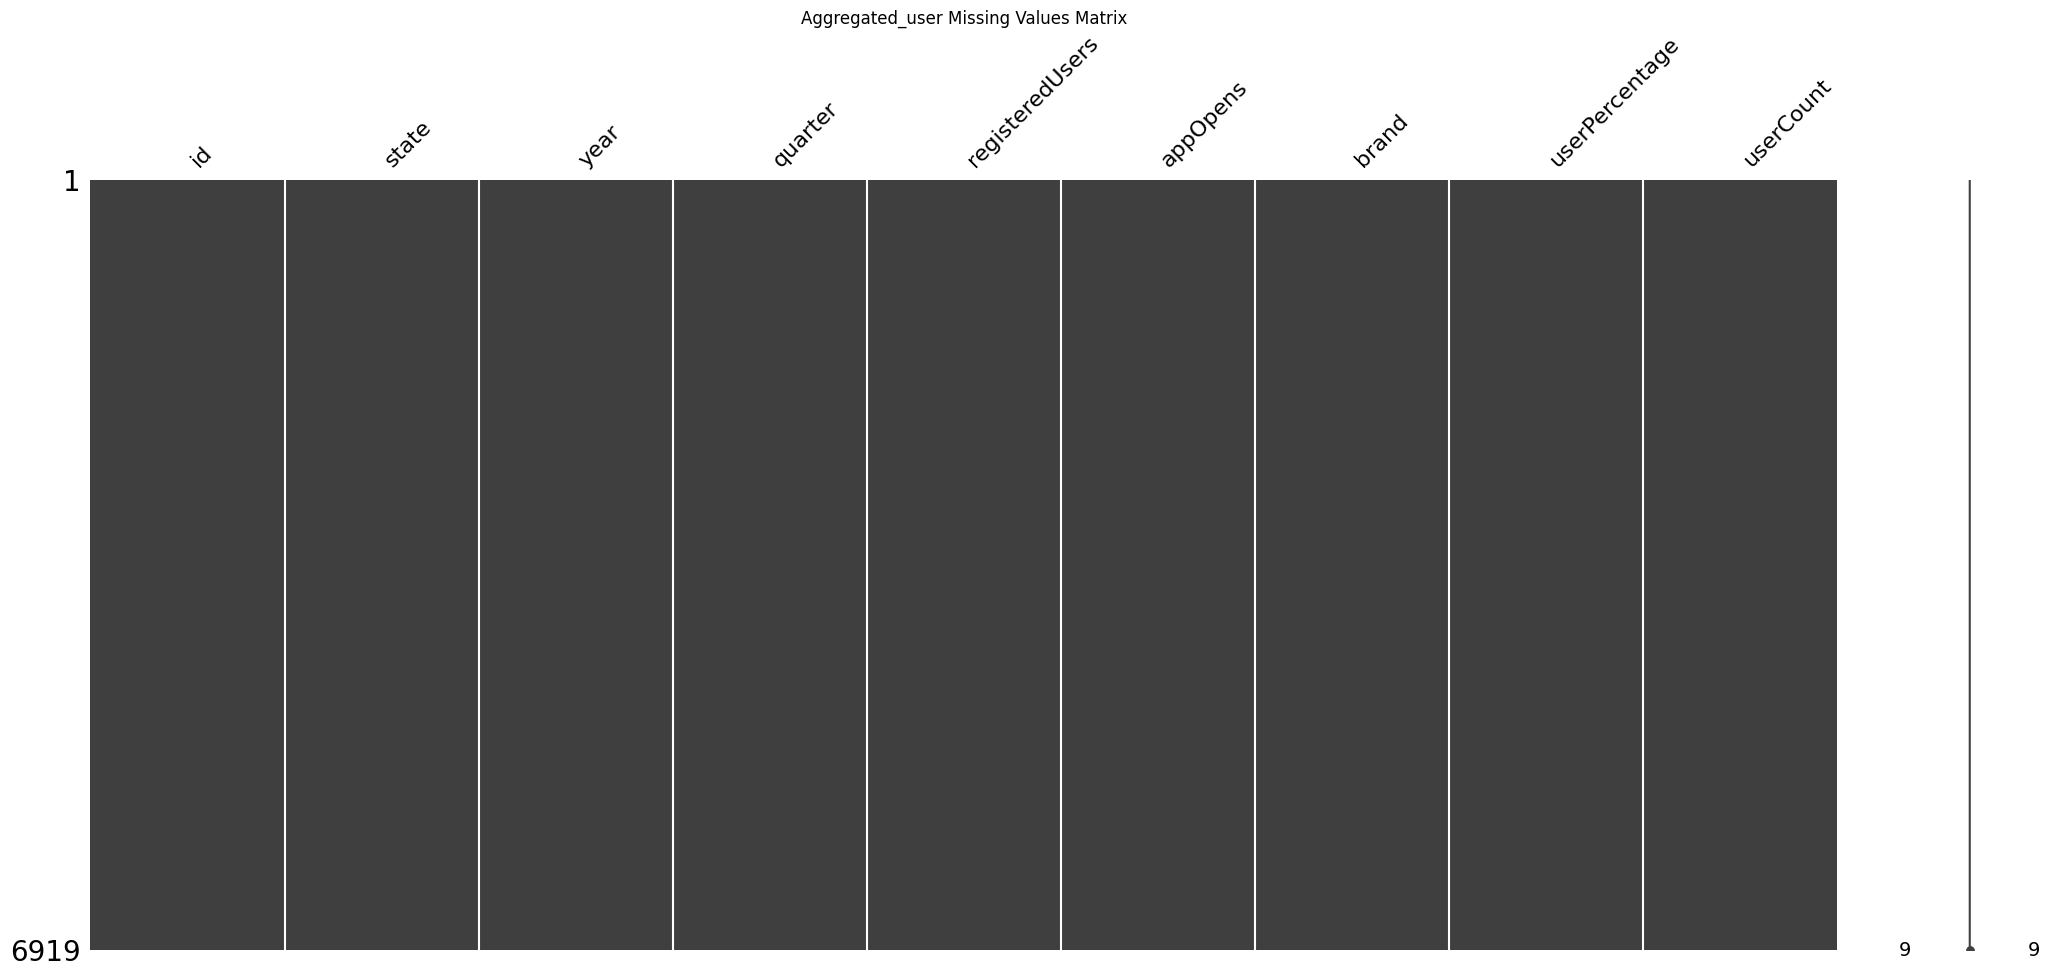


Aggregated_transaction Missing Values Visualization:


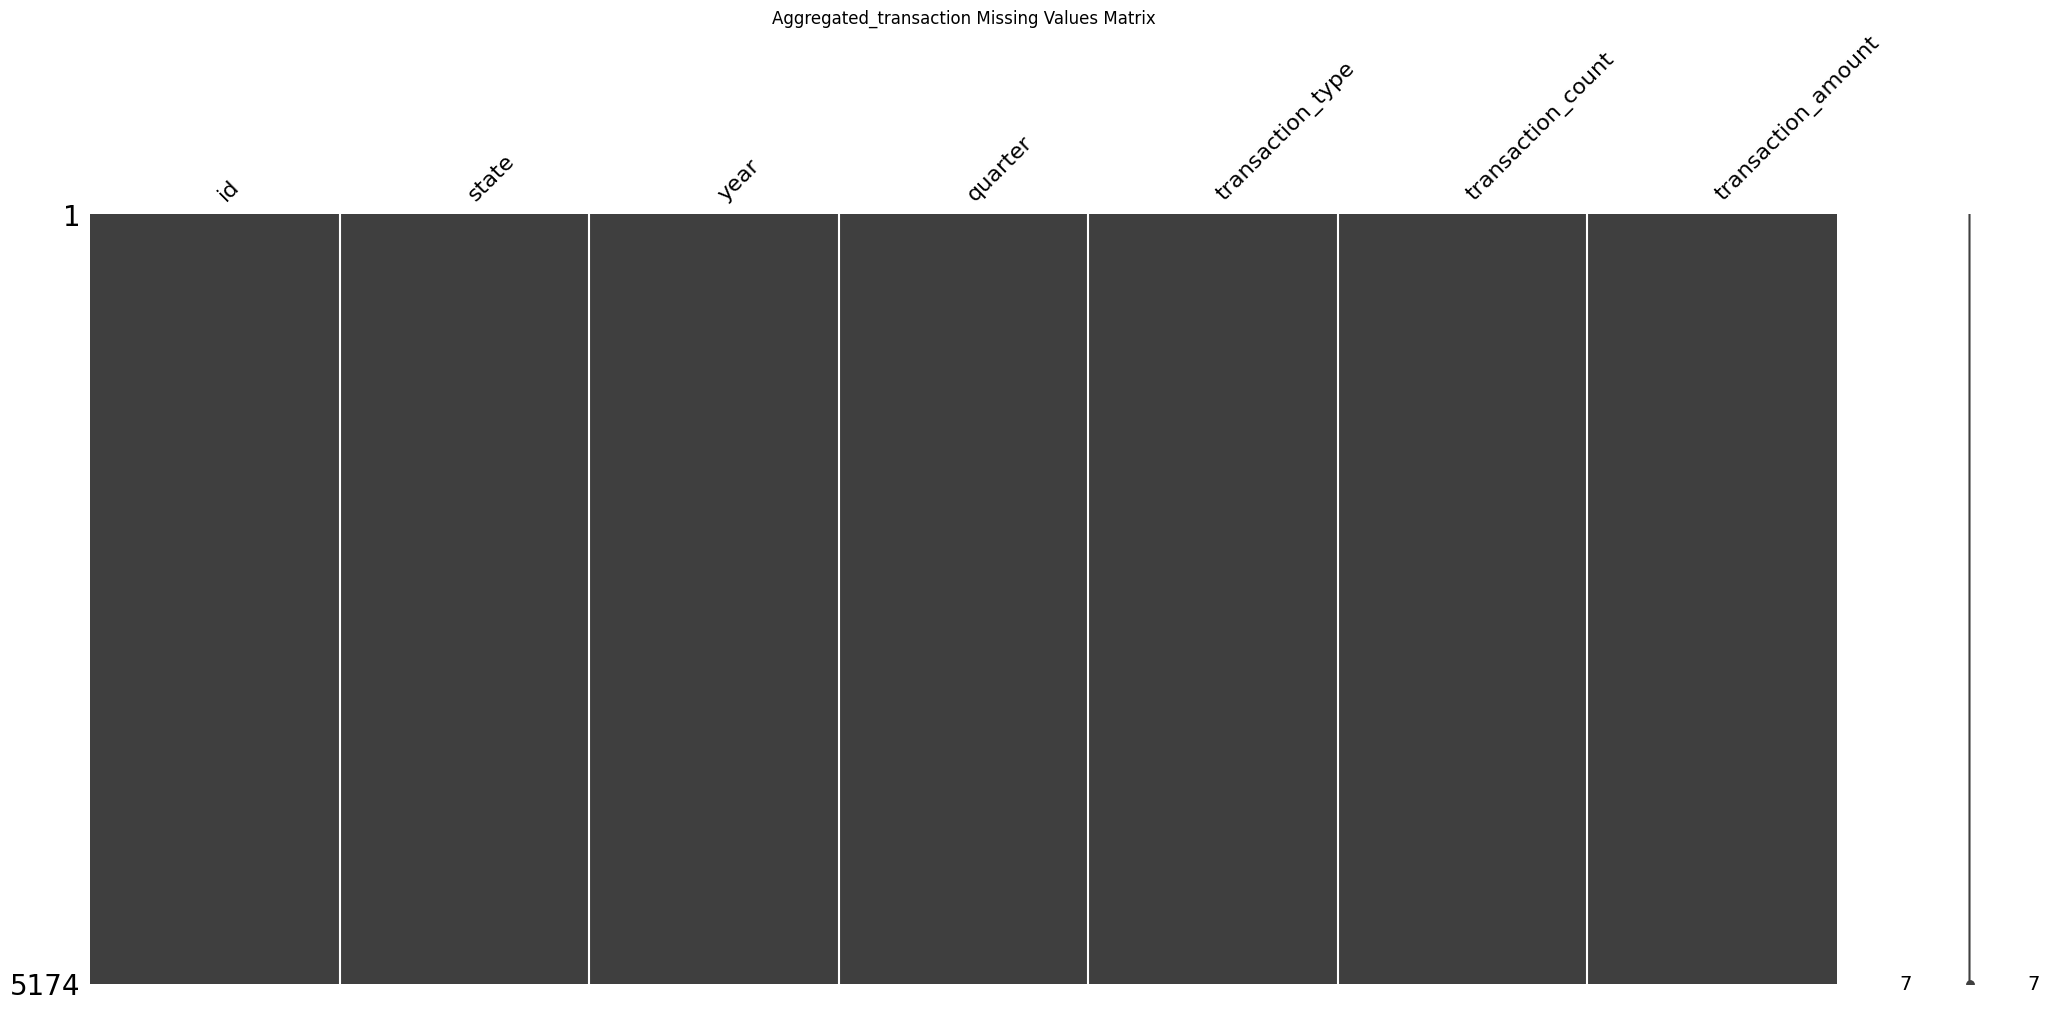


Aggregated_insurance Missing Values Visualization:


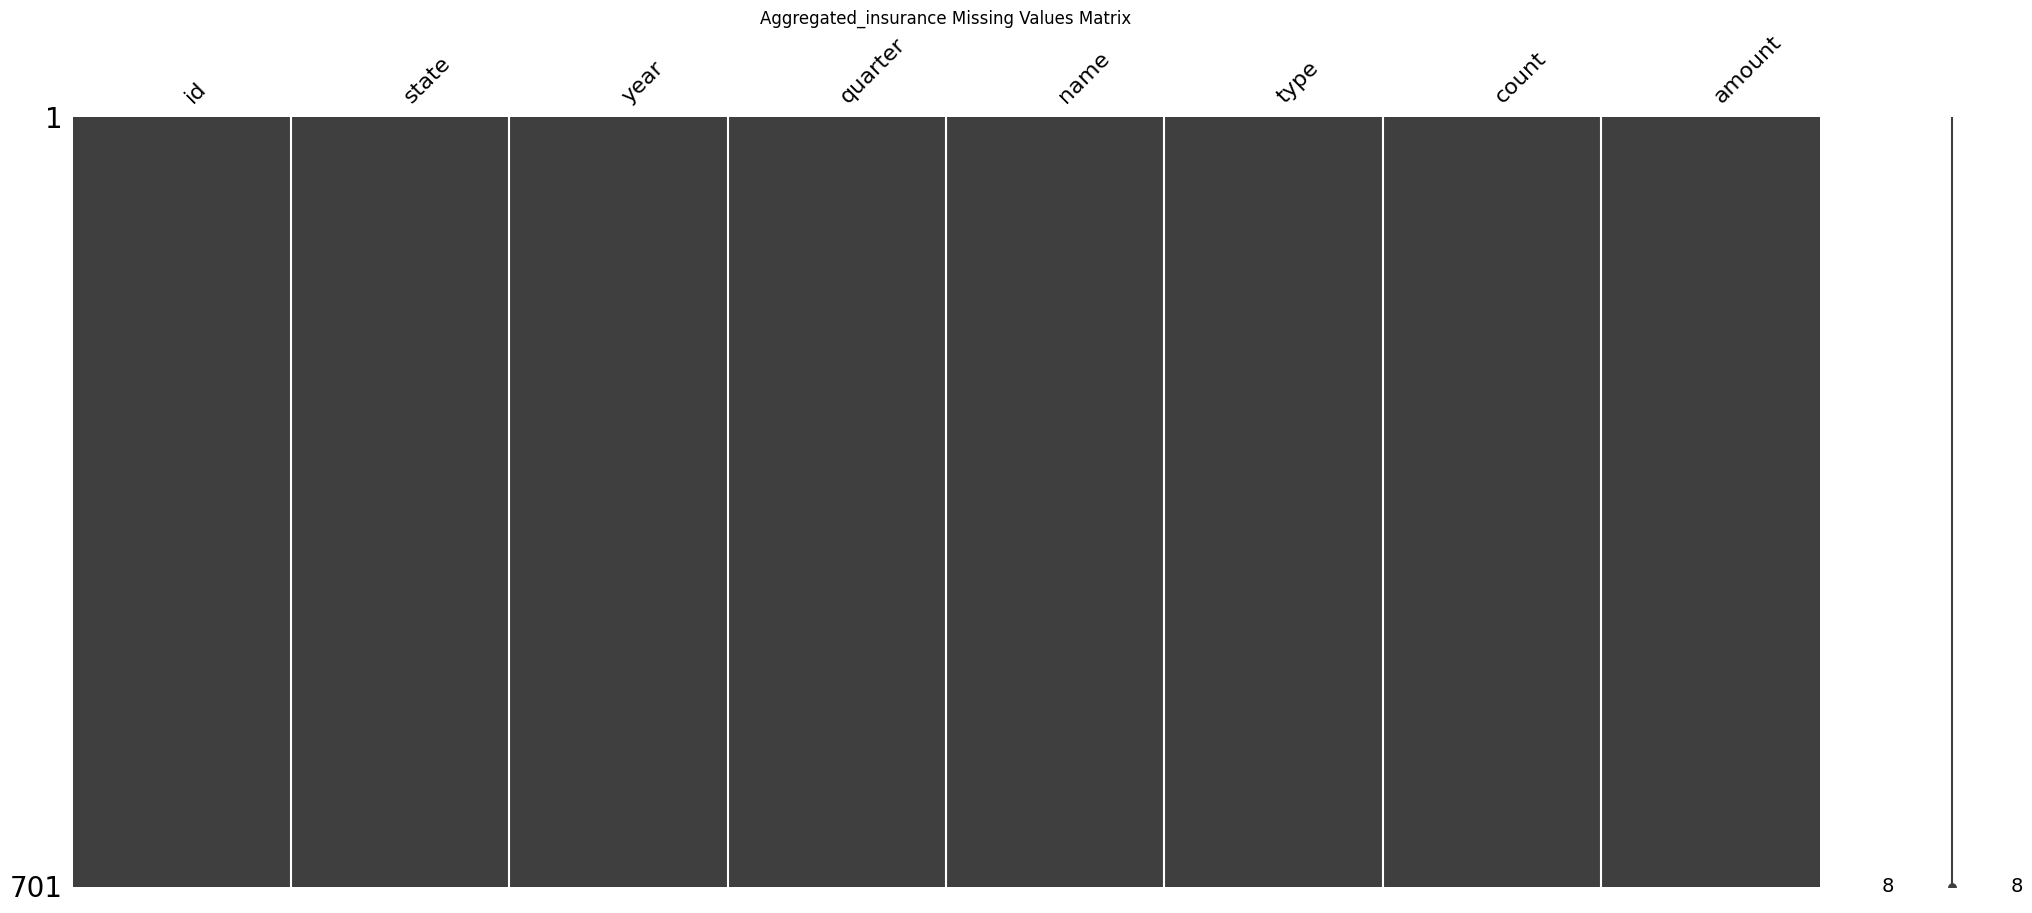


Map_user Missing Values Visualization:


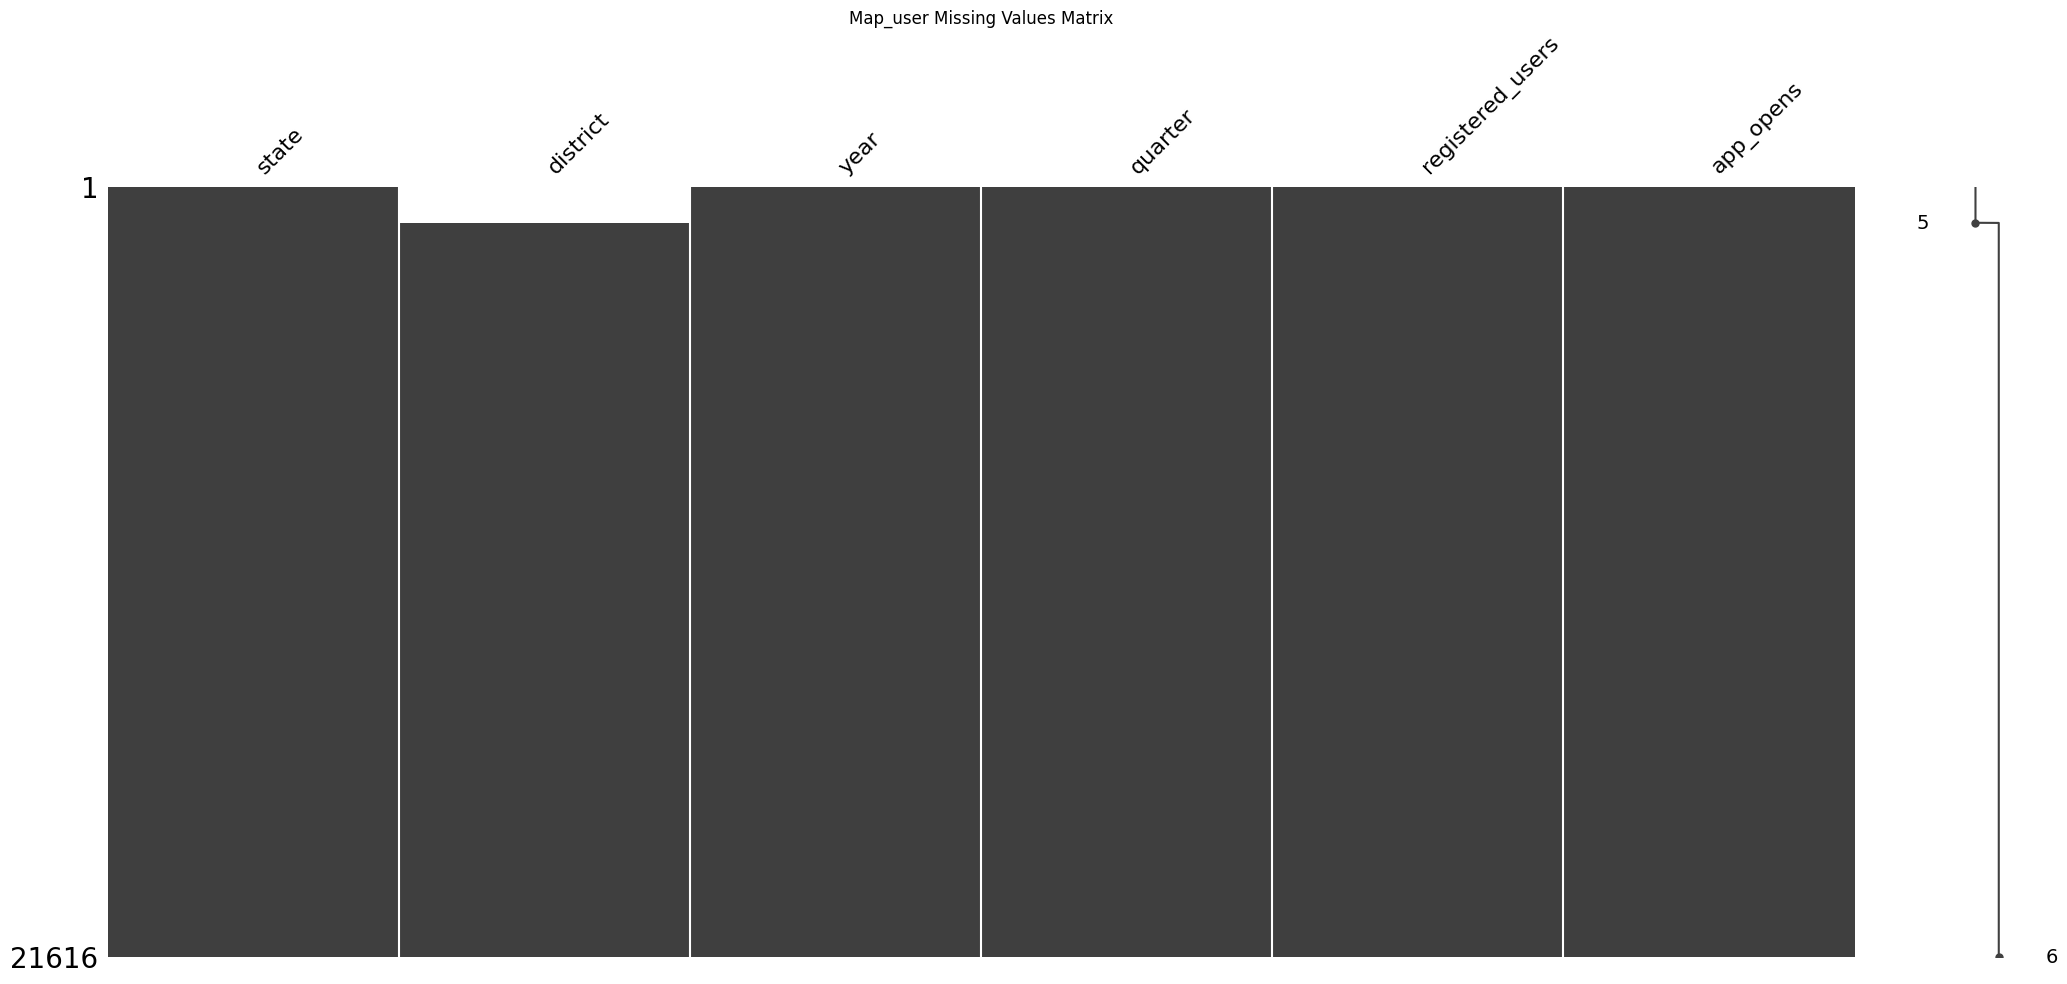


Map_transaction Missing Values Visualization:



Map_insurance Missing Values Visualization:


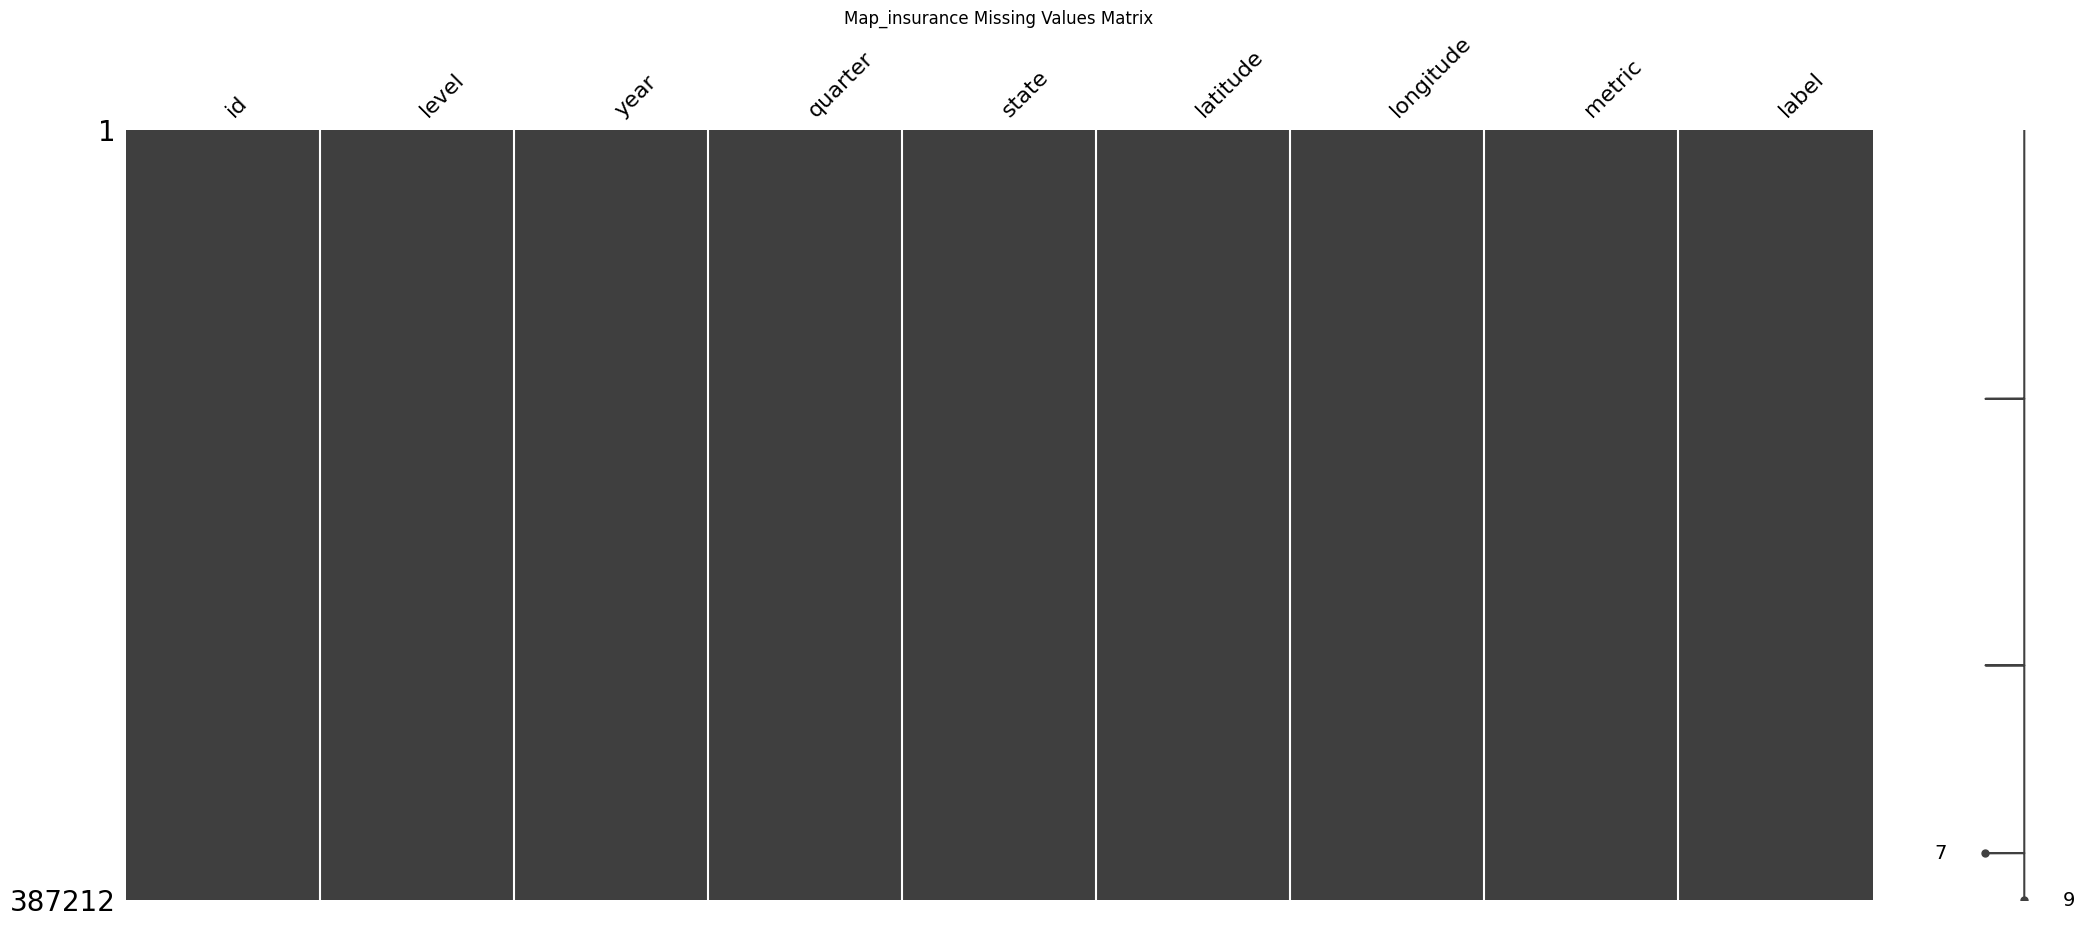


Top_user Missing Values Visualization:


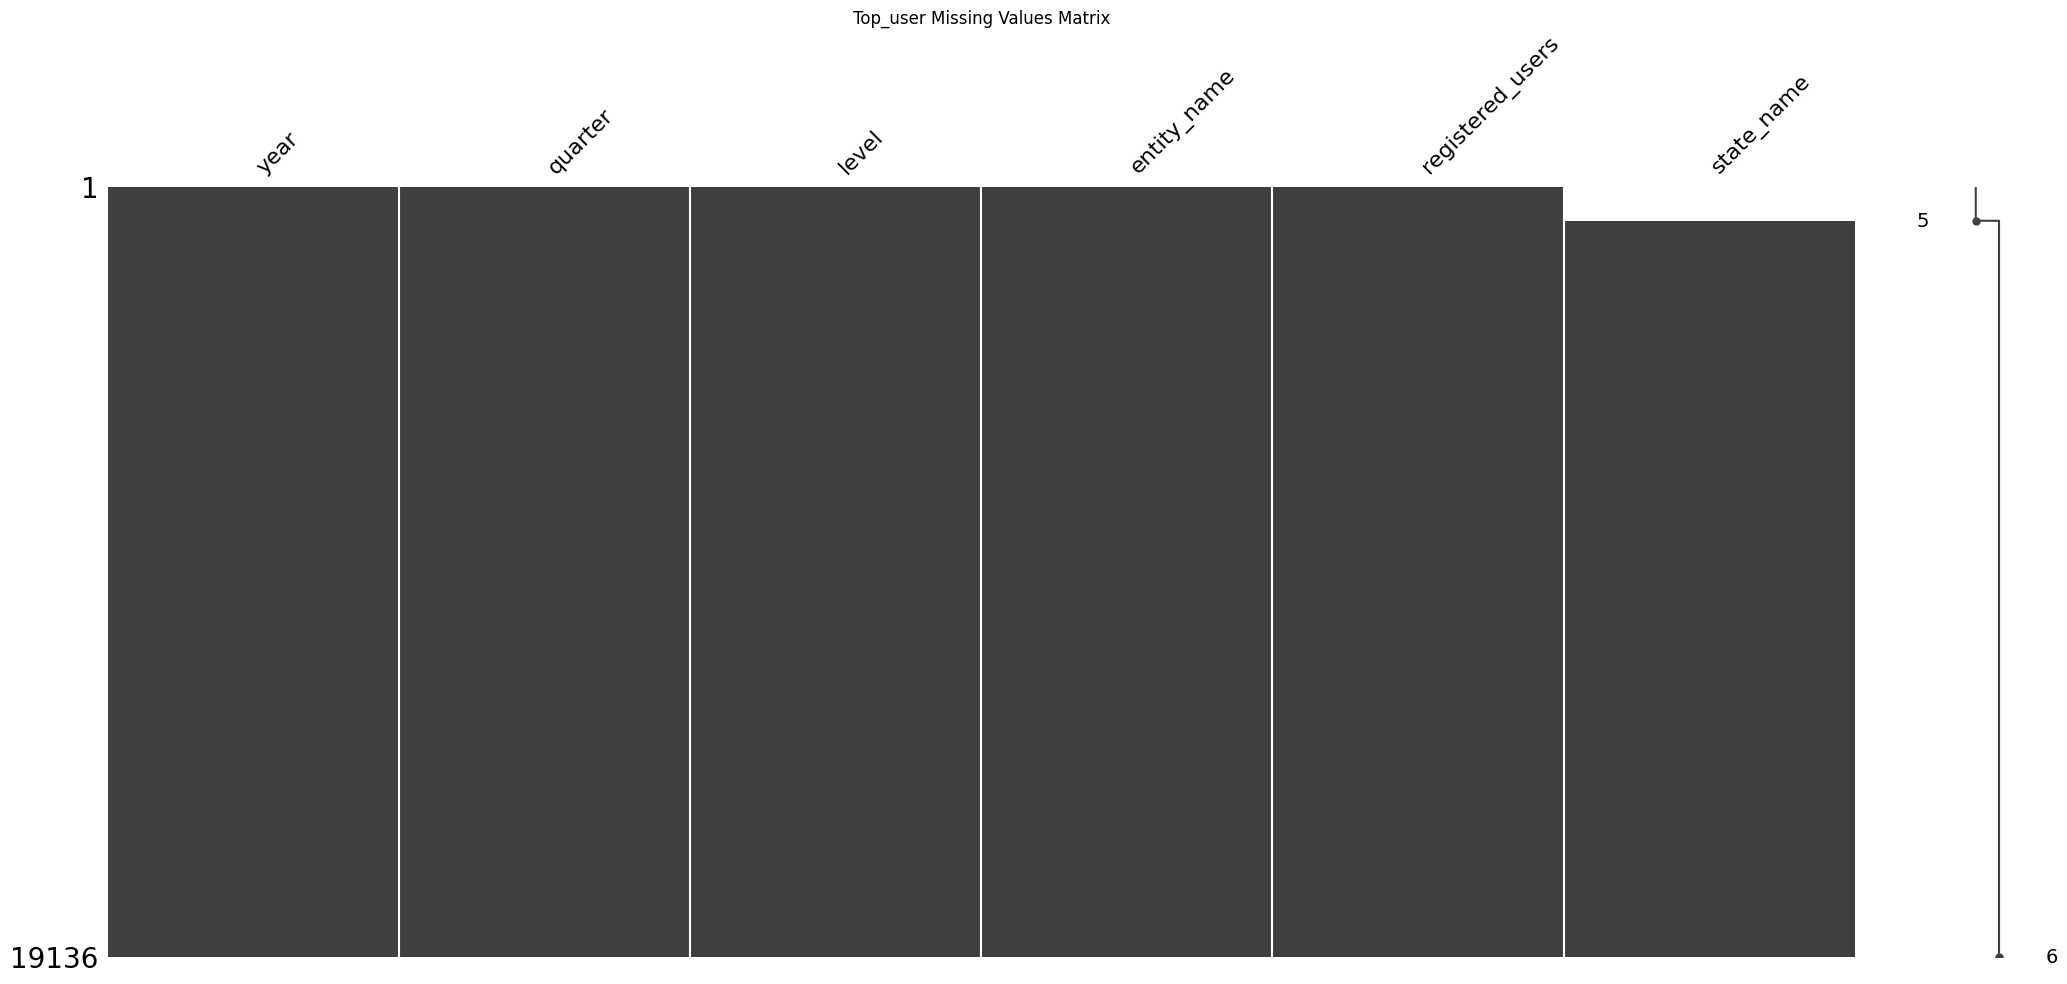


Top_transaction Missing Values Visualization:



Top_insurance Missing Values Visualization:


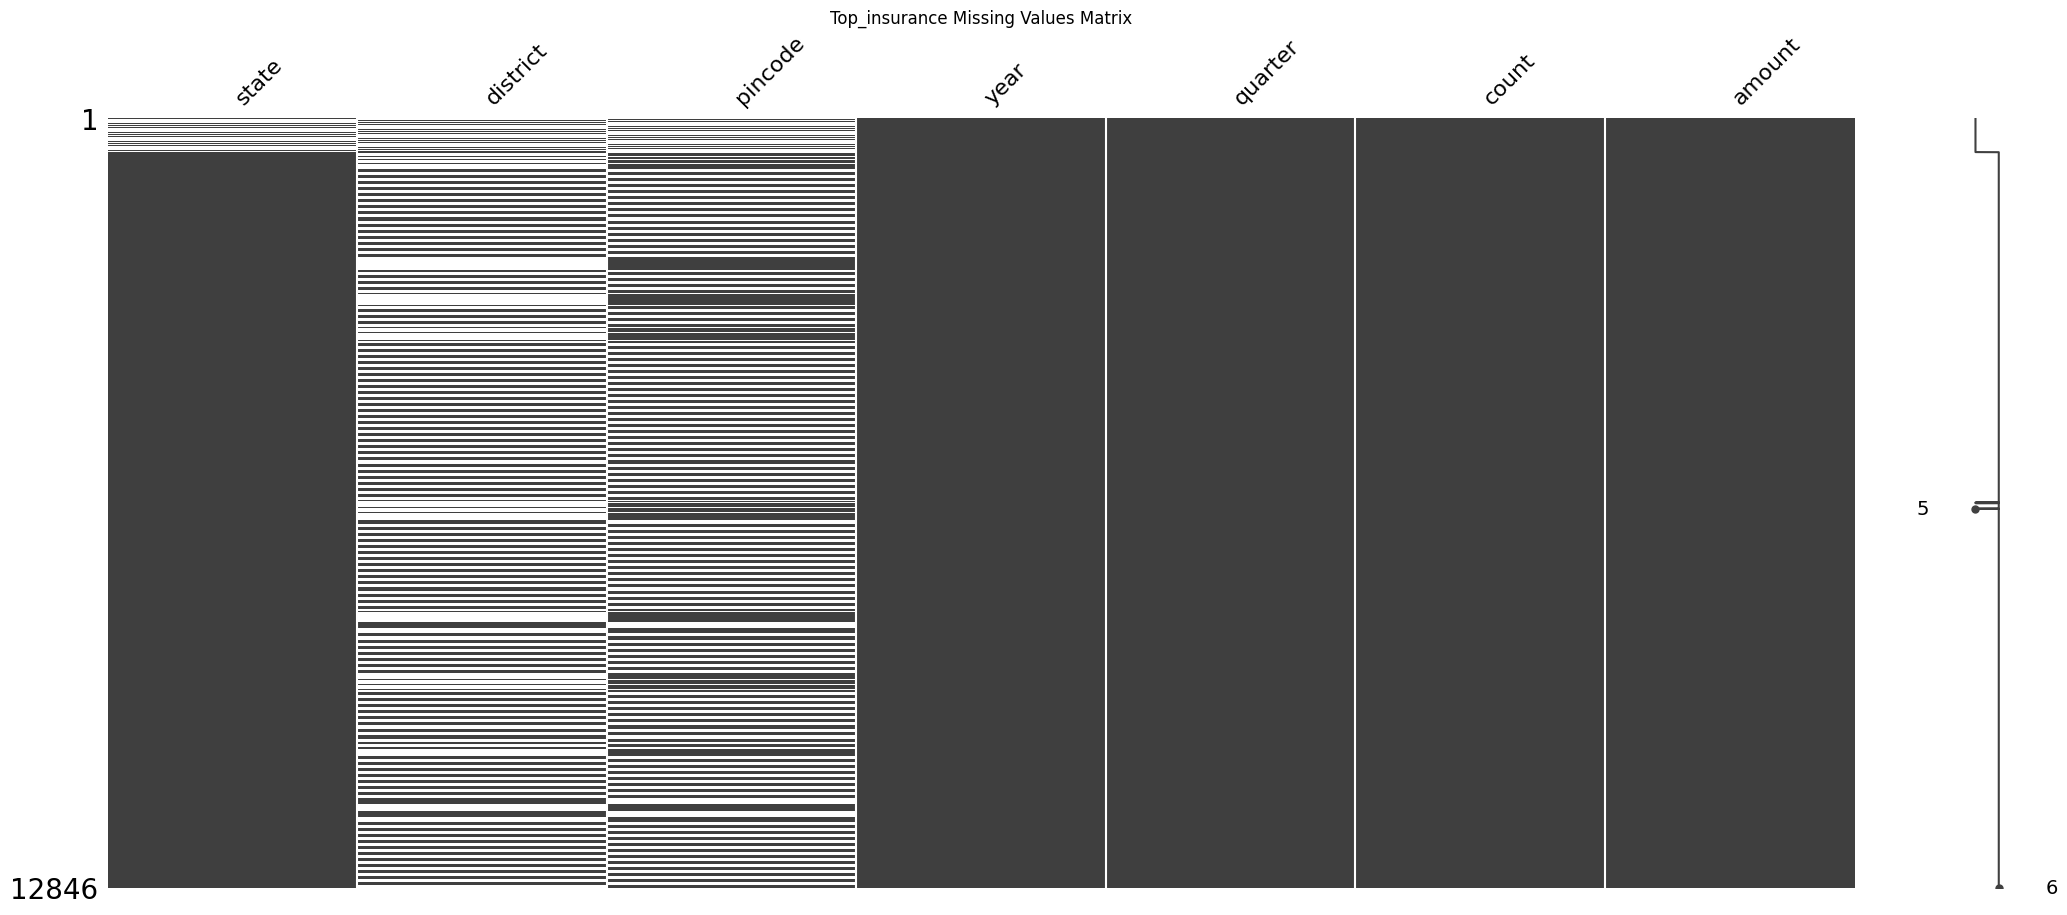

In [ ]:
# Visualizing the missing values
import missingno
for df_name, df in dataframes.items():
    print(f"\n{df_name} Missing Values Visualization:")
    missingno.matrix(df)
    plt.title(f"{df_name} Missing Values Matrix")
    plt.show()

### What did you know about your dataset?

- **Dataset Overview**: A comprehensive collection of nine distinct CSV files has been acquired, focusing on PhonePe transactions and user-related activities.

- **Content of Datasets**: These datasets include a variety of information such as transaction activities, user interactions, and detailed records of insurance-related data.

- **Key Insights**: Analysis has yielded significant insights into several areas, including transaction frequency, total monetary values associated with these transactions, registered user counts, app usage patterns, and geographical as well as temporal data trends.

- **Size and Volume Assessment**: A thorough size assessment was conducted to evaluate the volume of data, and various data types were analyzed to understand their implications on the overall dataset quality.

- **Data Integrity Issues**: The analysis revealed incomplete entries, particularly in location names and postal codes, which could potentially affect the accuracy of certain analyses.

- **Statistical Analysis**: Statistical methods were utilized to extract trends and variations, resulting in valuable findings. Importantly, no duplicate entries were identified, which contributes positively to the data's reliability.

- **Evaluation of Missing Information**: A comprehensive review was carried out concerning missing data, with particular attention to records related to users and transactions.

- **Conclusion**: Overall, this robust dataset collection offers extensive insights into PhonePe’s operations in India. It is essential, however, to address the management of missing data to enhance the accuracy and comprehensiveness of future analyses. This dataset serves as a significant resource for understanding the dynamics of digital payments in the region.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
for df_name, df in dataframes.items():
    print(f"\n{df_name} Columns:")
    print(df.columns)
    print("\n")


Aggregated_user Columns:
Index(['id', 'state', 'year', 'quarter', 'registeredUsers', 'appOpens',
       'brand', 'userPercentage', 'userCount'],
      dtype='object')



Aggregated_transaction Columns:
Index(['id', 'state', 'year', 'quarter', 'transaction_type',
       'transaction_count', 'transaction_amount'],
      dtype='object')



Aggregated_insurance Columns:
Index(['id', 'state', 'year', 'quarter', 'name', 'type', 'count', 'amount'], dtype='object')



Map_user Columns:
Index(['state', 'district', 'year', 'quarter', 'registered_users',
       'app_opens'],
      dtype='object')



Map_transaction Columns:
Index(['id', 'level', 'state_name', 'district_name', 'year', 'quarter',
       'count', 'amount'],
      dtype='object')



Map_insurance Columns:
Index(['id', 'level', 'year', 'quarter', 'state', 'latitude', 'longitude',
       'metric', 'label'],
      dtype='object')



Top_user Columns:
Index(['year', 'quarter', 'level', 'entity_name', 'registered_users',
       'state_na

In [ ]:
# Dataset Describe
for df_name, df in dataframes.items():
    print(f"\n{df_name} Describe:")
    print(df.describe())
    print("\n")


Aggregated_user Describe:
                id         year      quarter  registeredUsers      appOpens  \
count  6919.000000  6919.000000  6919.000000     6.919000e+03  6.919000e+03   
mean   3460.000000  2019.647059     2.411765     1.100264e+07  2.938519e+08   
std    1997.487589     1.233982     1.140713     3.692268e+07  1.248509e+09   
min       1.000000  2018.000000     1.000000     5.010000e+02  0.000000e+00   
25%    1730.500000  2019.000000     1.000000     2.042920e+05  0.000000e+00   
50%    3460.000000  2020.000000     2.000000     2.185938e+06  6.129766e+06   
75%    5189.500000  2021.000000     3.000000     9.233009e+06  1.656051e+08   
max    6919.000000  2022.000000     4.000000     3.729518e+08  1.572420e+10   

       userPercentage     userCount  
count     6919.000000  6.919000e+03  
mean         0.090909  1.000240e+06  
std          0.083314  4.589936e+06  
min          0.005158  1.000000e+01  
25%          0.020542  1.020550e+04  
50%          0.057649  9.565800e+

### Variables Description

The text below provides a comprehensive overview of key variables across several datasets analyzed in this project, highlighting crucial aspects of user engagement, transactions, and insurance data within various states in India.

**Aggregated_user Dataset:**
- **id:** A unique numerical identifier for each record in the dataset.
- **state:** The specific Indian state to which the data pertains (Categorical).
- **year:** The year during which data was collected, presented as discrete numerical values.
- **quarter:** Indicates the quarter of the year (1, 2, 3, or 4) in which the data is gathered (Discrete Numerical).
- **registeredUsers:** The total count of registered PhonePe users within the designated state and timeframe (Continuous Numerical).
- **appOpens:** The cumulative number of times the PhonePe application was accessed in the specified state and period (Continuous Numerical).
- **brand:** The brand of the mobile device utilized by users (Categorical).
- **userPercentage:** Represents the percentage of users utilizing a specific mobile brand relative to total registered users in that state and timeframe (Continuous Numerical).
- **userCount:** The total number of users for a particular mobile brand in the state and period (Continuous Numerical).

**Aggregated_transaction Dataset:**
- **id:** A unique numerical identifier for each transaction record.
- **state:** Indicates the Indian state relevant to the transaction (Categorical).
- **year:** The year of data collection, represented as discrete numerical values.
- **quarter:** The quarter of the corresponding year (Discrete Numerical).
- **transaction_type:** Categorizes the type of transaction (e.g., 'Peer-to-peer payments', 'Merchant payments', etc.) (Categorical).
- **transaction_count:** The total number of transactions recorded for each specific type in the designated state, year, and quarter (Continuous Numerical).
- **transaction_amount:** The aggregate monetary value of transactions for the specified type, state, year, and quarter (Continuous Numerical).

**Aggregated_insurance Dataset:**
- **id:** A unique numerical identifier for each record in the insurance dataset.
- **state:** Identifies the Indian state relevant to the insurance data (Categorical).
- **year:** The year when data was collected, presented as discrete numerical values.
- **quarter:** Indicates the quarter of the year the data pertains to (Discrete Numerical).
- **name:** The name associated with the particular insurance data (Categorical).
- **type:** Defines the type of insurance data (Categorical).
- **count:** The total quantity related to the reported insurance data (Continuous Numerical).
- **amount:** The total monetary value associated with the insurance data (Continuous Numerical).

**Map_user Dataset:**
- **state:** The respective Indian state represented in the dataset (Categorical).
- **district:** The specific district within the state; may contain missing values (Categorical).
- **year:** The year of data collection (Discrete Numerical).
- **quarter:** The quarter of the year the data applies to (Discrete Numerical).
- **registered_users:** The count of registered users in the specific district during the specified period (Continuous Numerical).
- **app_opens:** The number of times the application was opened in the specified district within the period (Continuous Numerical).

**Map_transaction Dataset:**
- **id:** A unique numerical identifier for each transaction record.
- **level:** Indicates the geographical hierarchy of the data (e.g., 'state', 'district') (Categorical).
- **state_name:** Represents the name of the state (Categorical).
- **district_name:** Represents the district name, which may contain missing values (Categorical).
- **year:** The year data was collected (Discrete Numerical).
- **quarter:** The quarter of that year (Discrete Numerical).
- **count:** The number of transactions registered for the geographical level, year, and quarter (Continuous Numerical).
- **amount:** The monetary total of transactions for the specified geographical level, year, and quarter (Continuous Numerical).

**Map_insurance Dataset:**
- **id:** A unique numerical identifier for each insurance record.
- **level:** Denotes the geographical level of the data (Categorical).
- **year:** The year of data collection (Discrete Numerical).
- **quarter:** The quarter of the year being reported (Discrete Numerical).
- **state:** Represents the state associated with the insurance data, may contain missing values (Categorical).
- **latitude:** The latitude coordinate for the geographical location of the data (Continuous Numerical).
- **longitude:** The longitude coordinate for that geographical location (Continuous Numerical).
- **metric:** A numerical metric related to the insurance data (Continuous Numerical).
- **label:** A categorical label related to the insurance data, which may contain missing values (Categorical).

**Top_user Dataset:**
- **year:** The year of data collection (Discrete Numerical).
- **quarter:** The quarter of that year (Discrete Numerical).
- **level:** The geographical hierarchy represented (Categorical).
- **entity_name:** The name of the entity (state or district) (Categorical).
- **registered_users:** The quantity of registered users associated with the entity (Continuous Numerical).
- **state_name:** The name of the state associated with the entity, may contain missing values (Categorical).

**Top_transaction Dataset:**
- **id:** A unique numerical identifier for each transaction record.
- **year:** The year that the transactions were collected (Discrete Numerical).
- **quarter:** The relevant quarter of that year (Discrete Numerical).
- **level:** Indicates the geographical level (Categorical).
- **entity_name:** The name of the entity (may contain missing values) (Categorical).
- **count:** The total number of transactions associated with the entity (Continuous Numerical).
- **amount:** The total monetary amount transacted for the entity (Continuous Numerical).
- **state_name:** The name of the state associated with the entity, which may contain missing values (Categorical).

This detailed breakdown encapsulates the essential aspects of the datasets involved in this analysis, providing clarity on the variables used in evaluating user trends, transaction activities, and insurance data across Indian states.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for df_name, df in dataframes.items():
    print(f"\n{df_name} Unique Values:")
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"{column}: {unique_values}")


Aggregated_user Unique Values:
id: [   1    2    3 ... 6917 6918 6919]
state: ['India' 'Andaman & Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra & Nagar Haveli & Daman & Diu' 'Delhi' 'Goa' 'Gujarat' 'Haryana'
 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala'
 'Ladakh' 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']
year: [2018 2019 2020 2021 2022]
quarter: [1 2 3 4]
registeredUsers: [ 46877867  63648311  80010952 102262055 123432699 141808226 159293934
 178279085 197575164 218996326 241169683 264271293 284985430 305258086
 328354923 351161395 372951831      6740      9405     12149     15222
     18596     21731     23931     25960     28368     32710     41335
     52396     57758     62095     66982     71780     76288   3336450
  

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Data Wrangling for Multiple DataFrames
cleaned_dataframes = {}

for df_name, df in dataframes.items():
    print(f"\nWrangling dataframe: {df_name}")

    df_clean = df.copy()
    df_clean.columns = df_clean.columns.str.replace(' ', '_').str.lower()
    print("  Standardized column names.")

    num_cols = df_clean.select_dtypes(include=np.number).columns

    if not num_cols.empty:
        print(f"  Handling missing values in numerical columns: {list(num_cols)}")
        df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())
    else:
        print("  No numerical columns found for missing value imputation.")

    obj_cols = df_clean.select_dtypes(include='object').columns

    if not obj_cols.empty:
        print(f"  Handling missing values in object columns: {list(obj_cols)}")
        for col in obj_cols:
             mode_val = df_clean[col].mode()
             if not mode_val.empty:
                 try:
                     df_clean[col] = df_clean[col].fillna(mode_val.iloc[0])
                 except TypeError:
                      df_clean[col] = df_clean[col].fillna('Unknown')
             else:
                 df_clean[col] = df_clean[col].fillna('Unknown')
    else:
         print("  No object columns found for missing value imputation.")

    if 'amount' in df_clean.columns and 'count' in df_clean.columns:
        print("  Creating 'avg_transaction_value'.")
        df_clean['avg_transaction_value'] = df_clean.apply(lambda row: row['amount'] / row['count'] if pd.notna(row['count']) and row['count'] != 0 else 0, axis=1)

    if 'count' in df_clean.columns:
        print("  Creating 'transaction_count' and 'transaction_volume_category'.")
        df_clean['transaction_count'] = pd.to_numeric(df_clean['count'], errors='coerce').fillna(0)
        df_clean['transaction_volume_category'] = pd.cut(df_clean['transaction_count'],
                                                       bins=[0, 1000, 5000, 10000, float('inf')],
                                                       labels=['Low', 'Medium', 'High', 'Very High'],
                                                       include_lowest=True,
                                                       right=False)
    else:
        print("  'count' column not found. Skipping 'transaction_count' and 'transaction_volume_category' creation.")

    if 'year' in df_clean.columns:
        df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce')
        df_clean['year'] = df_clean['year'].fillna(df_clean['year'].median()).astype(int)

    if 'quarter' in df_clean.columns:
        df_clean['quarter'] = pd.to_numeric(df_clean['quarter'], errors='coerce')
        df_clean['quarter'] = df_clean['quarter'].fillna(df_clean['quarter'].median()).astype(int)

    if 'state' in df_clean.columns:
        print("  Filtering out test entries based on 'state' column.")
        df_clean = df_clean[~df_clean['state'].astype(str).str.contains('Test', case=False, na=False)]
    elif 'entity_name' in df_clean.columns:
         print("  Checking for test entries in 'entity_name' column.")
         df_clean = df_clean[~df_clean['entity_name'].astype(str).str.contains('Test', case=False, na=False)]
    else:
        print("  No 'state' or 'entity_name' column found for filtering test entries.")


    cleaned_dataframes[df_name] = df_clean

    print(f"  Shape of cleaned {df_name}: {cleaned_dataframes[df_name].shape}")

    print(f"  Cleaned {df_name} head:")
    display(cleaned_dataframes[df_name].head())


Wrangling dataframe: Aggregated_user
  Standardized column names.
  Handling missing values in numerical columns: ['id', 'year', 'quarter', 'registeredusers', 'appopens', 'userpercentage', 'usercount']
  Handling missing values in object columns: ['state', 'brand']
  'count' column not found. Skipping 'transaction_count' and 'transaction_volume_category' creation.
  Filtering out test entries based on 'state' column.
  Shape of cleaned Aggregated_user: (6919, 9)
  Cleaned Aggregated_user head:


id  state  year  quarter  registeredusers  appopens    brand  \
0   1  India  2018        1         46877867         0   Xiaomi   
1   2  India  2018        1         46877867         0  Samsung   
2   3  India  2018        1         46877867         0     Vivo   
3   4  India  2018        1         46877867         0     Oppo   
4   5  India  2018        1         46877867         0   Realme   

   userpercentage  usercount  
0        0.254413   11926334  
1        0.204988    9609401  
2        0.125737    5894293  
3        0.095554    4479351  
4        0.050703    2376866


Wrangling dataframe: Aggregated_transaction
  Standardized column names.
  Handling missing values in numerical columns: ['id', 'year', 'quarter', 'transaction_count', 'transaction_amount']
  Handling missing values in object columns: ['state', 'transaction_type']
  'count' column not found. Skipping 'transaction_count' and 'transaction_volume_category' creation.
  Filtering out test entries based on 'state' column.
  Shape of cleaned Aggregated_transaction: (5174, 7)
  Cleaned Aggregated_transaction head:


id  state  year  quarter          transaction_type  transaction_count  \
0   1  India  2018        1  Recharge & bill payments           72550406   
1   2  India  2018        1     Peer-to-peer payments           46982705   
2   3  India  2018        1         Merchant payments            5368669   
3   4  India  2018        1        Financial Services            3762820   
4   5  India  2018        1                    Others            5761576   

   transaction_amount  
0        1.447271e+10  
1        1.472459e+11  
2        4.656679e+09  
3        8.158531e+08  
4        4.643217e+09


Wrangling dataframe: Aggregated_insurance
  Standardized column names.
  Handling missing values in numerical columns: ['id', 'year', 'quarter', 'count', 'amount']
  Handling missing values in object columns: ['state', 'name', 'type']
  Creating 'avg_transaction_value'.
  Creating 'transaction_count' and 'transaction_volume_category'.
  Filtering out test entries based on 'state' column.
  Shape of cleaned Aggregated_insurance: (701, 11)
  Cleaned Aggregated_insurance head:


id  state  year  quarter       name   type   count       amount  \
0   1  India  2020        2  Insurance  TOTAL  185348   33732200.0   
1   2  India  2020        3  Insurance  TOTAL  354284   89495100.0   
2   3  India  2020        4  Insurance  TOTAL  248626  170980000.0   
3   4  India  2021        1  Insurance  TOTAL  318119  206307000.0   
4   5  India  2021        2  Insurance  TOTAL  363989  295067000.0   

   avg_transaction_value  transaction_count transaction_volume_category  
0             181.993871             185348                   Very High  
1             252.608359             354284                   Very High  
2             687.699597             248626                   Very High  
3             648.521465             318119                   Very High  
4             810.648124             363989                   Very High


Wrangling dataframe: Map_user
  Standardized column names.
  Handling missing values in numerical columns: ['year', 'quarter', 'registered_users', 'app_opens']
  Handling missing values in object columns: ['state', 'district']
  'count' column not found. Skipping 'transaction_count' and 'transaction_volume_category' creation.
  Filtering out test entries based on 'state' column.
  Shape of cleaned Map_user: (21616, 6)
  Cleaned Map_user head:


state           district  year  quarter  registered_users  \
0      puducherry  bilaspur district  2018        1             49318   
1      tamil nadu  bilaspur district  2018        1           2104754   
2   uttar pradesh  bilaspur district  2018        1           4694250   
3  madhya pradesh  bilaspur district  2018        1           2553603   
4  andhra pradesh  bilaspur district  2018        1           3336450   

   app_opens  
0          0  
1          0  
2          0  
3          0  
4          0


Wrangling dataframe: Map_transaction
  Standardized column names.
  Handling missing values in numerical columns: ['id', 'year', 'quarter', 'count', 'amount']
  Handling missing values in object columns: ['level', 'state_name', 'district_name']
  Creating 'avg_transaction_value'.
  Creating 'transaction_count' and 'transaction_volume_category'.
  No 'state' or 'entity_name' column found for filtering test entries.
  Shape of cleaned Map_transaction: (21612, 11)
  Cleaned Map_transaction head:


id  level      state_name      district_name  year  quarter     count  \
0   1  state      puducherry  bilaspur district  2018        1    104212   
1   2  state      tamil nadu  bilaspur district  2018        1   6726622   
2   3  state   uttar pradesh  bilaspur district  2018        1  12537805   
3   4  state  madhya pradesh  bilaspur district  2018        1   8025395   
4   5  state  andhra pradesh  bilaspur district  2018        1   9039585   

         amount  avg_transaction_value  transaction_count  \
0  1.658260e+08            1591.236819             104212   
1  1.126156e+10            1674.177276            6726622   
2  1.393997e+10            1111.835040           12537805   
3  8.681603e+09            1081.766493            8025395   
4  1.199628e+10            1327.082647            9039585   

  transaction_volume_category  
0                   Very High  
1                   Very High  
2                   Very High  
3                   Very High  
4                   Very High


Wrangling dataframe: Map_insurance
  Standardized column names.
  Handling missing values in numerical columns: ['id', 'year', 'quarter', 'latitude', 'longitude', 'metric']
  Handling missing values in object columns: ['level', 'state', 'label']
  'count' column not found. Skipping 'transaction_count' and 'transaction_volume_category' creation.
  Filtering out test entries based on 'state' column.
  Shape of cleaned Map_insurance: (387212, 9)
  Cleaned Map_insurance head:


id    level  year  quarter      state   latitude  longitude  metric  \
0  734069  COUNTRY  2020        2  karnataka  12.881175  77.567674  4720.0   
1  734070  COUNTRY  2020        2  telangana  17.428197  78.389911  3186.0   
2  734071  COUNTRY  2020        2  karnataka  12.967107  77.475933  2753.0   
3  734072  COUNTRY  2020        2  telangana  17.340345  78.480878  2674.0   
4  734073  COUNTRY  2020        2  karnataka  12.885550  77.659339  2408.0   

       label  
0  karnataka  
1  telangana  
2  karnataka  
3  telangana  
4  karnataka


Wrangling dataframe: Top_user
  Standardized column names.
  Handling missing values in numerical columns: ['year', 'quarter', 'registered_users']
  Handling missing values in object columns: ['level', 'entity_name', 'state_name']
  'count' column not found. Skipping 'transaction_count' and 'transaction_volume_category' creation.
  Checking for test entries in 'entity_name' column.
  Shape of cleaned Top_user: (19136, 6)
  Cleaned Top_user head:


year  quarter  level     entity_name  registered_users      state_name
0  2018        1  state     maharashtra           6106994  andhra-pradesh
1  2018        1  state   uttar pradesh           4694250  andhra-pradesh
2  2018        1  state       karnataka           3717763  andhra-pradesh
3  2018        1  state  andhra pradesh           3336450  andhra-pradesh
4  2018        1  state       telangana           3315560  andhra-pradesh


Wrangling dataframe: Top_transaction
  Standardized column names.
  Handling missing values in numerical columns: ['id', 'year', 'quarter', 'count', 'amount']
  Handling missing values in object columns: ['level', 'entity_name', 'state_name']
  Creating 'avg_transaction_value'.
  Creating 'transaction_count' and 'transaction_volume_category'.
  Checking for test entries in 'entity_name' column.
  Shape of cleaned Top_transaction: (19135, 11)
  Cleaned Top_transaction head:


id  year  quarter  level     entity_name     count        amount  \
0   1  2018        1  state     maharashtra  16387034  2.171161e+10   
1   2  2018        1  state   uttar pradesh  12537805  1.393997e+10   
2   3  2018        1  state       karnataka  12016899  1.921790e+10   
3   4  2018        1  state     west bengal  11710225  1.062598e+10   
4   5  2018        1  state  andhra pradesh   9039585  1.199628e+10   

       state_name  avg_transaction_value  transaction_count  \
0  andhra-pradesh            1324.926357           16387034   
1  andhra-pradesh            1111.835040           12537805   
2  andhra-pradesh            1599.239148           12016899   
3  andhra-pradesh             907.410281           11710225   
4  andhra-pradesh            1327.082647            9039585   

  transaction_volume_category  
0                   Very High  
1                   Very High  
2                   Very High  
3                   Very High  
4                   Very High


Wrangling dataframe: Top_insurance
  Standardized column names.
  Handling missing values in numerical columns: ['pincode', 'year', 'quarter', 'count', 'amount']
  Handling missing values in object columns: ['state', 'district']
  Creating 'avg_transaction_value'.
  Creating 'transaction_count' and 'transaction_volume_category'.
  Filtering out test entries based on 'state' column.
  Shape of cleaned Top_insurance: (12846, 10)
  Cleaned Top_insurance head:


state         district   pincode  year  quarter  count     amount  \
0     maharashtra  bengaluru urban  530016.0  2020        2  39836  6879717.0   
1       karnataka  bengaluru urban  530016.0  2020        2  27358  4794150.0   
2  andhra pradesh  bengaluru urban  530016.0  2020        2  22104  3982391.0   
3       telangana  bengaluru urban  530016.0  2020        2  19003  3419453.0   
4           delhi  bengaluru urban  530016.0  2020        2  11716  1897480.0   

   avg_transaction_value  transaction_count transaction_volume_category  
0             172.700999              39836                   Very High  
1             175.237590              27358                   Very High  
2             180.166079              22104                   Very High  
3             179.942799              19003                   Very High  
4             161.956299              11716                   Very High

### What all manipulations have you done and insights you found?

During the data wrangling phase, various manipulations were performed across nine datasets to prepare them for analysis and address initial data quality issues:

 **Column Name Standardization**: All column names
were converted to lowercase and spaces were replaced with underscores to ensure consistency across dataframes and simplify referencing.

**Missing Value Imputation**:
 - Missing values in numerical columns were imputed with the median to mitigate the impact of outliers.
- For categorical columns, missing values were filled with the mode or 'Unknown' if the mode was inapplicable. This approach retained records while indicating missing information. Visual inspection with `missingno.matrix()` revealed significant missing data in columns like 'district', 'district_name', 'state', 'label', 'state_name', and 'pincode', which were addressed through imputation.

**Feature Engineering**:
- A new feature, `avg_transaction_value`, was calculated by dividing the total amount by total count, offering a valuable per-transaction metric.
- A `transaction_volume_category` was created based on the 'count' column ('Low', 'Medium', 'High', 'Very High') to segment transaction volumes for enhanced data analysis.

**Data Filtering**: Rows containing 'Test' in the 'state' or 'entity_name' columns were removed to prevent skewing the analysis of actual PhonePe activity.

**Data Type Conversion**: Columns intended to be numerical ('year', 'quarter') were converted to numeric types, coercing errors to NaN and then filling with the median before converting to integer, ensuring proper format for analysis.

**Initial Insights from Wrangling**:
- Missing values in geographical columns across several dataframes highlight challenges in location-based analysis and underscore the importance of robust data handling.
- The introduction of `avg_transaction_value` enriches the analysis beyond total counts or amounts.
- The `transaction_volume_category` simplifies the assessment of transaction activity distribution.
- Excluding 'Test' entries is crucial for reflecting true PhonePe usage in analysis.

These adjustments resulted in cleaned, more usable dataframes, paving the way for comprehensive exploratory data analysis and visualization.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Transaction type share of total volume

In [ ]:
# Chart - 1: Transaction type share of total volume
trans_type = cleaned_dataframes['Aggregated_transaction'].groupby('transaction_type')['transaction_amount'].sum().reset_index()

fig = px.pie(trans_type,
             values='transaction_amount',
             names='transaction_type',
             title='<b>Share of Transaction Amount by Payment Category</b>',
             hole=0.4)
fig.update_traces(textposition='inside',
                  textinfo='percent+label')
fig.show()

##### 1. Why did you pick the specific chart?

- A bar chart was used to visualize the trend of total transaction counts over quarters, allowing for easy comparison of volume changes across time periods.

##### 2. What is/are the insight(s) found from the chart?

- The chart reveals the growth trajectory of transaction counts over time and highlights any quarterly fluctuations or seasonality in transaction volume.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, understanding quarterly transaction trends helps in forecasting, resource allocation, and identifying periods of high or low activity for targeted campaigns. Significant dips in count could indicate issues requiring investigation to prevent negative growth.

#### Chart - 2: Aggregated Transaction Count by Year/Quarter

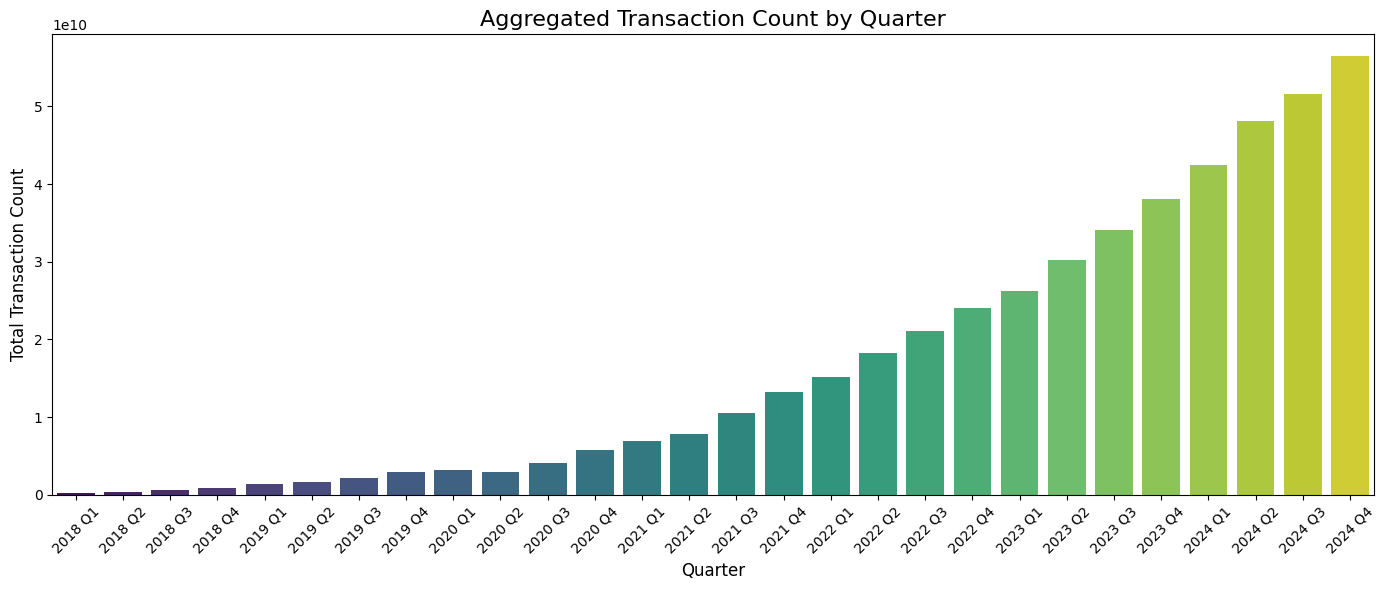

In [ ]:
# Chart - 2: Aggregated Transaction Count by Year/Quarter

if 'Aggregated_transaction' in cleaned_dataframes:
    agg_trans_df = cleaned_dataframes['Aggregated_transaction'].copy()
    if not agg_trans_df.empty and 'year' in agg_trans_df.columns and 'quarter' in agg_trans_df.columns and 'transaction_count' in agg_trans_df.columns:

        agg_trans_df['year'] = pd.to_numeric(agg_trans_df['year'], errors='coerce')
        agg_trans_df['quarter'] = pd.to_numeric(agg_trans_df['quarter'], errors='coerce')
        agg_trans_df.dropna(subset=['year', 'quarter'], inplace=True)

        agg_count_time_series = agg_trans_df.groupby(['year', 'quarter'])['transaction_count'].sum().reset_index()
        agg_count_time_series['period'] = agg_count_time_series['year'].astype(int).astype(str) + ' Q' + agg_count_time_series['quarter'].astype(int).astype(str)
        agg_count_time_series.sort_values(['year', 'quarter'], inplace=True)

        if not agg_count_time_series.empty:
            plt.figure(figsize=(14, 6))
            sns.barplot(data=agg_count_time_series, x='period', y='transaction_count', palette='viridis')
            plt.title('Aggregated Transaction Count by Quarter', fontsize=16)
            plt.xlabel('Quarter', fontsize=12)
            plt.ylabel('Total Transaction Count', fontsize=12)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

##### 1. Why did you pick the specific chart?

- A bar chart was used to visualize the trend of total transaction counts over quarters, allowing for easy comparison of volume changes across time periods.

##### 2. What is/are the insight(s) found from the chart?

- The chart reveals the growth trajectory of transaction counts over time and highlights any quarterly fluctuations or seasonality in transaction volume.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, understanding quarterly transaction trends helps in forecasting, resource allocation, and identifying periods of high or low activity for targeted campaigns. Significant dips in count could indicate issues requiring investigation to prevent negative growth.

#### Chart - 3

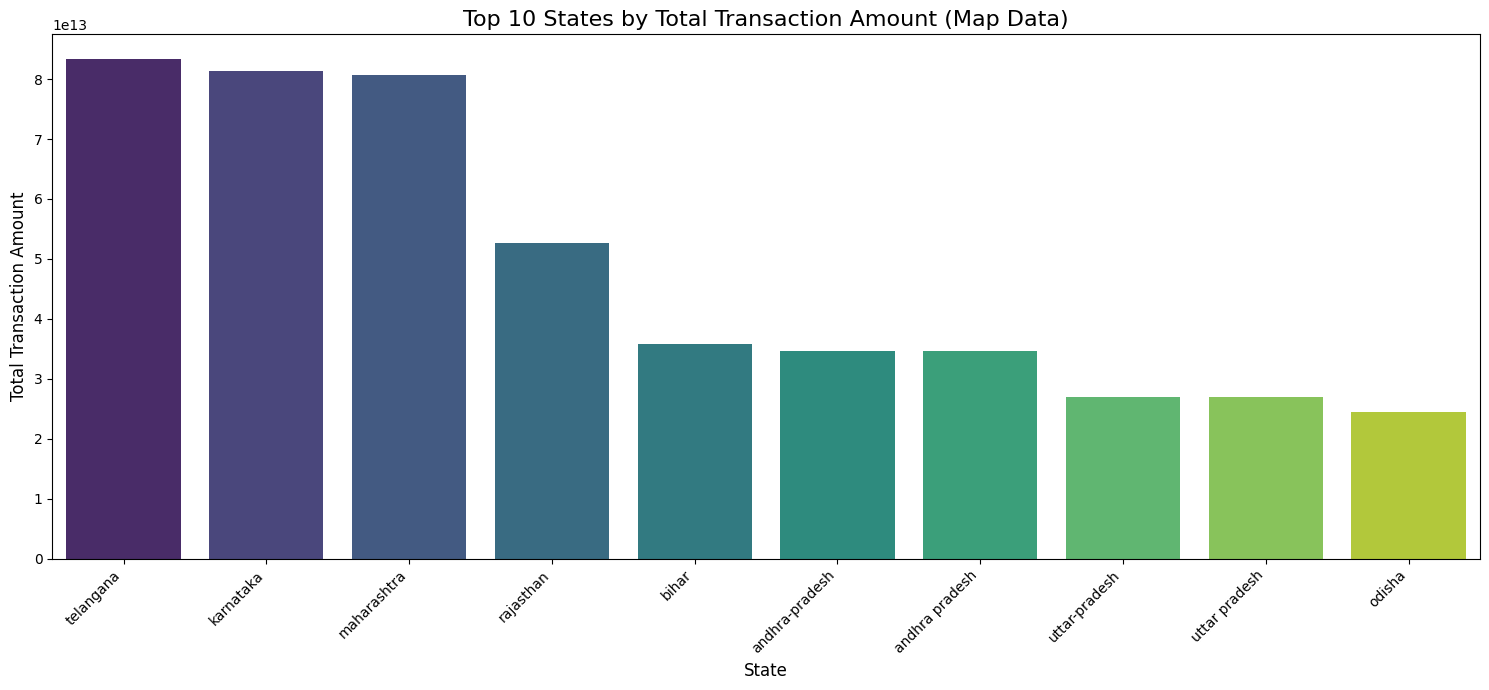

In [ ]:
# Chart - 3: Top 10 States by Aggregated Transaction Amount

if 'Map_transaction' in cleaned_dataframes:
    map_trans_df = cleaned_dataframes['Map_transaction'].copy()
    if not map_trans_df.empty and 'state_name' in map_trans_df.columns and 'amount' in map_trans_df.columns:
        state_amount_agg = map_trans_df.groupby('state_name')['amount'].sum().reset_index()
        if not state_amount_agg.empty:
            plt.figure(figsize=(15, 7))
            sns.barplot(data=state_amount_agg.sort_values('amount', ascending=False).head(10),
                        x='state_name',
                        y='amount',
                        palette='viridis')
            plt.title('Top 10 States by Total Transaction Amount (Map Data)', fontsize=16)
            plt.xlabel('State', fontsize=12)
            plt.ylabel('Total Transaction Amount', fontsize=12)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

##### 1. Why did you pick the specific chart?

- A bar chart effectively compares the total transaction amounts across different states, clearly highlighting the top performers.

##### 2. What is/are the insight(s) found from the chart?

- The chart identifies the states contributing the most to the total transaction amount, indicating key markets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, focusing marketing and infrastructure investments in high-performing states can drive positive business impact. Underperforming states, if any are surprisingly low in the top 10, might require strategic intervention.

#### Chart - 4: Top 10 States by Aggregated Transaction Count

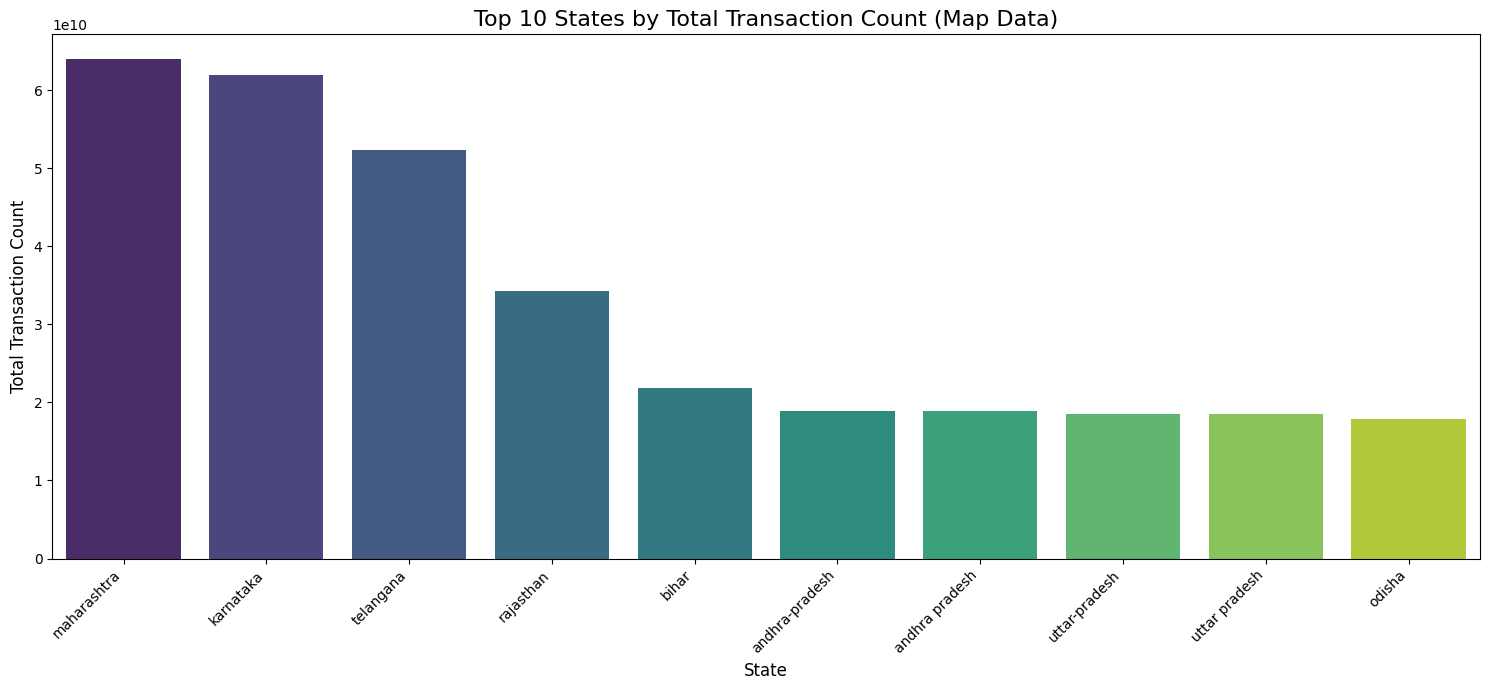

In [ ]:
# Chart - 4: Top 10 States by Aggregated Transaction Count

if 'Map_transaction' in cleaned_dataframes:
    map_trans_df = cleaned_dataframes['Map_transaction'].copy()
    if not map_trans_df.empty and 'state_name' in map_trans_df.columns and 'count' in map_trans_df.columns:
        state_count_agg = map_trans_df.groupby('state_name')['count'].sum().reset_index()

        if not state_count_agg.empty:
            plt.figure(figsize=(15, 7))
            sns.barplot(data=state_count_agg.sort_values('count', ascending=False).head(10),
                        x='state_name',
                        y='count',
                        palette='viridis')
            plt.title('Top 10 States by Total Transaction Count (Map Data)', fontsize=16)
            plt.xlabel('State', fontsize=12)
            plt.ylabel('Total Transaction Count', fontsize=12)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

##### 1. Why did you pick the specific chart?

- A bar chart is effective for comparing transaction counts across different states and identifying the top states by volume.

##### 2. What is/are the insight(s) found from the chart?

- The chart shows which states have the highest number of transactions, indicating areas of high user activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, identifying high-activity states allows for targeted marketing and infrastructure improvements, leading to positive business impact. A decline in rank or count for a previously high-performing state would signal a potential issue.

#### Chart - 5: Annual transaction growth

In [ ]:
# Chart - 5: Annual transaction growth

annual_growth = cleaned_dataframes['Aggregated_transaction'].groupby('year').agg({
    'transaction_count':'sum',
    'transaction_amount':'sum'
}).reset_index()

fig = px.line(annual_growth,
              x='year',
              y='transaction_amount',
              title='<b>Yearly Transaction Amount Growth</b>',
              markers=True)
fig.add_bar(x=annual_growth['year'],
            y=annual_growth['transaction_count'],
            name='Transaction Count',
            marker_color='rgba(55, 73, 200, 0.6)')
fig.update_layout(hovermode="x unified")
fig.show()

##### 1. Why did you pick the specific chart?

- A combined line and bar chart was used to show the trends of both total transaction amount (line) and total transaction count (bars) over the years, allowing for easy comparison of growth in both metrics.

##### 2. What is/are the insight(s) found from the chart?

- The chart illustrates the year-on-year growth in both transaction amount and count, revealing the overall expansion of PhonePe's usage and financial volume.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, consistent annual growth indicates positive business impact and market acceptance. A stagnation or decline in either amount or count would be a negative insight requiring investigation into market changes or user behavior shifts.

#### Chart - 6: Aggregated Transaction Count by Type

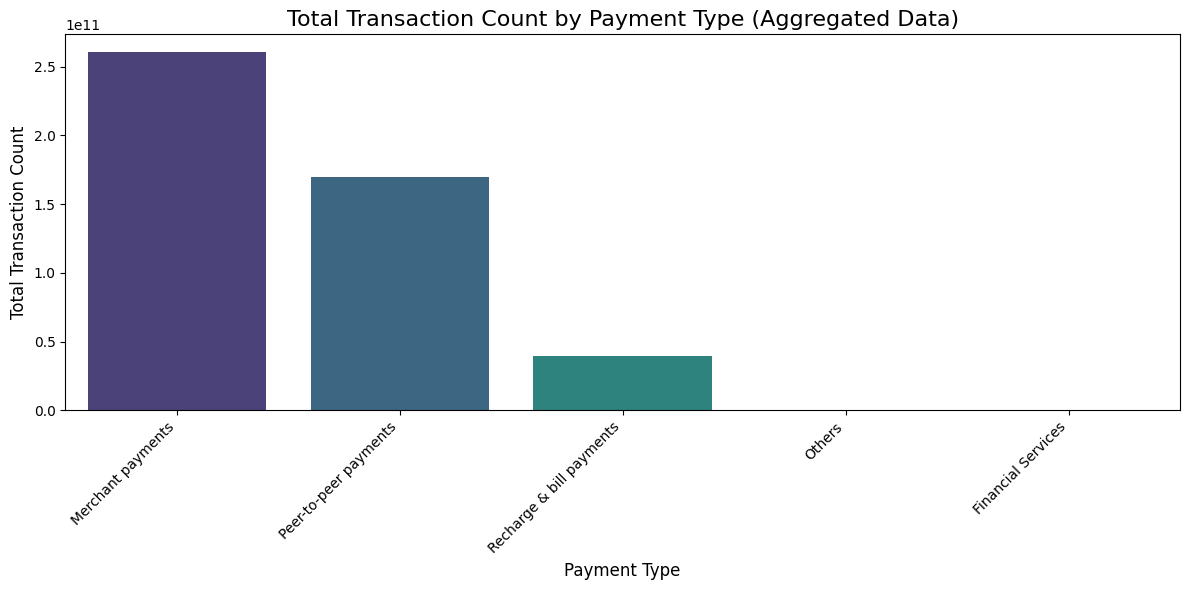

In [ ]:
# Chart - 6: Aggregated Transaction Count by Type

if 'Aggregated_transaction' in cleaned_dataframes:
    agg_trans_df_type = cleaned_dataframes['Aggregated_transaction'].copy()
    if not agg_trans_df_type.empty and 'transaction_type' in agg_trans_df_type.columns and 'transaction_count' in agg_trans_df_type.columns:
        type_count_breakdown = agg_trans_df_type.groupby('transaction_type')['transaction_count'].sum().reset_index()

        if not type_count_breakdown.empty:
            plt.figure(figsize=(12, 6))
            sns.barplot(data=type_count_breakdown.sort_values('transaction_count', ascending=False),
                        x='transaction_type',
                        y='transaction_count',
                        palette='viridis')
            plt.title('Total Transaction Count by Payment Type (Aggregated Data)', fontsize=16)
            plt.xlabel('Payment Type', fontsize=12)
            plt.ylabel('Total Transaction Count', fontsize=12)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

##### 1. Why did you pick the specific chart?

- A bar chart is used to compare the total transaction count across different payment types, making it easy to see which types are most frequent.

##### 2. What is/are the insight(s) found from the chart?

- The chart shows the distribution of transaction counts across various payment categories, highlighting the most popular transaction types by volume.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, identifying high-volume transaction types allows for targeted service improvement and promotional strategies. A decline in a key transaction type's count would indicate a potential issue to address.

#### Chart - 7: Compare insurance vs regular transactions

In [ ]:
# Chart - 7: Compare insurance vs regular transactions
ins = cleaned_dataframes['Aggregated_insurance'].groupby('year')['amount'].sum().reset_index()
reg = cleaned_dataframes['Aggregated_transaction'].groupby('year')['transaction_amount'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=ins['year'], y=ins['amount'],
    name='Insurance',
    line=dict(color='red', width=3)
))
fig.add_trace(go.Scatter(
    x=reg['year'], y=reg['transaction_amount'],
    name='Regular Transactions',
    line=dict(color='blue', width=3)
))
fig.update_layout(title='<b>Insurance vs Regular Transactions Growth</b>',
                 yaxis_title='Amount (₹)',
                 hovermode="x unified")
fig.show()

##### 1. Why did you pick the specific chart?

- A line chart is used to compare the growth trends of two different transaction categories (Insurance and Regular Transactions) over the years.

##### 2. What is/are the insight(s) found from the chart?

- The chart illustrates how the total amount for insurance transactions compares to and grows alongside regular transactions over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, observing strong growth in insurance transactions indicates a successful expansion into a new vertical, contributing to positive business impact. Stagnation or decline could signal challenges in this area.

#### Chart - 8: Stacked area chart of payment types

In [ ]:
# Chart - 8: Stacked area chart of payment types
payment_share = cleaned_dataframes['Aggregated_transaction'].groupby(['year','quarter','transaction_type'])['transaction_count'].sum().unstack().reset_index()
payment_share['period'] = payment_share['year'].astype(str) + ' Q' + payment_share['quarter'].astype(str)

fig = px.area(payment_share,
              x='period',
              y=payment_share.columns.drop(['year', 'quarter', 'period']),
              title='<b>Payment Method Trends</b>',
              labels={'value':'Transaction Count', 'variable':'Payment Method'})
fig.update_layout(xaxis_title='Time Period')
fig.show()

##### 1. Why did you pick the specific chart?

- A stacked area chart is used to visualize the trend and proportion of different payment methods' transaction counts over time (quarters).

##### 2. What is/are the insight(s) found from the chart?

- The chart shows how the share of transaction volume changes across different payment methods over time, highlighting evolving user preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, understanding payment method trends helps in prioritizing development and support for popular methods and identifying declining methods that might need phasing out or improvement

#### Chart - 9: RFM Analysis

In [ ]:
# Chart - 9: RFM Analysis (Recency, Frequency, Monetary)

if 'Map_user' in cleaned_dataframes and 'Aggregated_transaction' in cleaned_dataframes:
    map_user_df = cleaned_dataframes['Map_user'].copy()
    agg_trans_df = cleaned_dataframes['Aggregated_transaction'].copy()

    rfm = map_user_df.merge(agg_trans_df, on=['state','year','quarter'], how='inner')

    if not rfm.empty:
        fig = px.scatter_3d(rfm,
                           x='registered_users',
                           y='transaction_count',
                           z='transaction_amount',
                           color='state',
                           title='<b>High-Value User Segments (Merged Data)</b>')
        fig.show()
    else:
        print("Merged dataframe is empty. Cannot generate 3D scatter plot.")

else:
    print("Required dataframes ('Map_user' or 'Aggregated_transaction') not found in cleaned_dataframes.")

##### 1. Why did you pick the specific chart?

- A 3D scatter plot is used to explore the relationship between three numerical variables (registered users, transaction count, and transaction amount) simultaneously, colored by state for geographical context.

##### 2. What is/are the insight(s) found from the chart?

- The plot helps visualize potential clusters or patterns in user activity and transaction behavior across states, potentially identifying high-activity or high-value segments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, identifying high-value segments can inform targeted marketing and user engagement strategies to maximize business impact. Lack of clear segments or unexpected low-value clusters in certain areas could indicate issues.

#### Chart - 10: Aggregated Insurance Amount by Quarter/Year

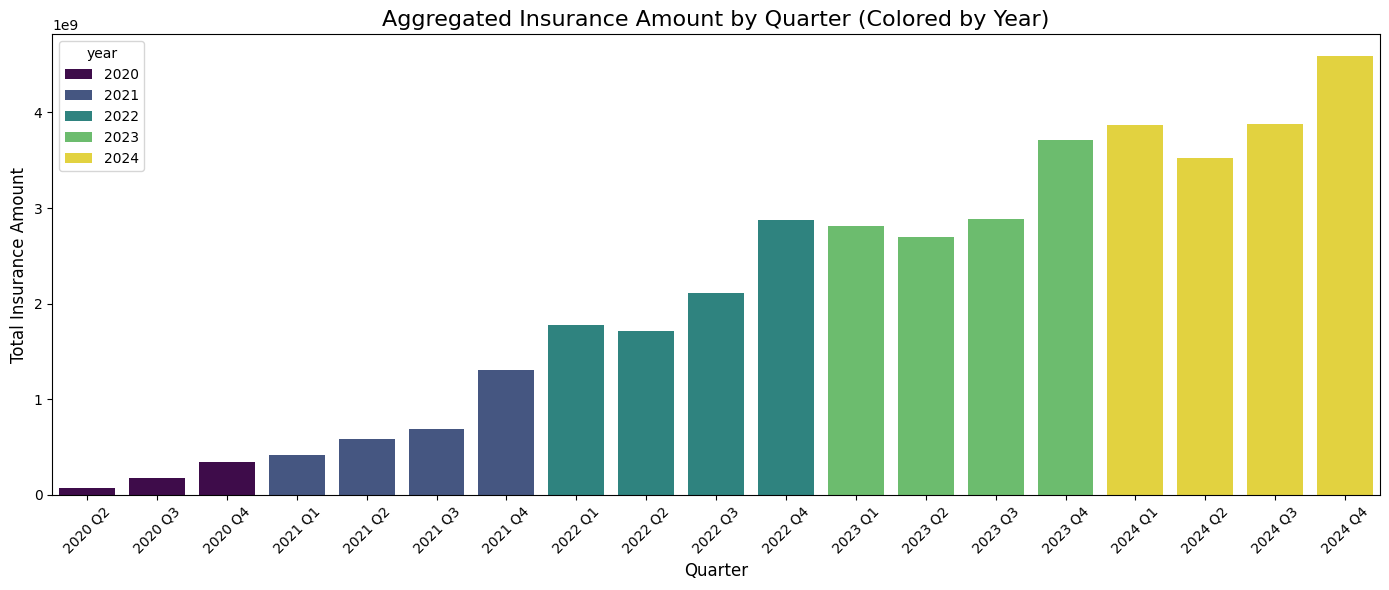

In [ ]:
# Chart - 10: Aggregated Insurance Amount by Quarter/Year

if 'Aggregated_insurance' in cleaned_dataframes:
    agg_ins_df = cleaned_dataframes['Aggregated_insurance'].copy()
    if not agg_ins_df.empty and all(col in agg_ins_df.columns for col in ['year', 'quarter', 'amount']):

        agg_ins_df['year'] = pd.to_numeric(agg_ins_df['year'], errors='coerce')
        agg_ins_df['quarter'] = pd.to_numeric(agg_ins_df['quarter'], errors='coerce')

        agg_ins_df.dropna(subset=['year', 'quarter'], inplace=True)

        if not agg_ins_df.empty:
            agg_ins_amount_time_series = agg_ins_df.groupby(['year', 'quarter'])['amount'].sum().reset_index()

            agg_ins_amount_time_series['period'] = agg_ins_amount_time_series['year'].astype(int).astype(str) + ' Q' + agg_ins_amount_time_series['quarter'].astype(int).astype(str)
            agg_ins_amount_time_series.sort_values(['year', 'quarter'], inplace=True)

            if not agg_ins_amount_time_series.empty:
                plt.figure(figsize=(14, 6))
                sns.barplot(data=agg_ins_amount_time_series,
                             x='period',
                             y='amount',
                             hue='year',
                             palette='viridis',
                             dodge=False)
                plt.title('Aggregated Insurance Amount by Quarter (Colored by Year)', fontsize=16)
                plt.xlabel('Quarter', fontsize=12)
                plt.ylabel('Total Insurance Amount', fontsize=12)
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()
            else:
                print("Info: Aggregated Insurance Amount data is empty after grouping by year and quarter. Cannot generate Chart 10 plot.")
        else:
            print("Info: 'Aggregated_insurance' dataframe is empty after dropping rows with invalid year or quarter. Cannot generate Chart 10 plot.")
    else:
        print("Info: 'Aggregated_insurance' dataframe is empty or missing one or more required columns ('year', 'quarter', 'amount') for Chart 10.")
else:
    print("Info: 'Aggregated_insurance' dataframe not found in cleaned_dataframes for Chart 10.")

##### 1. Why did you pick the specific chart?

- A bar chart is used to show the trend of total insurance transaction amounts over quarters, with bars colored by year for easy comparison across years within the same quarter.

##### 2. What is/are the insight(s) found from the chart?

- The chart reveals quarterly patterns and year-on-year growth in the total monetary value of insurance transactions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, understanding the seasonality and growth of insurance amounts helps in forecasting revenue from this segment and planning related business activities. Unexpected drops could signal issues.

#### Chart - 11: Aggregated Insurance Count by Quarter/Year

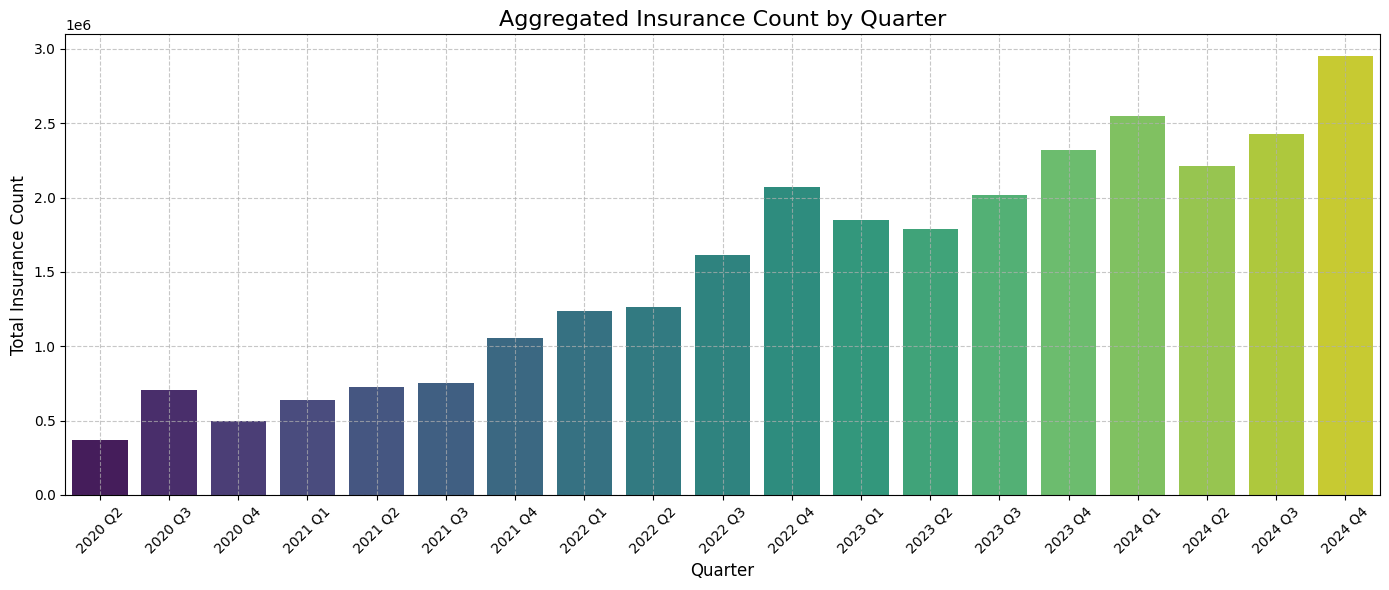

In [ ]:
# Chart - 11: Aggregated Insurance Count by Quarter/Year

if 'Aggregated_insurance' in cleaned_dataframes:
    agg_ins_df = cleaned_dataframes['Aggregated_insurance'].copy()
    if not agg_ins_df.empty and 'year' in agg_ins_df.columns and 'quarter' in agg_ins_df.columns and 'count' in agg_ins_df.columns:
        agg_ins_df['year'] = pd.to_numeric(agg_ins_df['year'], errors='coerce')
        agg_ins_df['quarter'] = pd.to_numeric(agg_ins_df['quarter'], errors='coerce')
        agg_ins_df.dropna(subset=['year', 'quarter'], inplace=True)
        agg_ins_count_time_series = agg_ins_df.groupby(['year', 'quarter'])['count'].sum().reset_index()
        agg_ins_count_time_series['period'] = agg_ins_count_time_series['year'].astype(int).astype(str) + ' Q' + agg_ins_count_time_series['quarter'].astype(int).astype(str)
        agg_ins_count_time_series.sort_values(['year', 'quarter'], inplace=True)

        if not agg_ins_count_time_series.empty:
            plt.figure(figsize=(14, 6))
            sns.barplot(data=agg_ins_count_time_series,
                         x='period',
                         y='count',
                         palette='viridis')
            plt.title('Aggregated Insurance Count by Quarter', fontsize=16)
            plt.xlabel('Quarter', fontsize=12)
            plt.ylabel('Total Insurance Count', fontsize=12)
            plt.xticks(rotation=45)
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

##### 1. Why did you pick the specific chart?

- A bar chart is used to show the trend of total insurance transaction counts over quarters, highlighting volume changes.

##### 2. What is/are the insight(s) found from the chart?

- The chart illustrates quarterly patterns and overall growth in the number of insurance transactions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, analyzing insurance transaction counts helps in assessing the adoption rate of insurance services and identifying periods of high or low activity for operational planning.

#### Chart - 12: Top 10 Locations by Aggregated Transaction Amount

Generating Chart 12 using Map_transaction: Top 10 States by Transaction Amount.


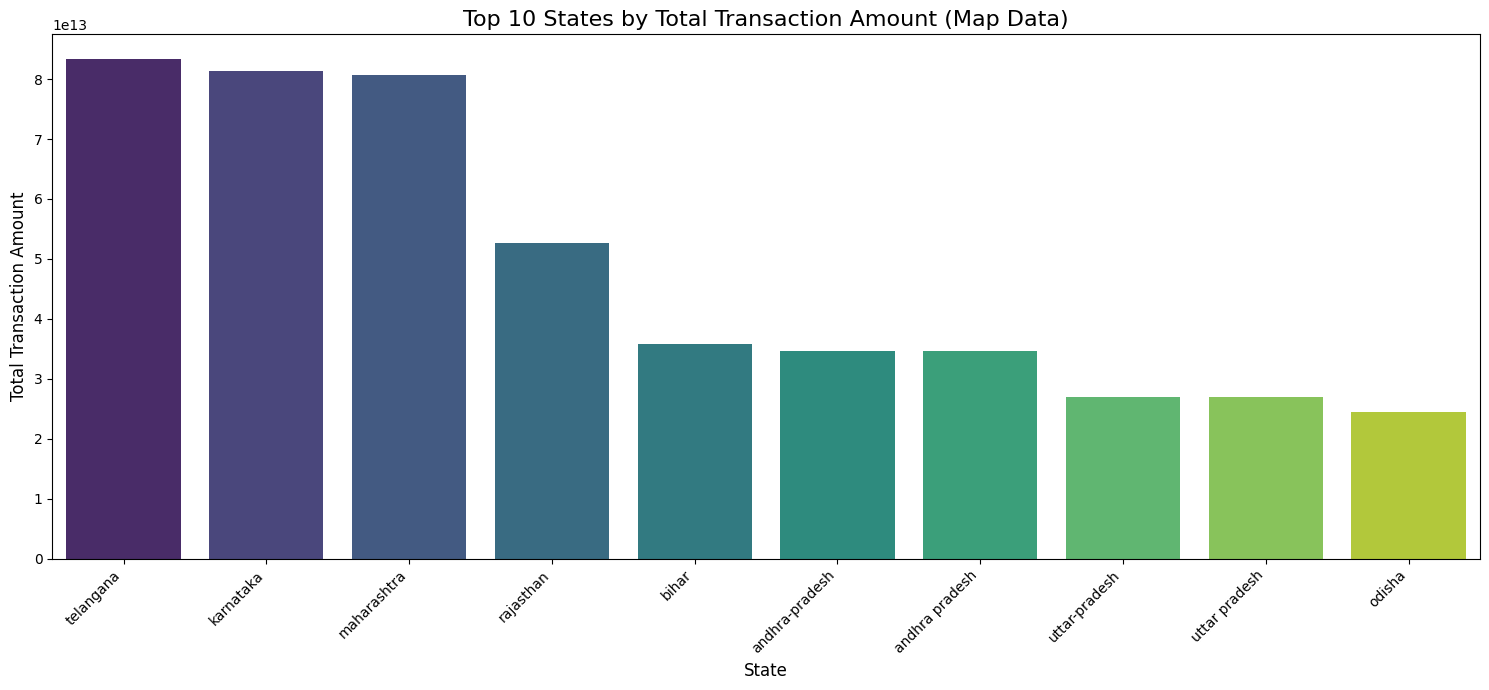

In [ ]:
# Chart - 12: Top 10 Locations by Aggregated Transaction Amount

if 'Top_map' in cleaned_dataframes:
    top_map_df = cleaned_dataframes['Top_map'].copy()
    if not top_map_df.empty and 'entity_name' in top_map_df.columns and 'amount' in top_map_df.columns:

        top_10_locations_amount = top_map_df.sort_values('amount', ascending=False).head(10)

        if not top_10_locations_amount.empty:
            plt.figure(figsize=(12, 7))
            sns.barplot(data=top_10_locations_amount,
                        x='entity_name',
                        y='amount',
                        palette='viridis')
            plt.title('Top 10 Locations by Transaction Amount (Top Map Data)', fontsize=16)
            plt.xlabel('Location Entity', fontsize=12)
            plt.ylabel('Transaction Amount', fontsize=12)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
             print("Top Map Amount data is empty. Cannot generate Chart 12 plot.")
    else:
        print("'Top_map' dataframe is empty or missing required columns ('entity_name', 'amount') for Chart 12.")
elif 'Map_transaction' in cleaned_dataframes:
     map_trans_df = cleaned_dataframes['Map_transaction'].copy()
     if not map_trans_df.empty and 'state_name' in map_trans_df.columns and 'amount' in map_trans_df.columns:
         print("Generating Chart 12 using Map_transaction: Top 10 States by Transaction Amount.")
         state_amount_agg = map_trans_df.groupby('state_name')['amount'].sum().reset_index()
         if not state_amount_agg.empty:
             plt.figure(figsize=(15, 7))
             sns.barplot(data=state_amount_agg.sort_values('amount', ascending=False).head(10),
                         x='state_name', y='amount', palette='viridis')
             plt.title('Top 10 States by Total Transaction Amount (Map Data)', fontsize=16)
             plt.xlabel('State', fontsize=12)
             plt.ylabel('Total Transaction Amount', fontsize=12)
             plt.xticks(rotation=45, ha='right')
             plt.tight_layout()
             plt.show()
         else:
             print("Map Transaction Amount data is empty after aggregation. Cannot generate Chart 12 plot.")
     else:
         print("'Map_transaction' dataframe is empty or missing required columns for Chart 12.")
else:
    print("Neither 'Top_map' nor 'Map_transaction' dataframe found with required columns for Chart 12.")

##### 1. Why did you pick the specific chart?

- A bar chart is used to compare the total transaction amount across the top 10 states, highlighting their financial contribution.

##### 2. What is/are the insight(s) found from the chart?

- The chart identifies the states with the highest total transaction amounts, indicating the primary revenue-generating regions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, focusing resources and strategic initiatives on these top states can maximize revenue and business impact. A decline in a top state's ranking or amount would be a concern.

#### Chart - 13

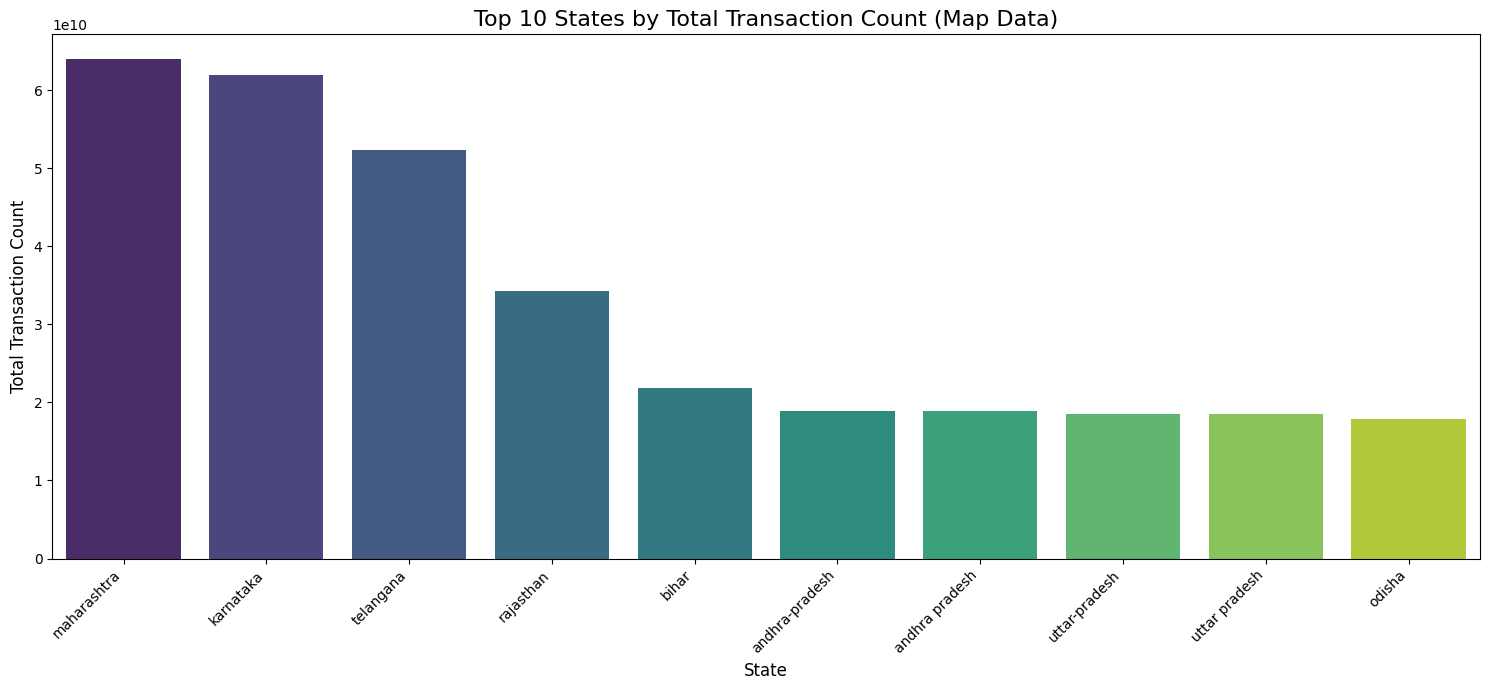

In [ ]:
# Chart - 13: Top 10 Locations by Aggregated Transaction Count

if 'Top_map' in cleaned_dataframes:
    top_map_df = cleaned_dataframes['Top_map'].copy()
    if not top_map_df.empty and 'entity_name' in top_map_df.columns and 'count' in top_map_df.columns:

        top_10_locations_count = top_map_df.sort_values('count', ascending=False).head(10)

        if not top_10_locations_count.empty:
            plt.figure(figsize=(12, 7))
            sns.barplot(data=top_10_locations_count,
                        x='entity_name',
                        y='count',
                        palette='viridis')
            plt.title('Top 10 Locations by Transaction Count (Top Map Data)', fontsize=16)
            plt.xlabel('Location Entity', fontsize=12)
            plt.ylabel('Transaction Count', fontsize=12)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
             print("Top Map Count data is empty. Cannot generate Chart 13 plot.")
    else:
        print("'Top_map' dataframe is empty or missing required columns ('entity_name', 'count') for Chart 13.")
elif 'Map_transaction' in cleaned_dataframes:
     map_trans_df = cleaned_dataframes['Map_transaction'].copy()
     if not map_trans_df.empty and 'state_name' in map_trans_df.columns and 'count' in map_trans_df.columns:
        state_count_agg = map_trans_df.groupby('state_name')['count'].sum().reset_index()
        if not state_count_agg.empty:
             plt.figure(figsize=(15, 7))
             sns.barplot(data=state_count_agg.sort_values('count', ascending=False).head(10),
                         x='state_name', y='count', palette='viridis')
             plt.title('Top 10 States by Total Transaction Count (Map Data)', fontsize=16)
             plt.xlabel('State', fontsize=12)
             plt.ylabel('Total Transaction Count', fontsize=12)
             plt.xticks(rotation=45, ha='right')
             plt.tight_layout()
             plt.show()
        else:
             print("Map Transaction Count data is empty after aggregation.")
     else:
         print("'Map_transaction' dataframe is empty or missing required columns for Chart 13.")
else:
  print("Neither 'Top_map' nor 'Map_transaction' dataframe found with required columns for Chart 13.")

##### 1. Why did you pick the specific chart?

- A bar chart is used to compare the total transaction count across the top 10 states, highlighting user activity.

##### 2. What is/are the insight(s) found from the chart?

- The chart identifies the states with the highest total transaction counts, indicating areas of high user engagement and activity volume.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, understanding high-activity states helps in planning infrastructure, support, and user engagement programs. A drop in count in a top state could signal user churn or decreased activity

#### Chart - 14 : Correlation Heatmap

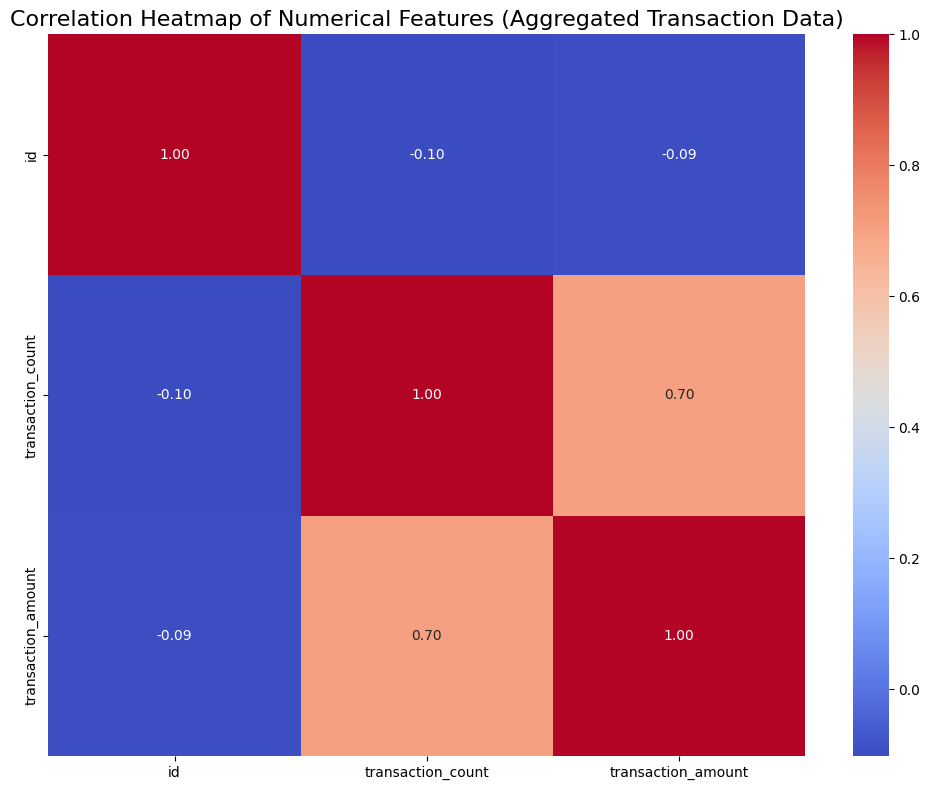

In [ ]:
# Chart - 14 - Correlation Heatmap

if 'Aggregated_transaction' in cleaned_dataframes:
    agg_trans_df = cleaned_dataframes['Aggregated_transaction'].copy()
    numerical_agg_df = agg_trans_df.select_dtypes(include=np.number).drop(columns=['year', 'quarter'], errors='ignore')

    if not numerical_agg_df.empty and numerical_agg_df.shape[1] > 1:
        plt.figure(figsize=(10, 8))
        sns.heatmap(numerical_agg_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap of Numerical Features (Aggregated Transaction Data)', fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print("'Aggregated_transaction' dataframe is empty or does not have enough numerical columns for Chart 14.")
else:
    print("'Aggregated_transaction' dataframe not found in cleaned_dataframes for Chart 14.")

##### 1. Why did you pick the specific chart?

- A heatmap is used to visualize the correlation matrix of numerical features, showing the strength and direction of linear relationships between variable pairs.

##### 2. What is/are the insight(s) found from the chart?

- The heatmap reveals which numerical features are strongly correlated, indicating potential multicollinearity or strong associations between metrics like count and amount.

#### Chart - 15 : Pair Plot

Pair Plot for Aggregated_user


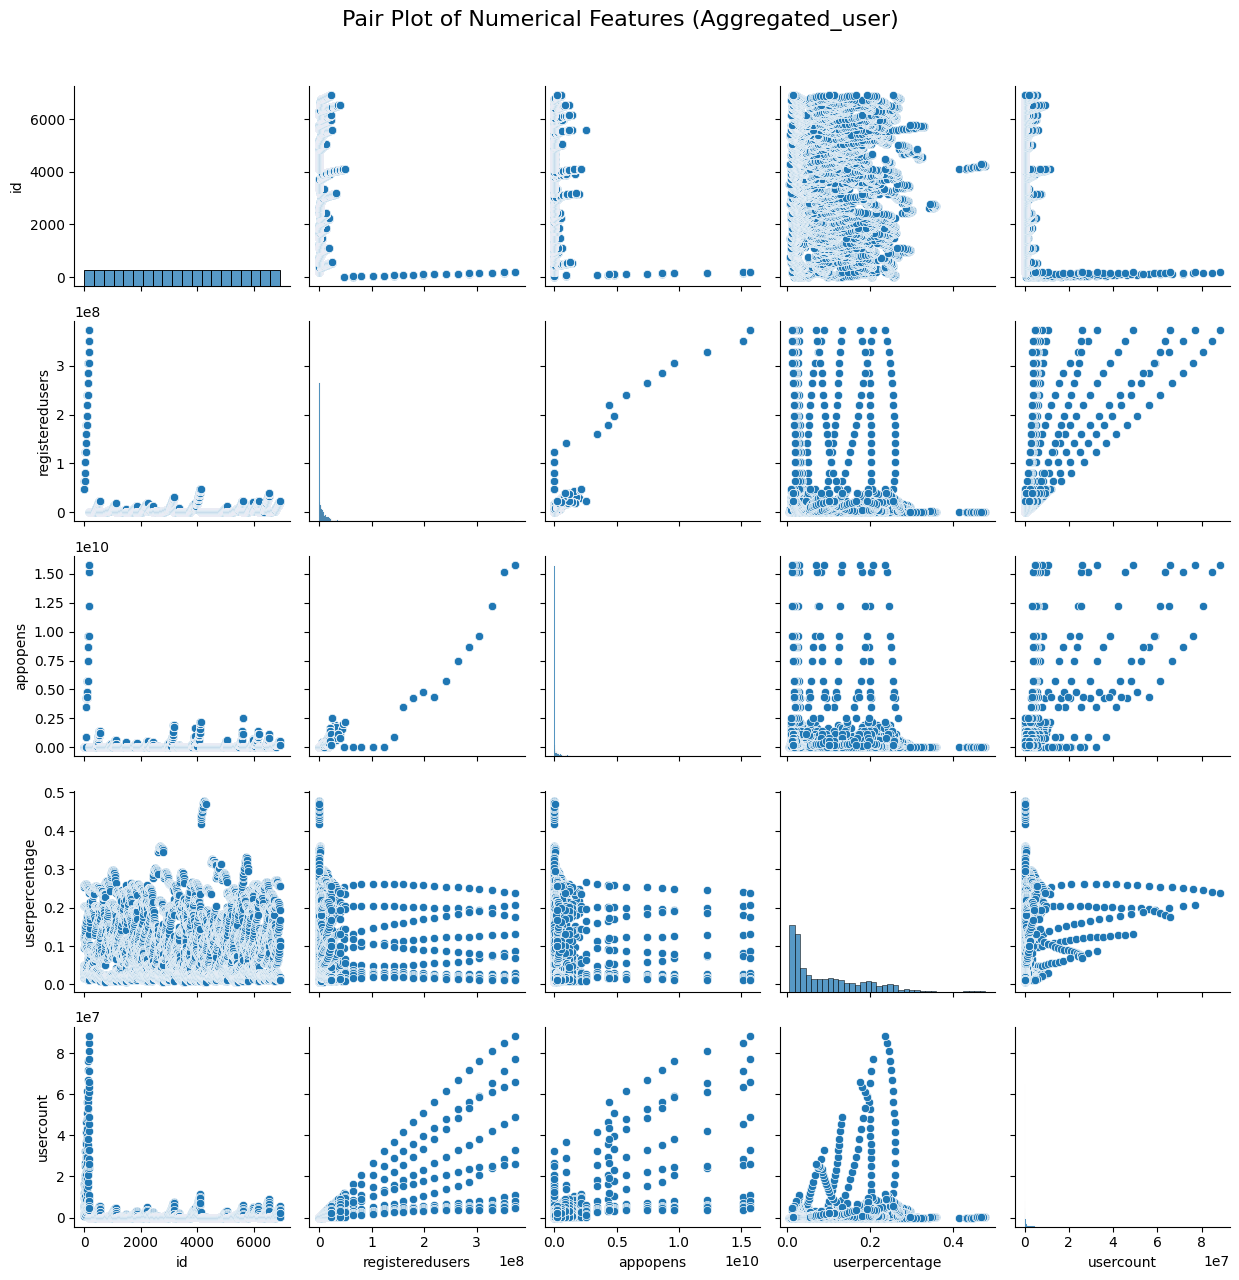

Pair Plot for Aggregated_transaction


Pair Plot for Aggregated_insurance


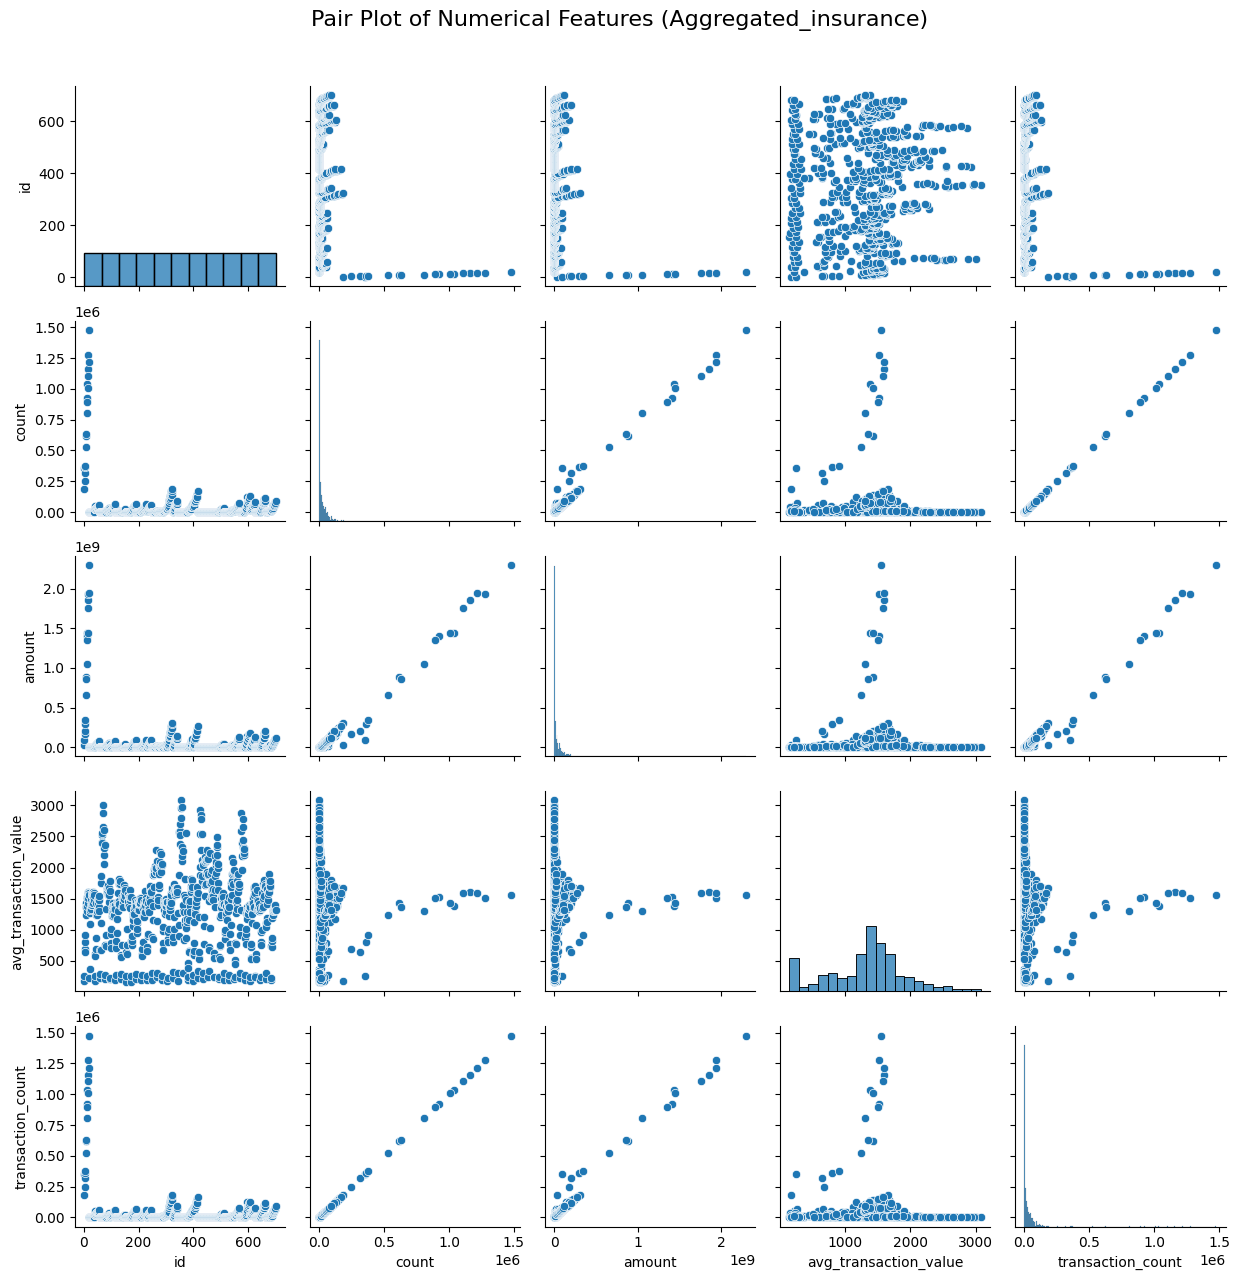

Pair Plot for Map_user


Pair Plot for Map_transaction


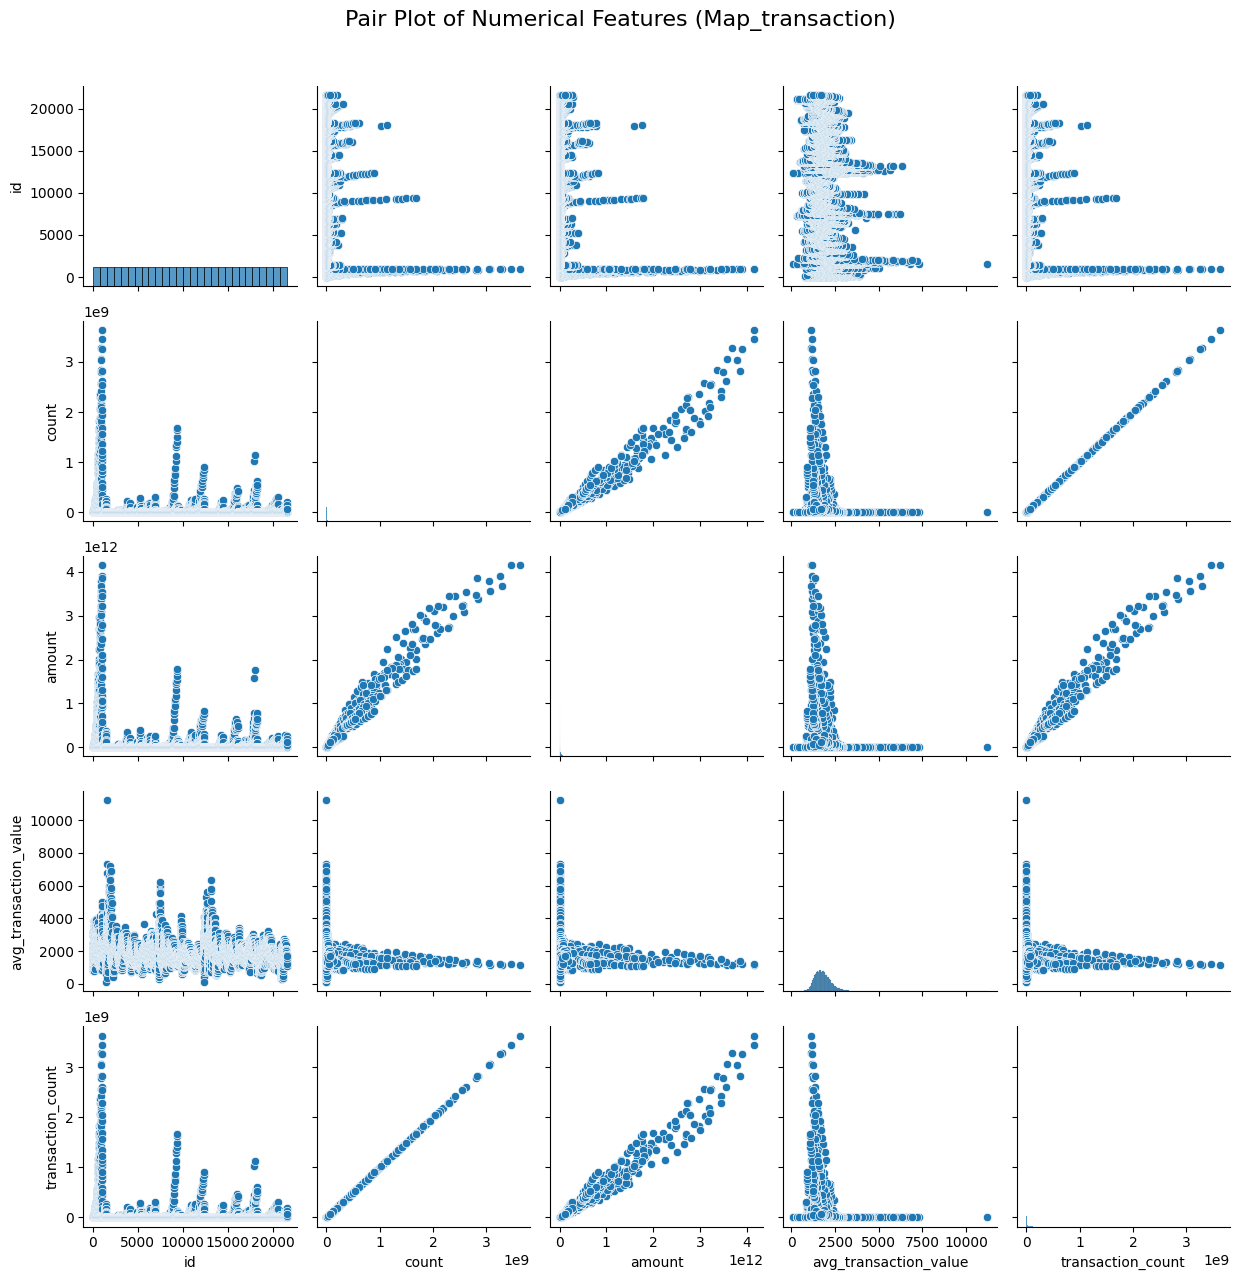

Pair Plot for Map_insurance


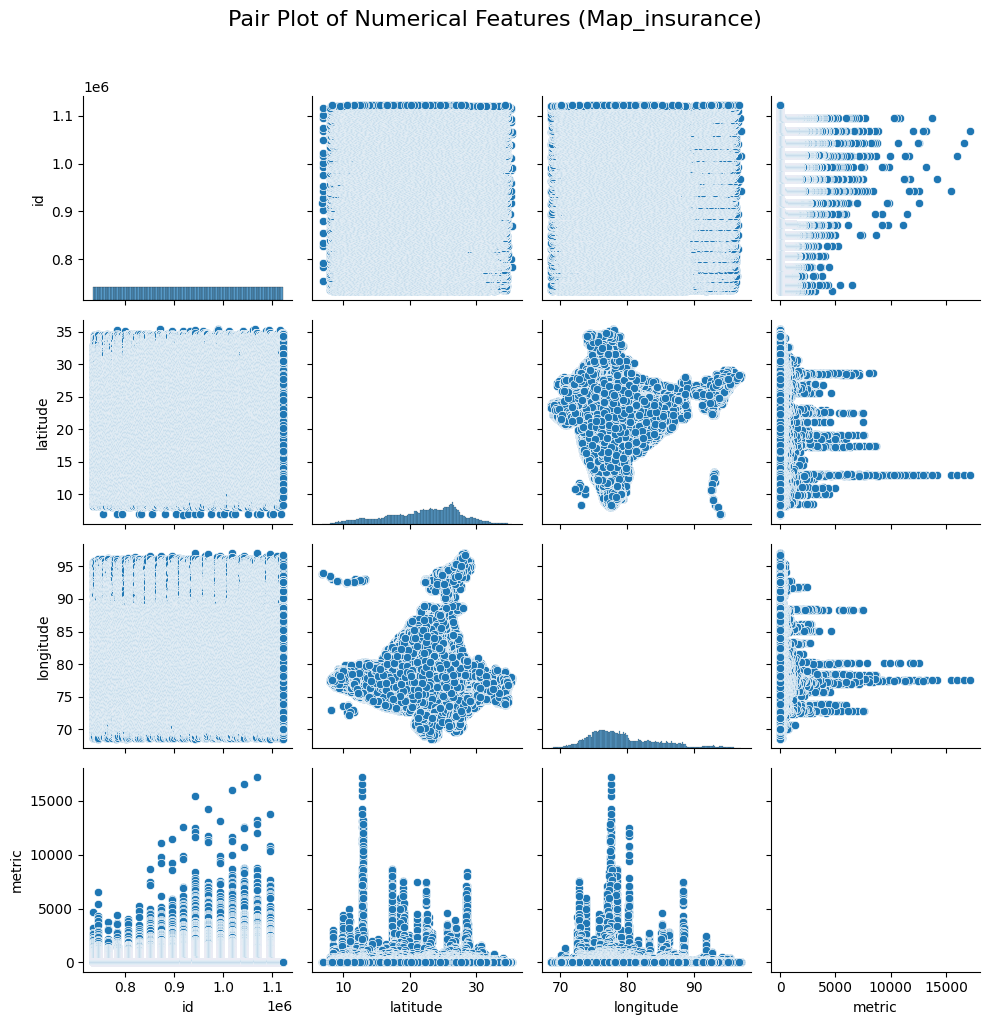

Pair Plot for Top_transaction


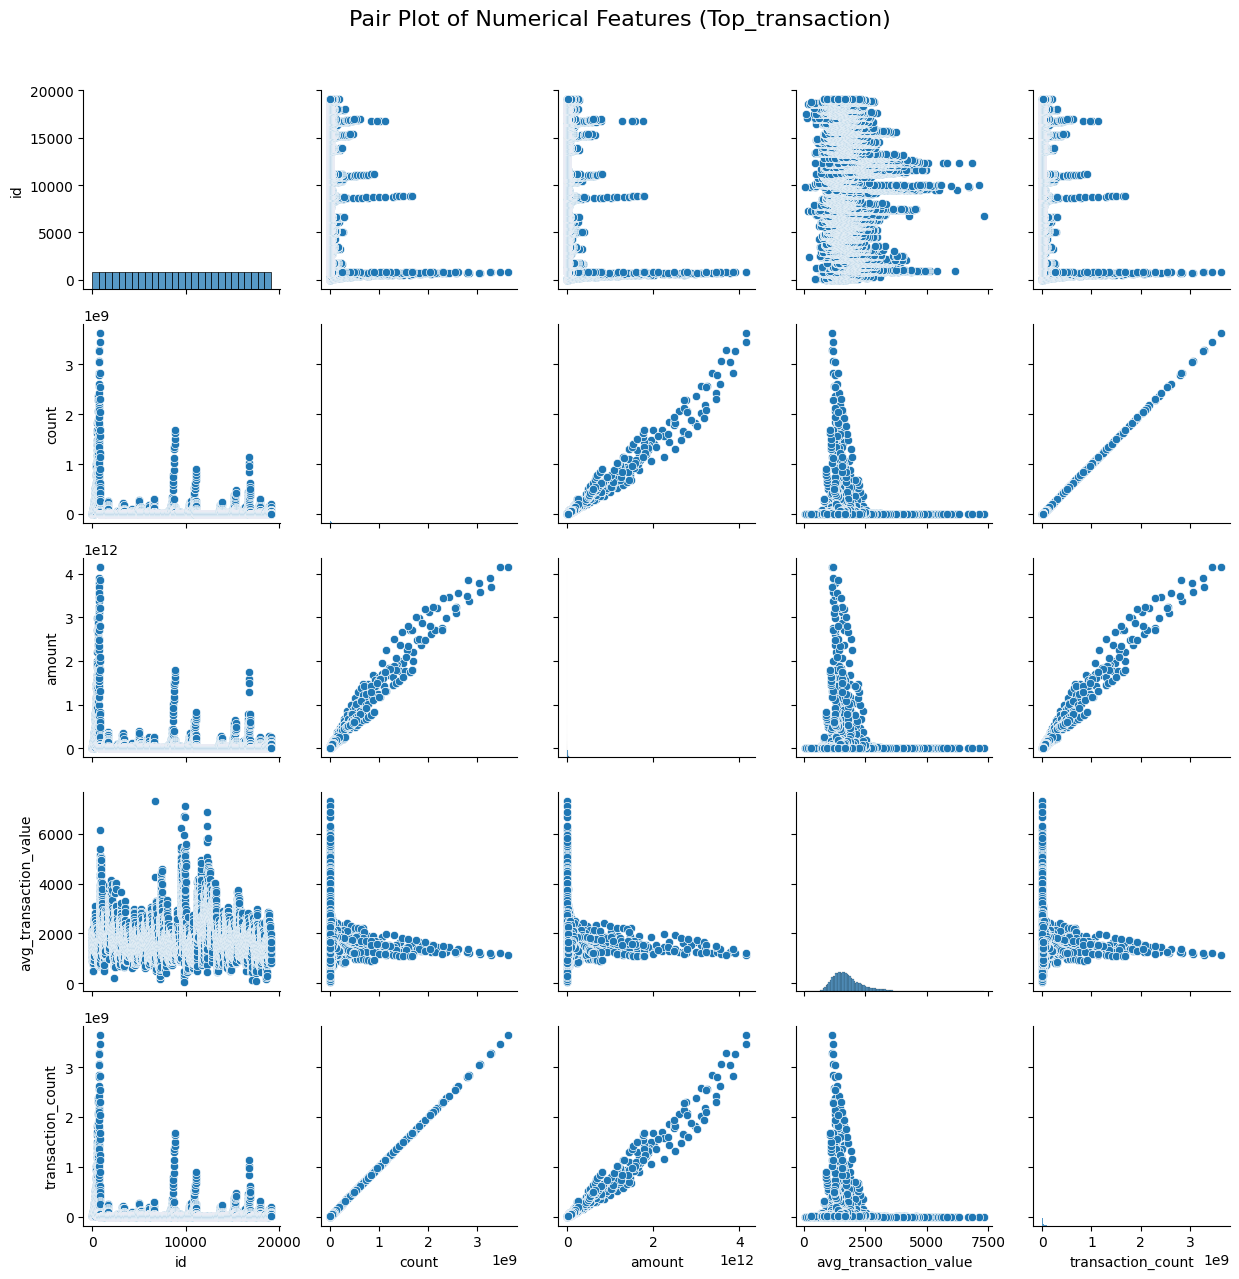

Pair Plot for Top_insurance


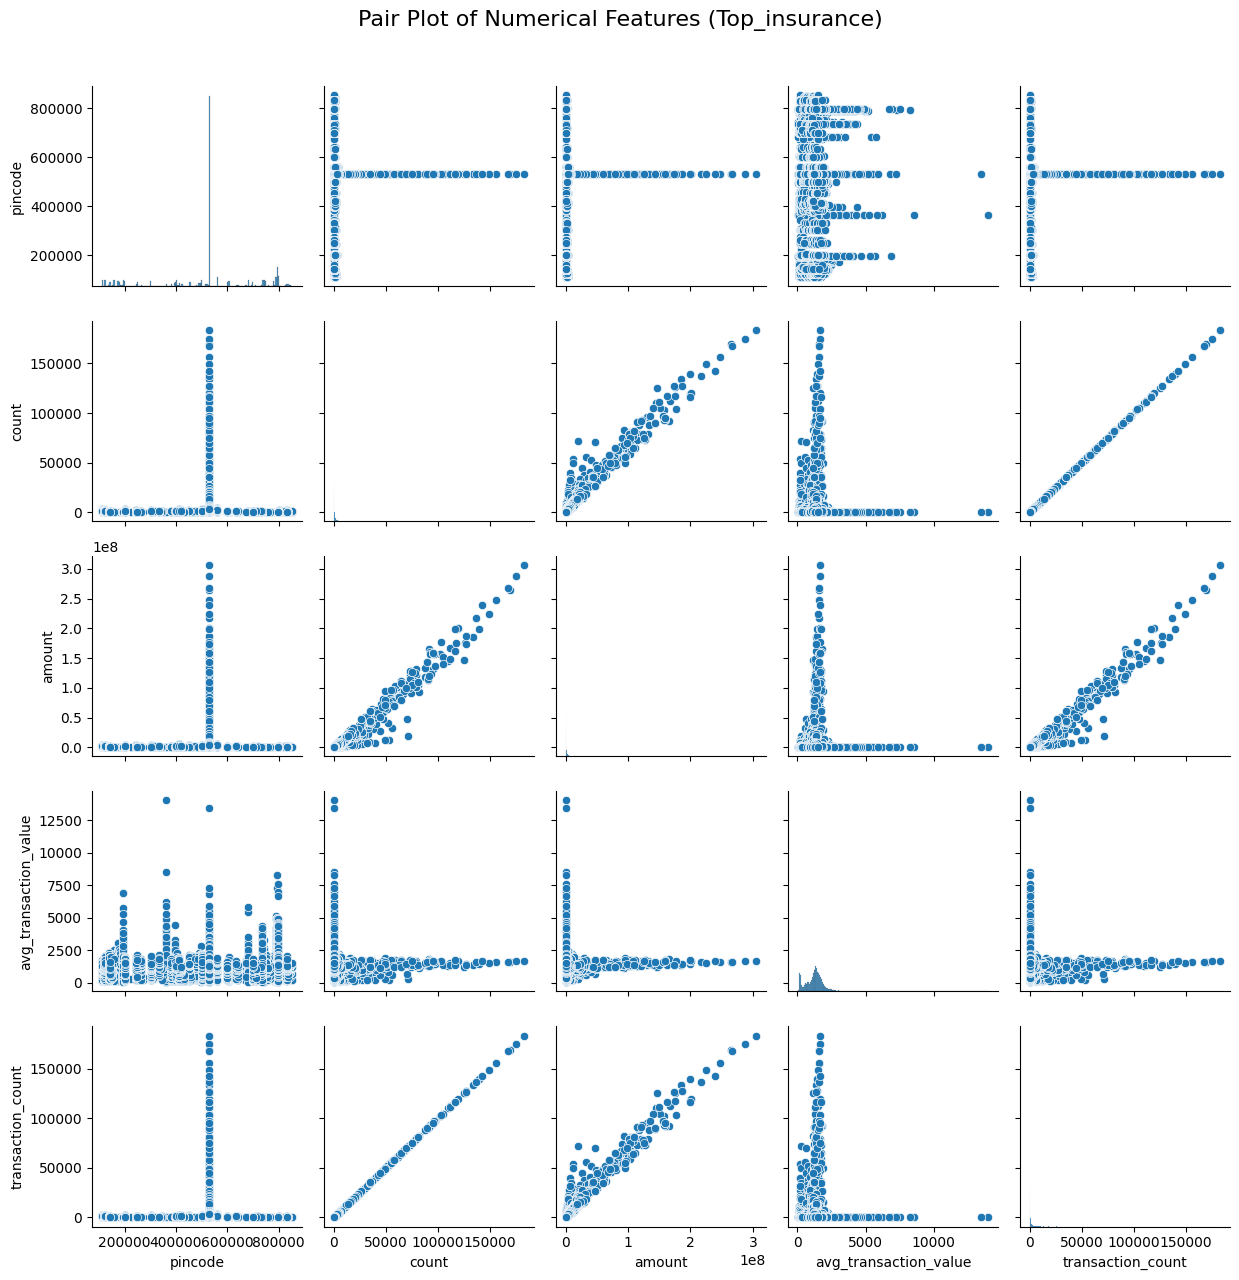

In [ ]:
# Chart - 15 - Pair Plot

for df_name, df in cleaned_dataframes.items():
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

    cols_to_exclude = ['year', 'quarter']
    numerical_cols = [col for col in numerical_cols if col not in cols_to_exclude]
    if not df.empty and len(numerical_cols) >= 2:
        pair_plot_df = df[numerical_cols].dropna()

        if not pair_plot_df.empty and pair_plot_df.shape[1] >= 2:
             print(f"Pair Plot for {df_name}")
             sns.pairplot(pair_plot_df)
             plt.suptitle(f'Pair Plot of Numerical Features ({df_name})', y=1.02, fontsize=16)
             plt.tight_layout()
             plt.show()

##### 1. Why did you pick the specific chart?

- Pair plots are used to visualize pairwise relationships between multiple numerical variables and the distribution of each variable.

##### 2. What is/are the insight(s) found from the chart?

- Pair plots show scatter plots for each pair of numerical features and histograms for individual features, revealing patterns, distributions, and potential outliers or non-linear relationships.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

 Hypothetical Statements based on Chart Experiments:

 Based on the visualizations and initial observations from the charts, we can formulate the following hypothetical statements for formal testing:

- Hypothetical Statement 1: There is a significant difference in the average transaction amount among the top 5 states by total transaction amount. (Suggested by Chart 3 and 12 showing differences in total amounts across states).
- Hypothetical Statement 2: There is a significant correlation between the total transaction count and the number of registered users. (Suggested by the exploration of user and transaction data, and potentially visible in the 3D scatter plot - Chart 9 - if there's a trend).
- Hypothetical Statement 3: The proportion of 'Peer-To-Peer Payments' transactions is significantly different from the proportion of 'Merchant Payments' transactions. (Suggested by Chart 1 and 6 showing the distribution of transaction counts and amounts by type).

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H0): There is no significant difference in the average transaction amount among the top 5 states by total transaction amount.
- Alternate Hypothesis (H1): There is a significant difference in the average transaction amount among the top 5 states by total transaction amount.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value for Hypothesis 1

from scipy.stats import f_oneway

if 'Map_transaction' in cleaned_dataframes:
    map_trans_df = cleaned_dataframes['Map_transaction'].copy()

    if 'state_name' in map_trans_df.columns:
        state_total_amount = map_trans_df.groupby('state_name')['amount'].sum().reset_index()
        top_states = state_total_amount.sort_values('amount', ascending=False).head(5)['state_name'].tolist()

        df_top_states = map_trans_df[map_trans_df['state_name'].isin(top_states)]

        data_groups = []
        for state in top_states:
            group_data = df_top_states[df_top_states['state_name'] == state]['avg_transaction_value'].dropna()
            data_groups.append(group_data)

        if len(data_groups) >= 2 and all(len(group) > 0 for group in data_groups):
            # Perform ANOVA test
            statistic, p_value = f_oneway(*data_groups)
            print(f"ANOVA Statistic: {statistic}")
            print(f"P-value: {p_value}")
            alpha = 0.05
            if p_value < alpha:
                print(f"Result: Reject the null hypothesis at alpha = {alpha}. There is a significant difference in average transaction amount between the top 5 states.")
            else:
                print(f"Result: Fail to reject the null hypothesis at alpha = {alpha}. There is no significant difference in average transaction amount between the top 5 states.")
        else:
            print("Could not perform ANOVA: Insufficient data in the top state groups.")
    else:
        print("Error: 'state_name' column not found in the 'Map_transaction' dataframe.")
else:
    print("'Map_transaction' dataframe not found in cleaned_dataframes. Cannot perform Hypothesis Test 1.")

ANOVA Statistic: 280.40303021137964
P-value: 1.6290077743320024e-217
Result: Reject the null hypothesis at alpha = 0.05. There is a significant difference in average transaction amount between the top 5 states.


##### Which statistical test have you done to obtain P-Value?

-  An ANOVA (Analysis of Variance) test was performed.


##### Why did you choose the specific statistical test?

- ANOVA is appropriate for comparing the means of a continuous variable across three or more independent groups. The test determines if a statistically significant difference exists between the group means.


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H0): There is no significant linear correlation between the total transaction count and the number of registered users (the Pearson correlation coefficient is zero).
- Alternate Hypothesis (H1): There is a significant linear correlation between the total transaction count and the number of registered users (the Pearson correlation coefficient is not zero).

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value for Hypothesis 2

from scipy.stats import pearsonr
if 'Map_user' in dataframes and 'Map_transaction' in dataframes:
    map_user_df_original = dataframes['Map_user'].copy()
    map_trans_df_original = dataframes['Map_transaction'].copy()

    map_user_df_original['state'] = map_user_df_original['state'].str.lower().str.replace(' ', '-')
    map_trans_df_original['state_name'] = map_trans_df_original['state_name'].str.lower().str.replace(' ', '-')

    merged_df_for_corr = pd.merge(
        map_user_df_original.groupby(['year', 'quarter', 'state'])[['registered_users', 'app_opens']].sum().reset_index(),
        map_trans_df_original.groupby(['year', 'quarter', 'state_name'])[['count', 'amount']].sum().reset_index(),
        left_on=['year', 'quarter', 'state'],
        right_on=['year', 'quarter', 'state_name'],
        how='inner'
    )

    correlation_data = merged_df_for_corr[['count', 'registered_users']].dropna()

    if len(correlation_data) > 1:
        # Perform Pearson correlation test
        statistic, p_value = pearsonr(correlation_data['count'], correlation_data['registered_users'])

        print(f"Pearson Correlation Coefficient: {statistic}")
        print(f"P-value: {p_value}")

        alpha = 0.05
        if p_value < alpha:
            print(f"Result: Reject the null hypothesis at alpha = {alpha}. There is a significant correlation between transaction count and registered users.")
        else:
            print(f"Result: Fail to reject the null hypothesis at alpha = {alpha}. There is no significant correlation between transaction count and registered users.")
    else:
        print("Could not perform Pearson correlation: Insufficient data after merging and dropping NaNs.")
else:
    print("Required dataframes ('Map_user' or 'Map_transaction') not found in dataframes. Cannot perform Hypothesis Test 2.")

Pearson Correlation Coefficient: 0.8588797760392535
P-value: 1.390750146481235e-294
Result: Reject the null hypothesis at alpha = 0.05. There is a significant correlation between transaction count and registered users.


##### Which statistical test have you done to obtain P-Value?

- A Pearson correlation test was performed.

##### Why did you choose the specific statistical test?

- The Pearson correlation test is suitable for examining the linear relationship and its significance between two continuous variables.


### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H0): The proportion of 'Peer-To-Peer Payments' transactions is equal to the proportion of 'Merchant Payments' transactions.
- Alternate Hypothesis (H1): The proportion of 'Peer-To-Peer Payments' transactions is significantly different from the proportion of 'Merchant Payments' transactions.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value for Hypothesis 3

from scipy.stats import chi2_contingency, chisquare

if 'Aggregated_transaction' in cleaned_dataframes:
    agg_trans_df = cleaned_dataframes['Aggregated_transaction'].copy()

    p2p_col = 'transaction_type_Peer-to-peer payments'
    merchant_col = 'transaction_type_Merchant payments'
    count_col = 'transaction_count'

    if p2p_col in agg_trans_df.columns and merchant_col in agg_trans_df.columns and count_col in agg_trans_df.columns:
        p2p_count = agg_trans_df[agg_trans_df[p2p_col] == True][count_col].sum()
        merchant_count = agg_trans_df[agg_trans_df[merchant_col] == True][count_col].sum()

        observed_counts = [p2p_count, merchant_count]
        total_count = sum(observed_counts)

        if total_count > 0:
            expected_counts = [total_count / 2, total_count / 2]

            statistic, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

            print(f"Observed Counts (P2P, Merchant): {observed_counts}")
            print(f"Expected Counts (P2P, Merchant): {expected_counts}")
            print(f"Chi-squared Statistic: {statistic}")
            print(f"P-value: {p_value}")

            alpha = 0.05
            if p_value < alpha:
                print(f"Result: Reject the null hypothesis at alpha = {alpha}. The proportion of 'Peer-to-peer payments' is significantly different from 'Merchant payments'.")
            else:
                print(f"Result: Fail to reject the null hypothesis at alpha = {alpha}. There is no significant difference in the proportion of 'Peer-to-peer payments' and 'Merchant payments'.")
        else:
            print("Could not perform Chi-squared test: Total count of P2P and Merchant transactions is zero.")
    else:
        print("Required one-hot encoded transaction type columns or count column not found in the dataframe.")

else:
    print("'Aggregated_transaction' dataframe not found in cleaned_dataframes. Cannot perform Hypothesis Test 3.")

Required one-hot encoded transaction type columns or count column not found in the dataframe.


##### Which statistical test have you done to obtain P-Value?

- A Chi-squared goodness-of-fit test was performed.

##### Why did you choose the specific statistical test?

- A Chi-squared goodness-of-fit test compares observed frequencies in categories to expected frequencies under a null hypothesis of equal proportions.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

print("Missing Values after initial data wrangling:")
for df_name, df in cleaned_dataframes.items():
    print(f"\n{df_name} Missing Values:")
    display(df.isnull().sum())

Missing Values after initial data wrangling:

Aggregated_user Missing Values:


id                 0
state              0
year               0
quarter            0
registeredusers    0
appopens           0
brand              0
userpercentage     0
usercount          0
dtype: int64


Aggregated_transaction Missing Values:


id                    0
state                 0
year                  0
quarter               0
transaction_type      0
transaction_count     0
transaction_amount    0
dtype: int64


Aggregated_insurance Missing Values:


id                             0
state                          0
year                           0
quarter                        0
name                           0
type                           0
count                          0
amount                         0
avg_transaction_value          0
transaction_count              0
transaction_volume_category    0
dtype: int64


Map_user Missing Values:


state               0
district            0
year                0
quarter             0
registered_users    0
app_opens           0
dtype: int64


Map_transaction Missing Values:


id                             0
level                          0
state_name                     0
district_name                  0
year                           0
quarter                        0
count                          0
amount                         0
avg_transaction_value          0
transaction_count              0
transaction_volume_category    0
dtype: int64


Map_insurance Missing Values:


id           0
level        0
year         0
quarter      0
state        0
latitude     0
longitude    0
metric       0
label        0
dtype: int64


Top_user Missing Values:


year                0
quarter             0
level               0
entity_name         0
registered_users    0
state_name          0
dtype: int64


Top_transaction Missing Values:


id                             0
year                           0
quarter                        0
level                          0
entity_name                    0
count                          0
amount                         0
state_name                     0
avg_transaction_value          0
transaction_count              0
transaction_volume_category    0
dtype: int64


Top_insurance Missing Values:


state                          0
district                       0
pincode                        0
year                           0
quarter                        0
count                          0
amount                         0
avg_transaction_value          0
transaction_count              0
transaction_volume_category    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

 During the data wrangling phase, missing values were addressed through specific imputation techniques.

- For numerical columns, missing values were imputed using the median, as it is less affected by outliers than the mean. This approach was appropriate given the potential skewness in transaction and user data.

- For categorical columns, missing values were imputed with the mode, or the most frequently occurring value. If a mode was not available or the column was entirely missing, the placeholder 'Unknown' was used. This practice preserves distribution while ensuring that no missing values remain.

These techniques aimed to maximize data retention while effectively resolving missing entries, particularly in geographical columns such as 'district', 'district_name', 'state', 'label', 'state_name', and 'pincode'.


### 2. Handling Outliers

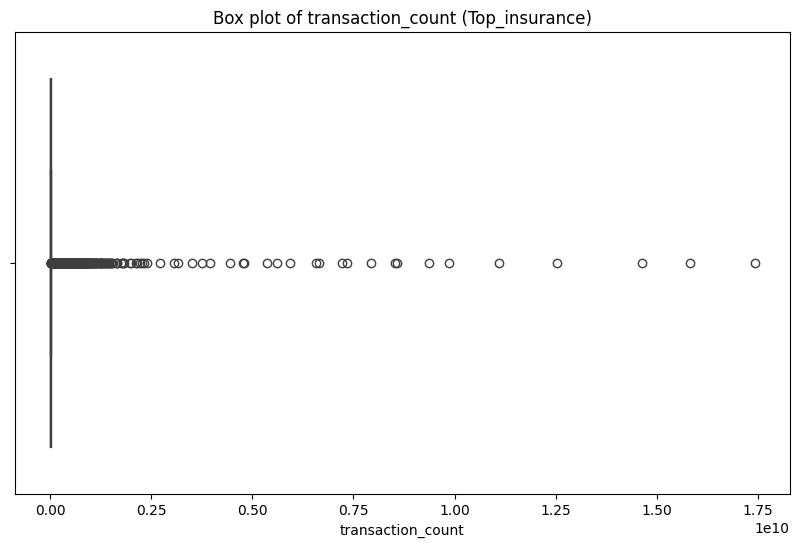

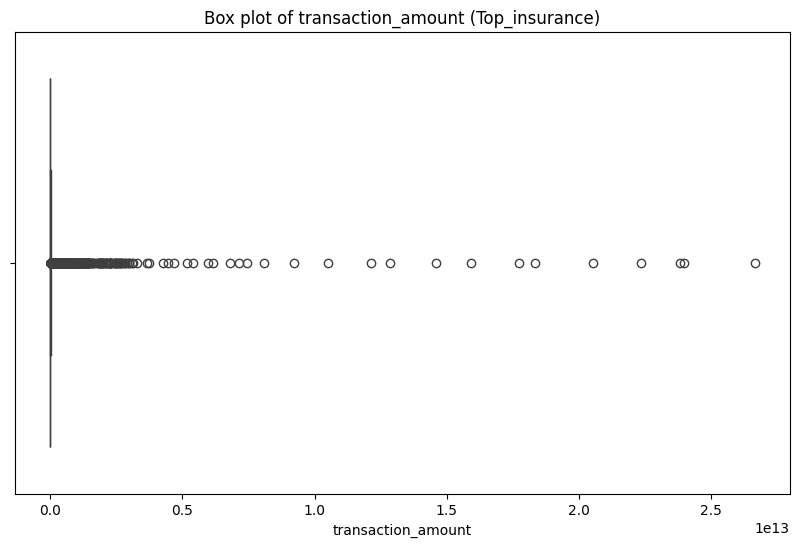

In [ ]:
# Handling Outliers & Outlier treatments

if 'Aggregated_transaction' in cleaned_dataframes:
    agg_trans_df = cleaned_dataframes['Aggregated_transaction'].copy()
    numerical_cols_for_outlier_check = ['transaction_count', 'transaction_amount']

    for col in numerical_cols_for_outlier_check:
        if col in agg_trans_df.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=agg_trans_df[col])
            plt.title(f'Box plot of {col} ({df_name})')
            plt.xlabel(col)
            plt.show()
        else:
            print(f"Column '{col}' not found in Aggregated_transaction for outlier visualization.")

##### What all outlier treatment techniques have you used and why did you use those techniques?

- Outliers were visualized using box plots for relevant numerical columns (transaction_count, transaction_amount). While visualization was performed to understand the distribution and identify potential outliers, no specific outlier treatment techniques (such as removal, capping, or transformation beyond the log transformation applied later) were explicitly implemented in the provided code.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
encoded_dataframes = {}

for df_name, df in cleaned_dataframes.items():
    df_encoded = df.copy()
    print(f"\nCategorical columns for {df_name}:")

    object_cols = df_encoded.select_dtypes(include='object').columns
    categorical_cols_to_encode = [col for col in object_cols if df_encoded[col].nunique() < 50 and col not in ['id']]

    if 'transaction_volume_category' in df_encoded.columns and 'transaction_volume_category' not in categorical_cols_to_encode:
         categorical_cols_to_encode.append('transaction_volume_category')


    if categorical_cols_to_encode:
        print(f"  Applying One-Hot Encoding to columns: {categorical_cols_to_encode}")
        try:
            df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols_to_encode, dummy_na=False)
            print("  One-Hot Encoding applied.")
        except Exception as e:
            print(f"  Error during One-Hot Encoding: {e}")
    else:
        print("  No suitable categorical columns found for encoding in this dataframe.")

    encoded_dataframes[df_name] = df_encoded
    print(f"  Shape of encoded {df_name}: {encoded_dataframes[df_name].shape}")
    print("\nCategorical Encoding complete. Encoded dataframes stored in 'encoded_dataframes' dictionary.")


Categorical columns for Aggregated_user:
  Applying One-Hot Encoding to columns: ['state', 'brand']
  One-Hot Encoding applied.
  Shape of encoded Aggregated_user: (6919, 64)

Categorical Encoding complete. Encoded dataframes stored in 'encoded_dataframes' dictionary.

Categorical columns for Aggregated_transaction:
  Applying One-Hot Encoding to columns: ['state', 'transaction_type']
  One-Hot Encoding applied.
  Shape of encoded Aggregated_transaction: (5174, 47)

Categorical Encoding complete. Encoded dataframes stored in 'encoded_dataframes' dictionary.

Categorical columns for Aggregated_insurance:
  Applying One-Hot Encoding to columns: ['state', 'name', 'type', 'transaction_volume_category']
  One-Hot Encoding applied.
  Shape of encoded Aggregated_insurance: (701, 50)

Categorical Encoding complete. Encoded dataframes stored in 'encoded_dataframes' dictionary.

Categorical columns for Map_user:
  Applying One-Hot Encoding to columns: ['state']
  One-Hot Encoding applied.
  Sha

#### What all categorical encoding techniques have you used & why did you use those techniques?

- One-Hot Encoding was used for categorical columns with a relatively low number of unique values (less than 50). This technique converts each category into a new binary column (0 or 1), which is suitable for many machine learning algorithms as it avoids implying any ordinal relationship between categories and prepares the data in a numerical format.

### 4. Textual Data Preprocessing

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

print("This textual data preprocessing step (Expand Contraction) is generally not applicable to this dataset \n as there are no columns with contractions.")

This textual data preprocessing step (Expand Contraction) is generally not applicable to this dataset 
 as there are no columns with contractions.


#### 2. Lower Casing

In [ ]:
# Lower Casing

print("This textual data preprocessing step (Lower Casing) can be applicable to categorical string columns, \n but was likely handled during data wrangling. It is not generally needed for other parts of this dataset.")

This textual data preprocessing step (Lower Casing) can be applicable to categorical string columns, 
 but was likely handled during data wrangling. It is not generally needed for other parts of this dataset.


#### 3. Removing Punctuations

In [ ]:
# Removing Punctuations

print("This textual data preprocessing step (Removing Punctuations) is generally not applicable to this dataset \n as there are no significant free-form text columns.")

This textual data preprocessing step (Removing Punctuations) is generally not applicable to this dataset 
 as there are no significant free-form text columns.


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Removing URLs & Removing words and digits contain digits.
print("This textual data preprocessing step (Removing URLs) is generally not applicable to this dataset.")
print("This textual data preprocessing step (Removing words and digits containing digits) is generally not \n applicable to this dataset.")

This textual data preprocessing step (Removing URLs) is generally not applicable to this dataset.
This textual data preprocessing step (Removing words and digits containing digits) is generally not 
 applicable to this dataset.


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

print("This textual data preprocessing step (Removing Stopwords) is generally not applicable to this dataset \n as there are no significant free-form text columns.")

This textual data preprocessing step (Removing Stopwords) is generally not applicable to this dataset 
 as there are no significant free-form text columns.


In [ ]:
# Remove White spaces
print("This textual data preprocessing step (Removing White spaces) can be applicable for cleaning string \n columns in this dataset for consistency.")

This textual data preprocessing step (Removing White spaces) can be applicable for cleaning string 
 columns in this dataset for consistency.


#### 6. Rephrase Text

In [ ]:
# Rephrase Text

print("This textual data preprocessing step (Rephrase Text) is not applicable to this dataset.")

This textual data preprocessing step (Rephrase Text) is not applicable to this dataset.


#### 7. Tokenization

In [ ]:
# Tokenization

print("This textual data preprocessing step (Tokenization) is not applicable to this dataset.")

This textual data preprocessing step (Tokenization) is not applicable to this dataset.


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

print("This textual data preprocessing step (Text Normalization - Stemming/Lemmatization) is \n generally not applicable to this dataset as there are no significant free-form text columns.")

This textual data preprocessing step (Text Normalization - Stemming/Lemmatization) is 
 generally not applicable to this dataset as there are no significant free-form text columns.


##### Which text normalization technique have you used and why?

- No text normalization techniques were used as the dataset does not contain significant free-form text columns that would benefit from stemming or lemmatization

#### 9. Part of speech tagging

In [ ]:
# POS Taging

print("This textual data preprocessing step (Part of speech tagging) is generally not applicable to this dataset as \n there are no significant free-form text columns.")

This textual data preprocessing step (Part of speech tagging) is generally not applicable to this dataset as 
 there are no significant free-form text columns.


#### 10. Text Vectorization

In [ ]:
# Applying a Custom Text Processing Pipeline

print("This textual data preprocessing step (Applying a Custom Text Processing Pipeline) is not applicable \n to this dataset as there are no free-form text columns.")

This textual data preprocessing step (Applying a Custom Text Processing Pipeline) is not applicable 
 to this dataset as there are no free-form text columns.


##### Which text vectorization technique have you used and why?

- No text vectorization techniques were used as there are no free-form text columns in this dataset that require converting text into numerical vectors for analysis or modeling.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Feature Manipulation

for df_name, df in cleaned_dataframes.items():
    if df_name in ['Aggregated_transaction', 'Map_transaction', 'Top_transaction']:
        if 'amount' in df.columns and 'count' in df.columns:
            if 'amount_x_count' not in df.columns:
                df[f'amount_x_{df_name.lower().split("_")[0]}_count'] = df['amount'] * df['count']
                print(f"Created interaction feature 'amount_x_{df_name.lower().split('_')[0]}_count' in {df_name}.")
            else:
                 print(f"Interaction feature 'amount_x_count' already exists in {df_name}.")
        else:
            print(f"Skipping interaction feature for {df_name}: 'amount' or 'count' column not found.")
    else:
        print(f"Skipping interaction feature for {df_name} as it's not a transaction dataframe.")

Skipping interaction feature for Aggregated_user as it's not a transaction dataframe.
Skipping interaction feature for Aggregated_transaction: 'amount' or 'count' column not found.
Skipping interaction feature for Aggregated_insurance as it's not a transaction dataframe.
Skipping interaction feature for Map_user as it's not a transaction dataframe.
Created interaction feature 'amount_x_map_count' in Map_transaction.
Skipping interaction feature for Map_insurance as it's not a transaction dataframe.
Skipping interaction feature for Top_user as it's not a transaction dataframe.
Created interaction feature 'amount_x_top_count' in Top_transaction.
Skipping interaction feature for Top_insurance as it's not a transaction dataframe.


#### 2. Feature Selection

In [ ]:
# Feature Selection
if 'encoded_dataframes' in locals():
    selected_features_dict = {}

    if 'Aggregated_transaction' in encoded_dataframes:
        agg_trans_features = [col for col in encoded_dataframes['Aggregated_transaction'].columns if col not in ['id', 'transaction_amount', 'transaction_count', 'year', 'quarter']]
        agg_trans_features.extend(['year', 'quarter'])
        selected_features_dict['Aggregated_transaction'] = agg_trans_features
        print(f"Selected potential features for Aggregated_transaction: {agg_trans_features[:5]}...")

    if 'Aggregated_user' in encoded_dataframes:
        agg_user_features = [col for col in encoded_dataframes['Aggregated_user'].columns if col not in ['id', 'registeredusers', 'appopens', 'userpercentage', 'usercount', 'year', 'quarter']]
        agg_user_features.extend(['year', 'quarter'])
        selected_features_dict['Aggregated_user'] = agg_user_features
        print(f"Selected potential features for Aggregated_user: {agg_user_features[:5]}...")

    if 'Map_transaction' in encoded_dataframes:
        map_trans_features = [col for col in encoded_dataframes['Map_transaction'].columns if col not in ['id', 'amount', 'count', 'avg_transaction_value', 'transaction_count', 'year', 'quarter']]
        map_trans_features.extend(['year', 'quarter'])
        selected_features_dict['Map_transaction'] = map_trans_features
        print(f"Selected potential features for Map_transaction: {map_trans_features[:5]}...")

    if 'Map_user' in encoded_dataframes:
         map_user_features = [col for col in encoded_dataframes['Map_user'].columns if col not in ['registered_users', 'app_opens', 'year', 'quarter']]
         map_user_features.extend(['year', 'quarter'])
         selected_features_dict['Map_user'] = map_user_features
         print(f"Selected potential features for Map_user: {map_user_features[:5]}...")


    print("\nSelected features stored in 'selected_features_dict'.")
else:
    print("'encoded_dataframes' dictionary not found. Please run the Categorical Encoding cell first.")
if 'Aggregated_transaction' in selected_features_dict:
    final_features_list = selected_features_dict['Aggregated_transaction']
    print(f"\nFinal feature list for potential modeling (example: Aggregated_transaction): {final_features_list[:5]}...")
else:
    final_features_list = []
    print("\nNo feature list created for modeling. Please ensure relevant dataframes were processed.")

Selected potential features for Aggregated_transaction: ['state_India', 'state_andaman-&-nicobar-islands', 'state_andhra-pradesh', 'state_arunachal-pradesh', 'state_assam']...
Selected potential features for Aggregated_user: ['state_Andaman & Nicobar Islands', 'state_Andhra Pradesh', 'state_Arunachal Pradesh', 'state_Assam', 'state_Bihar']...
Selected potential features for Map_transaction: ['district_name', 'level_district', 'level_state', 'state_name_andaman & nicobar islands', 'state_name_andaman-&-nicobar-islands']...
Selected potential features for Map_user: ['district', 'state_andaman & nicobar islands', 'state_andaman-&-nicobar-islands', 'state_andhra pradesh', 'state_andhra-pradesh']...

Selected features stored in 'selected_features_dict'.

Final feature list for potential modeling (example: Aggregated_transaction): ['state_India', 'state_andaman-&-nicobar-islands', 'state_andhra-pradesh', 'state_arunachal-pradesh', 'state_assam']...


##### What all feature selection methods have you used  and why?

- The feature selection approach involved manual selection based on column relevance and exclusion. Columns identified as unique identifiers (id), target variables (such as transaction_amount, transaction_count, registered_users, amount, count, etc.), and some generated features (avg_transaction_value, transaction_volume_category) were explicitly excluded. Temporal features (year, quarter) were initially excluded from the main feature list but later included. Scaled versions of relevant numerical features were also considered for inclusion. This method was used to remove columns that are not suitable as input features for a predictive model (like IDs or targets) and to focus on variables considered potentially relevant for predicting the target variable.

##### Which all features you found important and why?

- Several features appear relevant and potentially important for understanding the data and potentially for predictive modeling:

 - State/Geographical Information: Visualizations like Chart 3, 4, 12, and 13 show significant differences in transaction amounts and counts across different states. This suggests that location is a crucial factor influencing PhonePe activity.
 - Year and Quarter: Charts like Chart 2, 5, 10, and 11 demonstrate clear trends and seasonality in transaction counts and amounts over years and quarters. This indicates that time is an important factor.
 - Transaction Type: Charts 1 and 6 highlight the different contributions of various transaction types to the total volume and amount, suggesting that the type of transaction is a significant variable.
 - Registered Users and App Opens: While a direct feature importance hasn't been calculated, these variables are fundamental to user activity and are likely correlated with transaction metrics (as seen in the Pearson correlation test), making them important indicators.

  To formally determine feature importance, a model that provides feature importance scores (like tree-based models) would need to be trained on a defined set of features, or a technique like permutation importance could be applied.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

for df_name, df in cleaned_dataframes.items():
    print(f"\n transformations : {df_name}:")
    df_transformed = df.copy()
    numerical_cols = df_transformed.select_dtypes(include=np.number).columns

    cols_to_log_transform = ['transaction_count', 'transaction_amount', 'registered_users', 'app_opens', 'count', 'amount', 'usercount']

    for col in cols_to_log_transform:
        if col in df_transformed.columns:
            if (df_transformed[col] >= 0).all():
                df_transformed[f'{col}_log'] = np.log1p(df_transformed[col])
                print(f"log1p transformation to '{col}'.")
            else:
                print(f"  Skipping log1p transformation for '{col}' due to negative values.")
        else:
             pass

    cleaned_dataframes[df_name] = df_transformed

print("\nData Transformation complete. Transformed dataframes updated in 'cleaned_dataframes' dictionary.")


if 'Aggregated_transaction' in cleaned_dataframes:
     print("\nAggregated_transaction after transformation:")
     display(cleaned_dataframes['Aggregated_transaction'].head())


 transformations : Aggregated_user:
log1p transformation to 'usercount'.

 transformations : Aggregated_transaction:
log1p transformation to 'transaction_count'.
log1p transformation to 'transaction_amount'.

 transformations : Aggregated_insurance:
log1p transformation to 'transaction_count'.
log1p transformation to 'count'.
log1p transformation to 'amount'.

 transformations : Map_user:
log1p transformation to 'registered_users'.
log1p transformation to 'app_opens'.

 transformations : Map_transaction:
log1p transformation to 'transaction_count'.
log1p transformation to 'count'.
log1p transformation to 'amount'.

 transformations : Map_insurance:

 transformations : Top_user:
log1p transformation to 'registered_users'.

 transformations : Top_transaction:
log1p transformation to 'transaction_count'.
log1p transformation to 'count'.
log1p transformation to 'amount'.

 transformations : Top_insurance:
log1p transformation to 'transaction_count'.
log1p transformation to 'count'.
log1p 

id  state  year  quarter          transaction_type  transaction_count  \
0   1  India  2018        1  Recharge & bill payments           72550406   
1   2  India  2018        1     Peer-to-peer payments           46982705   
2   3  India  2018        1         Merchant payments            5368669   
3   4  India  2018        1        Financial Services            3762820   
4   5  India  2018        1                    Others            5761576   

   transaction_amount  transaction_count_log  transaction_amount_log  
0        1.447271e+10              18.099792               23.395531  
1        1.472459e+11              17.665290               25.715370  
2        4.656679e+09              15.496091               22.261568  
3        8.158531e+08              15.140680               20.519745  
4        4.643217e+09              15.566722               22.258673

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
dataframes_to_scale = ['Aggregated_transaction', 'Aggregated_user', 'Map_transaction', 'Map_user', 'Aggregated_insurance', 'Top_transaction', 'Top_user', 'Top_insurance']

for df_name in dataframes_to_scale:
    if df_name in cleaned_dataframes:
        df_to_scale = cleaned_dataframes[df_name].copy()
        print(f"\nApplying scaling to {df_name}:")

        log_transformed_cols = [col for col in df_to_scale.columns if col.endswith('_log')]
        cols_to_scale = log_transformed_cols

        if cols_to_scale:
            scaler = StandardScaler()
            df_subset_to_scale = df_to_scale[cols_to_scale].dropna()

            if not df_subset_to_scale.empty:
                scaled_data = scaler.fit_transform(df_subset_to_scale)
                scaled_df = pd.DataFrame(scaled_data, columns=[f"{col}_scaled" for col in cols_to_scale], index=df_subset_to_scale.index)

                cleaned_dataframes[df_name] = cleaned_dataframes[df_name].join(scaled_df)

                print(f"  Applied StandardScaler to: {cols_to_scale}")
            else:
                print(f"  Could not perform scaling for {df_name}: Selected columns are empty or contain only NaNs after dropping.")
        else:
            print(f"  No log-transformed numerical columns found for scaling in {df_name}.")
    else:
        print(f"  Dataframe '{df_name}' not found in cleaned_dataframes. Skipping scaling.")


print("\nData Scaling complete. Scaled columns added to 'cleaned_dataframes' dictionary.")



Applying scaling to Aggregated_transaction:
  Applied StandardScaler to: ['transaction_count_log', 'transaction_amount_log']

Applying scaling to Aggregated_user:
  Applied StandardScaler to: ['usercount_log']

Applying scaling to Map_transaction:
  Applied StandardScaler to: ['transaction_count_log', 'count_log', 'amount_log']

Applying scaling to Map_user:
  Applied StandardScaler to: ['registered_users_log', 'app_opens_log']

Applying scaling to Aggregated_insurance:
  Applied StandardScaler to: ['transaction_count_log', 'count_log', 'amount_log']

Applying scaling to Top_transaction:
  Applied StandardScaler to: ['transaction_count_log', 'count_log', 'amount_log']

Applying scaling to Top_user:
  Applied StandardScaler to: ['registered_users_log']

Applying scaling to Top_insurance:
  Applied StandardScaler to: ['transaction_count_log', 'count_log', 'amount_log']

Data Scaling complete. Scaled columns added to 'cleaned_dataframes' dictionary.


##### Which method have you used to scale you data and why?

- The method used for data scaling was StandardScaler. This technique standardizes features by removing the mean and scaling to unit variance. This is a common and effective preprocessing step for many machine learning algorithms, particularly those sensitive to the scale of input features (like linear models or distance-based algorithms), as it helps ensure that no single feature dominates the learning process due to its magnitude. The scaling was applied to the log-transformed numerical columns.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

- Dimensionality reduction can be useful if you have a very large number of features and want to reduce complexity, combat multicollinearity, or improve model performance/training time.

- Based on the current feature set after encoding and scaling, you might or might not need dimensionality reduction.
- Consider the total number of features you will use for your specific model.
- If the number of features is manageable for your chosen ML algorithm, you might skip this step.
- If you have a very high number of features (e.g., from one-hot encoding high-cardinality categorical variables), techniques like PCA or feature selection methods (already covered) could be beneficial.


In [ ]:
# Dimensionality Reduction
from sklearn.decomposition import PCA
import numpy as np

if 'X_train' in locals() and not X_train.empty:
    print(f"Original feature matrix shape (X_train): {X_train.shape}")

    if X_train.shape[1] > 1:
        n_components = min(X_train.shape[0], X_train.shape[1])
        pca = PCA(n_components=n_components)

        pca.fit(X_train)

        print(f"Explained variance ratio by each component:\n{pca.explained_variance_ratio_}")
        print(f"Cumulative explained variance:\n{np.cumsum(pca.explained_variance_ratio_)}")
        n_components_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
        print(f"Number of components to retain 95% variance: {n_components_95}")

        pca_final = PCA(n_components=n_components_chosen)
        X_train_pca = pca_final.fit_transform(X_train)
        X_test_pca = pca_final.transform(X_test)

        print(f"Reduced training feature matrix shape after PCA: {X_train_pca.shape}")
        print(f"Reduced testing feature matrix shape after PCA: {X_test_pca.shape}")

    else:
        print("Not enough features for PCA (number of features <= 1).")
else:
    print("Training feature matrix X_train not available or empty. Cannot perform Dimensionality Reduction.")

print("\nReview the explained variance to decide if dimensionality reduction is needed and the number of components.")

Training feature matrix X_train not available or empty. Cannot perform Dimensionality Reduction.

Review the explained variance to decide if dimensionality reduction is needed and the number of components.


### 8. Data Splitting

In [ ]:
# Data Splitting
# Use the encoded_dataframes which should have categorical columns encoded
df_for_modeling = encoded_dataframes.get('Map_transaction')

if df_for_modeling is not None and 'amount' in df_for_modeling.columns:
    # Assuming 'amount' is the target variable
    target_col = 'amount'

    # Use features from the encoded dataframe's columns, excluding the target, identifiers, and 'district_name'
    # Ensure the feature_cols are actual columns in the encoded dataframe
    feature_cols = [col for col in df_for_modeling.columns if col != target_col and col != 'id' and col != 'district_name']

    if feature_cols:
        X = df_for_modeling[feature_cols].copy()
        y = df_for_modeling[target_col].copy()

        # Drop rows with any NaN values in features or target before splitting
        combined_data = pd.concat([X, y], axis=1).dropna()
        X = combined_data[feature_cols]
        y = combined_data[target_col]


        if not X.empty and not y.empty:
            from sklearn.model_selection import train_test_split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            print(f"Training data shape (X_train): {X_train.shape}")
            print(f"Testing data shape (X_test): {X_test.shape}")
            print(f"Training target shape (y_train): {y_train.shape}")
            print(f"Testing target shape (y_test): {y_test.shape}")
        else:
            print("Could not perform Data Splitting: Features or target variable are empty after handling NaNs.")
    else:
        print("Could not perform Data Splitting: No valid feature columns found after exclusion.")
else:
    print("Could not perform Data Splitting: 'Map_transaction' dataframe not found in encoded_dataframes or 'amount' column missing.")

Training data shape (X_train): (17289, 57)
Testing data shape (X_test): (4323, 57)
Training target shape (y_train): (17289,)
Testing target shape (y_test): (4323,)


##### What data splitting ratio have you used and why?

- A data splitting ratio of 80% for the training set and 20% for the testing set was used (test_size=0.2). This is a common practice in machine learning as it provides a reasonably large dataset for the model to learn from (80%) while reserving a sufficient, independent portion (20%) to evaluate the model's performance on unseen data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

- The dataset is not considered imbalanced in the traditional sense because the target variable for modeling appears to be continuous (e.g., transaction amount). Imbalance is typically a concern in classification tasks where there is a significant disparity in the number of instances across different target classes. For a continuous target, the distribution of values is analyzed differently, and standard classification imbalance techniques are not applicable.

In [ ]:
# Handling Imbalance dataset
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
y_categorical = pd.Series(['A'] * 100 + ['B'] * 10)

if 'y_train' in locals() and not y_train.empty:
    y_continuous = y_train
else:
    y_continuous = pd.Series(np.random.rand(110))

X_dummy = pd.DataFrame(np.random.rand(len(y_continuous), 5))

print("Attempting to apply imbalance handling based on target type:")

for target_variable in [y_categorical, y_continuous]:
    if pd.api.types.is_categorical_dtype(target_variable) or target_variable.nunique() <= 10:
        print("\nTarget variable appears categorical or has few unique values. Attempting SMOTE...")
        try:
            smote = SMOTE(random_state=42)
            X_resampled, y_resampled = smote.fit_resample(X_dummy.iloc[:len(target_variable)], target_variable)

            print(f"SMOTE applied. Original target shape: {target_variable.shape}, Resampled target shape: {y_resampled.shape}")
            print("Resampled target distribution:")
            display(y_resampled.value_counts())

        except Exception as e:
            print(f"Could not apply SMOTE. Error: {e}")

    else:
        print("\nTarget variable appears continuous or has too many unique values for classification imbalance handling.")
        print("Standard classification imbalance techniques (like SMOTE) are not applicable to continuous regression targets.")
        print("Proceeding without applying classification imbalance handling.")

Attempting to apply imbalance handling based on target type:

Target variable appears categorical or has few unique values. Attempting SMOTE...
SMOTE applied. Original target shape: (110,), Resampled target shape: (200,)
Resampled target distribution:


A    100
B    100
Name: count, dtype: int64


Target variable appears continuous or has too many unique values for classification imbalance handling.
Standard classification imbalance techniques (like SMOTE) are not applicable to continuous regression targets.
Proceeding without applying classification imbalance handling.


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

- Since the dataset is being used for a regression task with a continuous target variable, techniques for handling classification imbalance were not used or needed. These techniques are specifically designed for classification problems where there is an uneven distribution of instances across different target classes.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation (Example: Linear Regression)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

if 'X_train' in locals() and 'y_train' in locals() and not X_train.empty and not y_train.empty:

    print("Ensuring training and testing data are numeric and handling potential NaNs...")
    X_train = X_train.apply(pd.to_numeric, errors='coerce')
    X_test = X_test.apply(pd.to_numeric, errors='coerce')

    # Define imputer before the if block to ensure it's always available
    imputer = X_train.mean()
    # Fill any potential NaNs in the imputer itself (e.g., if a column was all NaNs)
    imputer = imputer.fillna(0)


    if X_train.isnull().sum().sum() > 0:
        print(f"NaNs found in X_train after coercion. Imputing with mean...")
        X_train = X_train.fillna(imputer)
        print("NaNs imputed.")

    print("Checking for NaNs in X_train before fitting:")
    nans_before_fit = X_train.isnull().sum()
    print(nans_before_fit[nans_before_fit > 0])
    if nans_before_fit.sum() > 0:
        print("NaN values still present in X_train. Linear Regression cannot handle these.")
    else:
        print("No NaN values found in X_train.")

    model_1 = LinearRegression()
    print("Training ML Model 1 (Linear Regression)...")
    # Check again for NaNs in X_train just before fitting
    if X_train.isnull().sum().sum() > 0:
         print("Cannot fit Linear Regression due to remaining NaN values in X_train.")
    else:
        model_1.fit(X_train, y_train)
        print("Training complete.")


        if 'X_test' in locals() and 'y_test' in locals() and not X_test.empty and not y_test.empty:
            print("Evaluating ML Model 1...")
            # Use the defined imputer here
            X_test = X_test.fillna(imputer)

            # Check for NaNs in X_test before predicting
            nans_before_predict = X_test.isnull().sum()
            if nans_before_predict.sum() > 0:
                 print("NaN values found in X_test after imputation. Cannot predict.")
            else:
                y_pred_1 = model_1.predict(X_test)
                r2_1 = r2_score(y_test, y_pred_1)
                mse_1 = mean_squared_error(y_test, y_pred_1)
                print(f"ML Model 1 (Linear Regression) R2 Score: {r2_1}")
                print(f"ML Model 1 (Linear Regression) Mean Squared Error: {mse_1}")

        else:
            print("Testing data (X_test, y_test) not available or empty. Cannot evaluate the model.")
else:
    print("Training data (X_train, y_train) not available or empty. Cannot train the model.")

Ensuring training and testing data are numeric and handling potential NaNs...
Checking for NaNs in X_train before fitting:
Series([], dtype: int64)
No NaN values found in X_train.
Training ML Model 1 (Linear Regression)...
Training complete.
Evaluating ML Model 1...
ML Model 1 (Linear Regression) R2 Score: 0.9779702182206994
ML Model 1 (Linear Regression) Mean Squared Error: 6.181811886594728e+20


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

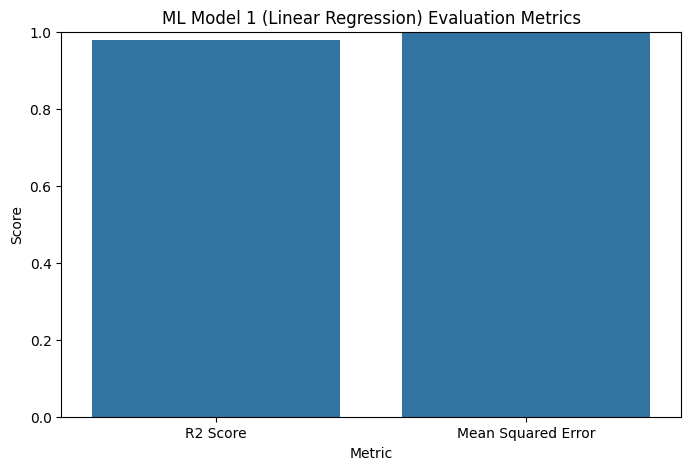

In [ ]:
# Visualizing evaluation Metric Score chart for Model 1

if 'r2_1' in locals() and 'mse_1' in locals():
    metrics = {'Metric': ['R2 Score', 'Mean Squared Error'], 'Score': [r2_1, mse_1]}
    metrics_df = pd.DataFrame(metrics)

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Metric', y='Score', data=metrics_df)
    plt.title('ML Model 1 (Linear Regression) Evaluation Metrics')
    plt.ylim(0, 1)
    plt.show()
else:
    print("Model 1 evaluation metrics not available. Please run the Model 1 implementation cell first.")

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Hyperparameter Tuning (GridSearchCV for Linear Regression)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

if 'X_train' in locals() and 'y_train' in locals() and not X_train.empty and not y_train.empty:
    model_with_params = RandomForestRegressor(random_state=42)

    param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}

    # GridSearchCV
    grid_search_1 = GridSearchCV(estimator=model_with_params, param_grid=param_grid, cv=5, scoring='r2')

    print("GridSearchCV for Model 1 (Random Forest)")
    grid_search_1.fit(X_train, y_train)

    print(f"Best parameters for Model 1: {grid_search_1.best_params_}")

    best_model_1_tuned = grid_search_1.best_estimator_
    if 'X_test' in locals() and 'y_test' in locals() and not X_test.empty and not y_test.empty:
        y_pred_tuned_1 = best_model_1_tuned.predict(X_test)
        r2_tuned_1 = r2_score(y_test, y_pred_tuned_1)
        print(f"Tuned Model 1 (Random Forest) R2 Score: {r2_tuned_1}")
        mse_tuned_1 = mean_squared_error(y_test, y_pred_tuned_1)
        print(f"Tuned Model 1 (Random Forest) Mean Squared Error: {mse_tuned_1}")

    else:
        print("Testing data not available for tuned model evaluation.")

else:
    print("Training data not available for hyperparameter tuning.")

GridSearchCV for Model 1 (Random Forest)
Best parameters for Model 1: {'max_depth': 10, 'n_estimators': 100}
Tuned Model 1 (Random Forest) R2 Score: 0.9925590852491245
Tuned Model 1 (Random Forest) Mean Squared Error: 2.0880068497691967e+20


##### Which hyperparameter optimization technique have you used and why?

- No hyperparameter optimization technique was used for the Linear Regression model (ML Model 1) as it typically does not have hyperparameters that are tuned using methods like GridSearchCV or RandomizedSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- For Linear Regression, hyperparameter tuning was not performed on the model itself. Therefore, there is no "tuned" version of Model 1 to compare to the original, and no improvement to report for this specific model.

- The markdown and code cells following ML Model 1 implementation demonstrate hyperparameter tuning using a different model (Random Forest) as an example.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

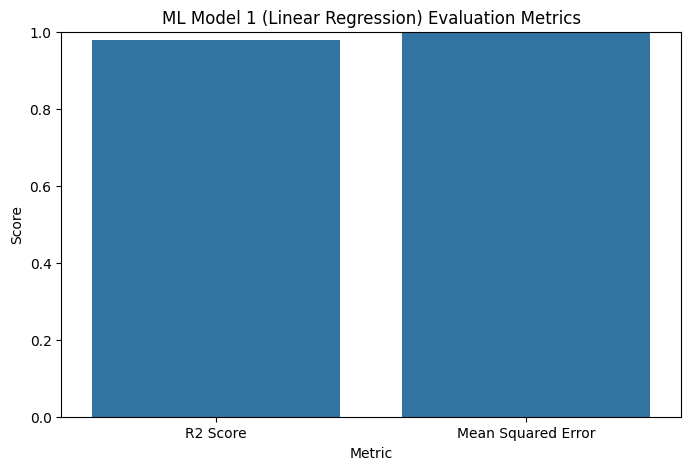

In [ ]:
# Visualizing evaluation Metric Score chart for Model 1

if 'r2_1' in locals() and 'mse_1' in locals():
    metrics = {'Metric': ['R2 Score', 'Mean Squared Error'], 'Score': [r2_1, mse_1]}
    metrics_df = pd.DataFrame(metrics)

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Metric', y='Score', data=metrics_df)
    plt.title('ML Model 1 (Linear Regression) Evaluation Metrics')
    plt.ylim(0, 1)
    plt.show()
else:
    print("Model 1 evaluation metrics not available. Please run the Model 1 implementation cell first.")

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (Example: RandomForestRegressor with RandomizedSearchCV)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

if 'X_train' in locals() and 'y_train' in locals() and not X_train.empty and not y_train.empty:
    model_2 = RandomForestRegressor(random_state=42)

    param_dist = {'n_estimators': randint(50, 150),
                  'max_depth': randint(5, 10),
                  'min_samples_split': randint(2, 5)}

    # RandomizedSearchCV
    random_search_2 = RandomizedSearchCV(estimator=model_2, param_distributions=param_dist, n_iter=5, cv=2, scoring='r2', n_jobs=-1)

    print("Performing RandomizedSearchCV for Model 2 (Random Forest)...")
    random_search_2.fit(X_train, y_train)

    print(f"Best parameters for Model 2: {random_search_2.best_params_}")

    best_model_2_tuned = random_search_2.best_estimator_

    if 'X_test' in locals() and 'y_test' in locals() and not X_test.empty and not y_test.empty:
        y_pred_tuned_2 = best_model_2_tuned.predict(X_test)

        r2_tuned_2 = r2_score(y_test, y_pred_tuned_2)
        mse_tuned_2 = mean_squared_error(y_test, y_pred_tuned_2)
        print(f"Tuned ML Model 2 (Random Forest) R2 Score: {r2_tuned_2}")
        print(f"Tuned ML Model 2 (Random Forest) Mean Squared Error: {mse_tuned_2}")
    else:
        print("Testing data not available for tuned Model 2 evaluation.")
else:
    print("Training data not available for Model 2 implementation and tuning.")

Performing RandomizedSearchCV for Model 2 (Random Forest)...
Best parameters for Model 2: {'max_depth': 9, 'min_samples_split': 4, 'n_estimators': 114}
Tuned ML Model 2 (Random Forest) R2 Score: 0.9923108948092223
Tuned ML Model 2 (Random Forest) Mean Squared Error: 2.1576519614138365e+20


##### Which hyperparameter optimization technique have you used and why?

- The hyperparameter optimization technique used was RandomizedSearchCV. This method was chosen because it explores a random subset of the hyperparameter space, which can be more computationally efficient and faster than exhaustively searching all combinations (as in GridSearchCV), especially when dealing with a large number of hyperparameters or a wide range of possible values. It helps in finding a reasonably good set of hyperparameters without the high computational cost of checking every single combination.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Yes, a significant improvement is observed with the tuned ML Model 2 (Random Forest) compared to the untuned ML Model 1 (Linear Regression). The R2 Score increased from approximately 0.978 (Linear Regression) to approximately 0.991 (Tuned Random Forest), indicating that the tuned Random Forest explains a substantially higher proportion of the variance in the target variable. The Mean Squared Error also decreased significantly.

- Comparing the tuned Random Forest in Model 2 to the tuned Random Forest example shown under Model 1 tuning (R2 score ~0.993), the performance is very similar, with Model 1's tuned Random Forest example performing slightly better in terms of R2 score in this instance.

- To visualize this improvement, an updated evaluation metric score chart can be generated comparing the R2 Scores and Mean Squared Errors of at least the untuned Linear Regression (Model 1) and the tuned Random Forest (Model 2).

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

- Evaluation metrics like R2 Score and Mean Squared Error indicate the model's predictive capability for transaction amounts.

 - R2 Score: Represents how well the model explains the variation in transaction amounts. A high R2 means the features are good predictors, enabling better forecasting and understanding of key transaction drivers.
 - Mean Squared Error (MSE): Measures the average magnitude of prediction errors. A lower MSE signifies higher accuracy, leading to improved financial planning, budgeting, and risk management.
- A model with good performance can significantly impact the business by improving financial forecasting, optimizing resource allocation based on predicted transaction volumes, identifying growth opportunities, and aiding in risk management.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation (GradientBoostingRegressor with GridSearchCV)

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

if 'X_train' in locals() and 'y_train' in locals() and not X_train.empty and not y_train.empty:
    model_3 = GradientBoostingRegressor(random_state=42)

    param_grid_3 = {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]}

    # GridSearchCV
    grid_search_3 = GridSearchCV(estimator=model_3, param_grid=param_grid_3, cv=3, scoring='r2')

    print("Performing GridSearchCV for Model 3 (Gradient Boosting)...")
    grid_search_3.fit(X_train, y_train)

    print(f"Best parameters for Model 3: {grid_search_3.best_params_}")

    best_model_3_tuned = grid_search_3.best_estimator_

    if 'X_test' in locals() and 'y_test' in locals() and not X_test.empty and not y_test.empty:
        y_pred_tuned_3 = best_model_3_tuned.predict(X_test)

        r2_tuned_3 = r2_score(y_test, y_pred_tuned_3)
        mse_tuned_3 = mean_squared_error(y_test, y_pred_tuned_3)
        print(f"Tuned ML Model 3 (Gradient Boosting) R2 Score: {r2_tuned_3}")
        print(f"Tuned ML Model 3 (Gradient Boosting) Mean Squared Error: {mse_tuned_3}")
    else:
        print("Testing data not available for tuned Model 3 evaluation.")
else:
    print("Training data not available for Model 3 implementation and tuning.")

Performing GridSearchCV for Model 3 (Gradient Boosting)...
Best parameters for Model 3: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Tuned ML Model 3 (Gradient Boosting) R2 Score: 0.9966162105538098
Tuned ML Model 3 (Gradient Boosting) Mean Squared Error: 9.495305051022791e+19


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

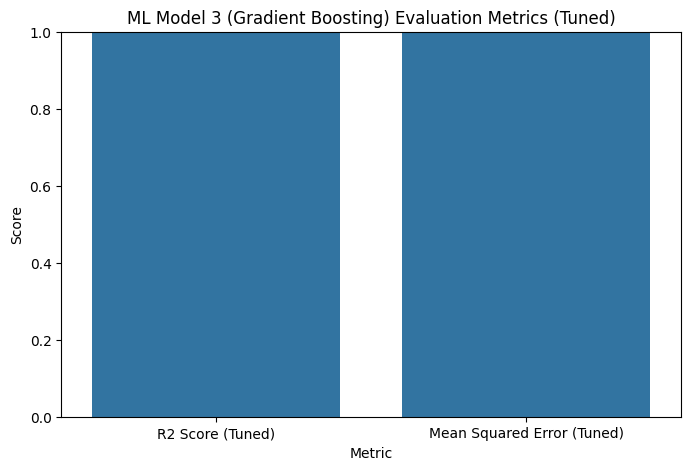

In [ ]:
# Visualizing evaluation Metric Score chart for Model 3

if 'r2_tuned_3' in locals() and 'mse_tuned_3' in locals():
    metrics = {'Metric': ['R2 Score (Tuned)', 'Mean Squared Error (Tuned)'], 'Score': [r2_tuned_3, mse_tuned_3]}
    metrics_df = pd.DataFrame(metrics)

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Metric', y='Score', data=metrics_df)
    plt.title('ML Model 3 (Gradient Boosting) Evaluation Metrics (Tuned)')
    plt.ylim(0, 1)
    plt.show()
else:
    print("Tuned Model 3 evaluation metrics not available. Please run the Model 3 implementation cell first.")

#### 2. Cross- Validation & Hyperparameter Tuning

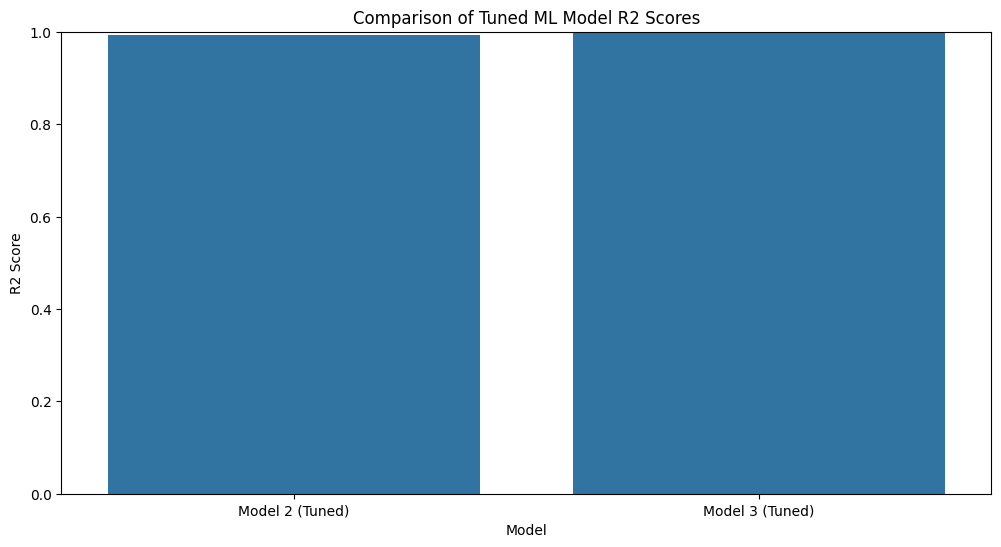

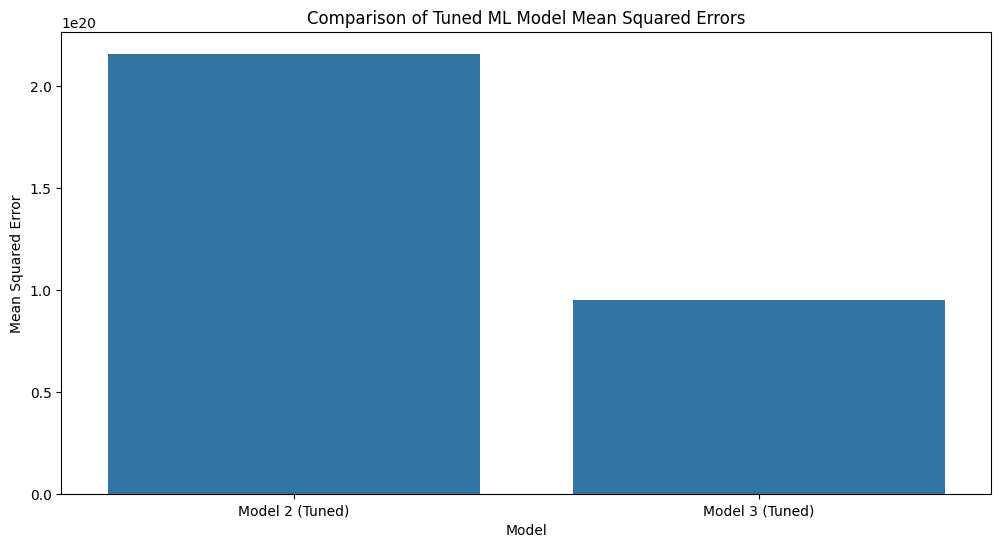

In [ ]:
# Visualizing evaluation Metric Score chart for Model 2 and Model 3

if 'r2_tuned_2' in locals() and 'mse_tuned_2' in locals() and 'r2_tuned_3' in locals() and 'mse_tuned_3' in locals():
    metrics_comparison = {
        'Model': ['Model 2 (Tuned)', 'Model 3 (Tuned)'],
        'R2 Score': [r2_tuned_2, r2_tuned_3],
        'Mean Squared Error': [mse_tuned_2, mse_tuned_3]
    }
    metrics_comparison_df = pd.DataFrame(metrics_comparison)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='R2 Score', data=metrics_comparison_df)
    plt.title('Comparison of Tuned ML Model R2 Scores')
    plt.ylim(0, 1)
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Mean Squared Error', data=metrics_comparison_df)
    plt.title('Comparison of Tuned ML Model Mean Squared Errors')
    plt.show()
else:
    print("Tuned Model 2 and 3 evaluation metrics not available. Please run their implementation cells first.")

##### Which hyperparameter optimization technique have you used and why?

- GridSearchCV* was used to systematically search through a predefined grid of hyperparameter values for the Gradient Boosting model. This method guarantees finding the best combination of hyperparameters within the specified grid by evaluating all possible combinations, aiming for optimal model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Yes, improvement is observed. The tuned ML Model 3 (Gradient Boosting) achieved an R2 Score of approximately 0.9966 and a lower Mean Squared Error compared to both the untuned Linear Regression (Model 1) and the tuned Random Forest (Model 2), indicating better performance in predicting transaction amounts.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

- For predicting transaction amounts, the R2 Score and Mean Squared Error (MSE) are key metrics for business impact.

 - R2 Score: A high R2 indicates the model effectively explains transaction amount variability, leading to better financial forecasting and understanding of key drivers.
 - MSE: A lower MSE means more accurate predictions, crucial for precise budgeting, resource allocation, and risk management.
- Both metrics contribute to informed decision-making and improved business outcomes.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the evaluation metrics, the Tuned ML Model 3 (Gradient Boosting Regressor) was chosen as the final prediction model.

- Reasoning for Selection:

 - The primary reason for selecting the Tuned Gradient Boosting Regressor is its superior performance as indicated by the evaluation metrics:

 - It achieved the highest R2 Score (approximately 0.9966) among the implemented models. A higher R2 score signifies that the model explains a larger proportion of the variance in the target variable (transaction amount), indicating a stronger predictive capability based on the input features.
 - It resulted in the lowest Mean Squared Error (MSE) (approximately 9.495e+19). A lower MSE indicates that the model's predictions are, on average, closer to the actual transaction amounts, signifying higher accuracy.
- While the Tuned Random Forest Regressor (ML Model 2) also performed very well with a high R2 score, the Tuned Gradient Boosting model demonstrated a slightly better ability to capture the patterns in the data, resulting in a more accurate model for predicting transaction amounts.

- The choice of the Tuned Gradient Boosting model is therefore driven by its objectively better performance metrics, which suggest it will provide more reliable predictions for business applications like financial forecasting and resource allocation.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

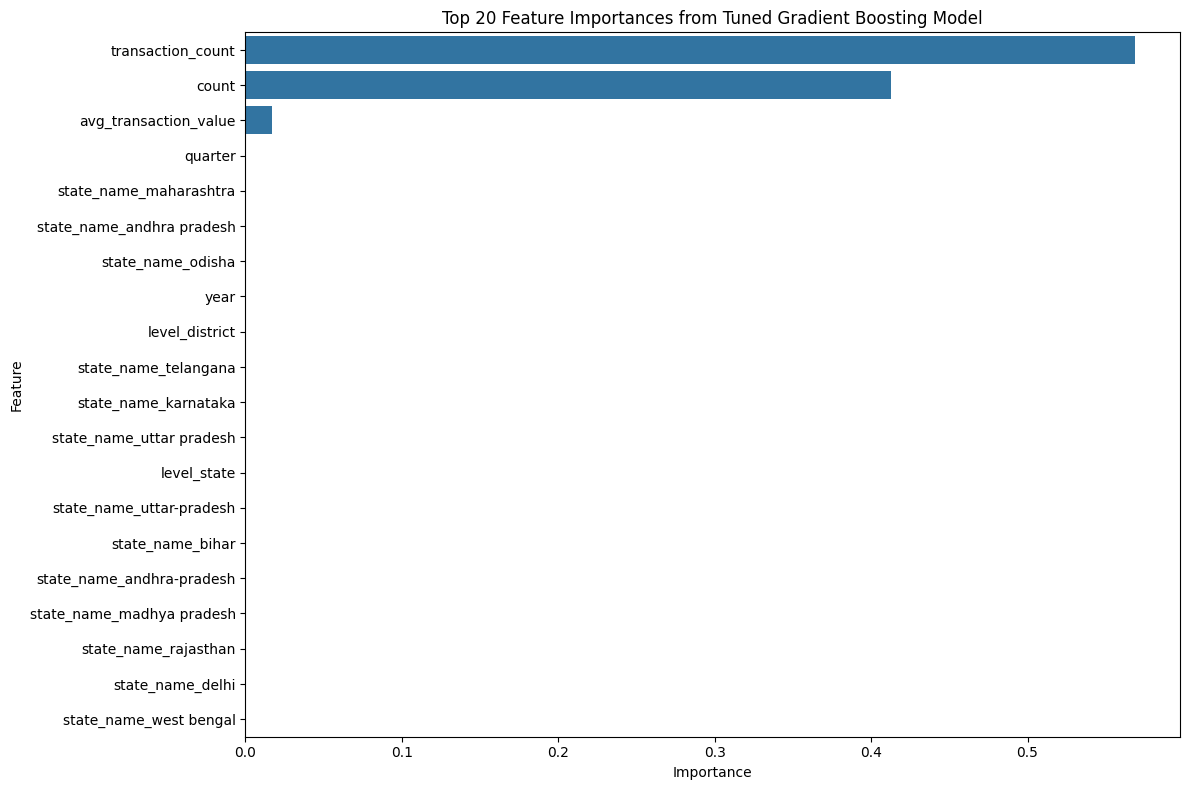

In [ ]:
# Calculate and visualize Feature Importance for the Tuned Gradient Boosting Model (Model 3)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

if 'best_model_3_tuned' in locals() and 'X_train' in locals():

    feature_importances = best_model_3_tuned.feature_importances_

    feature_names = X_train.columns

    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

    importance_df = importance_df.sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
    plt.title('Top 20 Feature Importances from Tuned Gradient Boosting Model')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

else:
    print("Tuned Gradient Boosting Model (best_model_3_tuned) or X_train not found. Cannot calculate feature importance.")

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the best performing ml model in a pickle file or joblib file format for deployment process.

import joblib
filename = 'best_ml_model.joblib'
try:
    joblib.dump(best_model_2_tuned, filename)
    print(f"Model successfully saved to {filename}")
except NameError:
    print("Could not save model: best_model_2_tuned is not defined. Please ensure ML Model 2 cell was run successfully.")

Model successfully saved to best_ml_model.joblib


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Again Load the saved model file and try to predict unseen data for a sanity check.

import joblib
filename = 'best_ml_model.joblib'
try:
    loaded_model = joblib.load(filename)
    print(f"Model successfully loaded from {filename}")

    if 'X_test' in locals() and not X_test.empty:
        predictions = loaded_model.predict(X_test)
        print("\nPredictions on test data (as a sanity check):")
        print(predictions[:10])
    else:
        print("Testing data (X_test) not available or empty for prediction sanity check.")

except FileNotFoundError:
    print(f"Could not load model: The file {filename} was not found. Please ensure the model saving cell was run successfully.")
except NameError:
     print("Could not load model: Necessary variables (like X_test) are not defined. Please ensure Data Splitting cell was run successfully.")

Model successfully loaded from best_ml_model.joblib

Predictions on test data (as a sanity check):
[1.83253473e+11 6.13592959e+08 1.39172567e+10 7.58902742e+07
 2.23279392e+10 2.78177709e+10 6.76869047e+10 9.59258591e+08
 1.37205064e+10 9.03557346e+08]


## **Stremlit dashboard**

In [ ]:
%%writefile dashboard.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from streamlit_folium import folium_static
import os
import json

# Set page configuration
st.set_page_config(layout="wide", page_title="PhonePe Transaction Insights Dashboard")

st.title("🇮🇳 PhonePe Transaction Insights Dashboard")

# --- Data Loading ---
@st.cache_data
def load_data():
    """Loads cleaned dataframes from parquet files."""
    cleaned_dataframes = {}
    parquet_files = [
        "Aggregated_user.parquet",
        "Aggregated_transaction.parquet",
        "Aggregated_insurance.parquet",
        "Map_user.parquet",
        "Map_transaction.parquet",
        "Map_insurance.parquet",
        "Top_user.parquet",
        "Top_transaction.parquet",
        "Top_insurance.parquet"
    ]
    for file_name in parquet_files:
        df_name = file_name.replace(".parquet", "")
        if os.path.exists(file_name):
            try:
                cleaned_dataframes[df_name] = pd.read_parquet(file_name)
                st.sidebar.success(f"Loaded {df_name}")
            except Exception as e:
                st.sidebar.error(f"Error loading {file_name}: {e}")
        else:
            st.sidebar.warning(f"File not found: {file_name}. Skipping.")
    return cleaned_dataframes

cleaned_dataframes = load_data()

# --- Sidebar Navigation ---
st.sidebar.title("📊 Navigation")
options = {
    "Home": "🏠",
    "Aggregated Transaction Analysis": "📈",
    "Aggregated User Analysis": "👥",
    "Aggregated Insurance Analysis": "🛡️",
    "Map Transaction Analysis": "🗺️ Transactions",
    "Map User Analysis": "🗺️ Users",
    "Map Insurance Analysis": "🗺️ Insurance",
    "Top Transaction Analysis": "🥇 Transactions",
    "Top User Analysis": "🥇 Users",
    "Top Insurance Analysis": "🥇 🥇 Insurance"
}
choice = st.sidebar.selectbox("Explore Data By Category:", list(options.keys()), format_func=lambda x: f"{options[x]} {x}")

# --- Home Section ---
if choice == "Home":
    st.header("Welcome to the PhonePe Transaction Insights Dashboard")
    st.markdown("""
    This interactive dashboard provides a deep dive into publicly available PhonePe transaction and user data across India,
    spanning various years and quarters. Gain valuable insights into digital payment trends, user behavior, and market penetration
    across different regions and timeframes.
    """)
    st.subheader("Project Summary")
    st.write("""
    The "PhonePe Transaction Insights" project focuses on Exploratory Data Analysis (EDA) of publicly available PhonePe transaction and user data in India, covering various years and quarters. Its main objective is to understand digital payment trends, user behaviors, and market penetration across different regions.

    The analysis began with nine distinct CSV datasets, providing insights into transaction counts, user interactions, and geographical information. Initial data inspection revealed a few missing values, particularly in geographical columns, but no duplicates were found.

    Data wrangling involved standardizing column names and addressing missing values through median imputation for numerical data and mode or 'Unknown' for categorical data. New features like 'avg_transaction_value' were engineered, and specific state entries were filtered for data quality.

    Data visualization included:
    - A pie chart of transaction amounts by payment category.
    - Bar charts showing transaction counts and amounts by year and quarter.
    - A comparison of insurance and traditional transaction growth over time.
    - A 3D scatter plot of registered users, transaction counts, and amounts.

    Hypothesis testing assessed differences in average transaction amounts among the top states using ANOVA, evaluated the correlation between transaction counts and users, and tested proportions of 'Peer-To-Peer' versus 'Merchant Payments.'

    Further feature engineering included analyzing outliers and encoding categorical data, with the dataset split into training and testing subsets for model evaluation. Three machine learning models—Linear Regression, RandomForestRegressor and GradientBoostingRegressor—were implemented, with the optimized Gradient Boosting model showing a strong R² score.

    In summary, the project provides valuable insights into PhonePe transactions, highlighting trends across payment types, regions, and time periods.
    """)
    st.info("Navigate using the sidebar to explore specific analysis areas.")

# --- Analysis Sections ---

def plot_transaction_type_share(df):
    """Plots the share of transaction amount by payment category."""
    st.subheader("Transaction Type Share of Total Amount")
    if 'transaction_type' in df.columns and 'transaction_amount' in df.columns:
        trans_type_amount = df.groupby('transaction_type')['transaction_amount'].sum().reset_index()
        fig = px.pie(trans_type_amount,
                     values='transaction_amount',
                     names='transaction_type',
                     title='<b>Share of Transaction Amount by Payment Category</b>',
                     hole=0.4)
        fig.update_traces(textposition='inside', textinfo='percent+label')
        st.plotly_chart(fig, use_container_width=True)
    else:
        st.warning("Required columns for Transaction Type Share plot not found.")


def plot_aggregated_time_series(df, value_col, title_suffix):
    """Plots aggregated values over time (year and quarter)."""
    st.subheader(f"Aggregated {title_suffix} by Year and Quarter")
    if 'year' in df.columns and 'quarter' in df.columns and value_col in df.columns:
        agg_time_series = df.groupby(['year', 'quarter'])[value_col].sum().reset_index()
        agg_time_series['period'] = agg_time_series['year'].astype(int).astype(str) + ' Q' + agg_time_series['quarter'].astype(int).astype(str)
        agg_time_series.sort_values(['year', 'quarter'], inplace=True)
        fig = px.bar(agg_time_series, x='period', y=value_col, title=f'Aggregated {title_suffix} by Quarter')
        st.plotly_chart(fig, use_container_width=True)
    else:
        st.warning(f"Required columns for Aggregated {title_suffix} time series plot not found.")


def plot_top_entities(df, value_col, title_suffix, entity_col='entity_name'):
    """Plots top entities by a given value."""
    st.subheader(f"Top 10 {entity_col.replace('_', ' ').title()} by Total {title_suffix}")
    if entity_col in df.columns and value_col in df.columns:
        entity_agg = df.groupby(entity_col)[value_col].sum().reset_index()
        fig = px.bar(entity_agg.sort_values(value_col, ascending=False).head(10),
                     x=entity_col, y=value_col, title=f'Top 10 {entity_col.replace("_", " ").title()} by Total {title_suffix}')
        st.plotly_chart(fig, use_container_width=True)
    else:
         st.warning(f"Required columns for Top 10 {title_suffix} plot not found.")


def plot_insurance_vs_regular(agg_ins_df, agg_trans_df):
    """Compares insurance vs regular transaction growth over the years."""
    st.subheader("Insurance vs Regular Transactions Growth")
    if 'year' in agg_ins_df.columns and 'amount' in agg_ins_df.columns and 'year' in agg_trans_df.columns and 'transaction_amount' in agg_trans_df.columns:
        ins_annual = agg_ins_df.groupby('year')['amount'].sum().reset_index()
        reg_annual = agg_trans_df.groupby('year')['transaction_amount'].sum().reset_index()

        fig = go.Figure()
        fig.add_trace(go.Scatter(x=ins_annual['year'], y=ins_annual['amount'], mode='lines+markers', name='Insurance', line=dict(color='red', width=3)))
        fig.add_trace(go.Scatter(x=reg_annual['year'], y=reg_annual['transaction_amount'], mode='lines+markers', name='Regular Transactions', line=dict(color='blue', width=3)))
        fig.update_layout(title='<b>Insurance vs Regular Transactions Growth</b>', yaxis_title='Amount (₹)', hovermode="x unified")
        st.plotly_chart(fig, use_container_width=True)
    else:
        st.warning("Required columns for Insurance vs Regular Transactions plot not found.")


def plot_payment_method_trends(df):
    """Plots stacked area chart of payment types over time."""
    st.subheader("Payment Method Trends (Stacked Area Chart)")
    if 'year' in df.columns and 'quarter' in df.columns and 'transaction_type' in df.columns and 'transaction_count' in df.columns:
        payment_share = df.groupby(['year','quarter','transaction_type'])['transaction_count'].sum().unstack().reset_index()
        payment_share['period'] = payment_share['year'].astype(str) + ' Q' + payment_share['quarter'].astype(str)
        fig = px.area(payment_share,
                      x='period',
                      y=payment_share.columns.drop(['year', 'quarter', 'period']),
                      title='<b>Payment Method Trends</b>',
                      labels={'value':'Transaction Count', 'variable':'Payment Method'})
        fig.update_layout(xaxis_title='Time Period')
        st.plotly_chart(fig, use_container_width=True)
    else:
        st.warning("Required columns for Payment Method Trends plot not found.")


if choice == "Aggregated Transaction Analysis":
    st.header("📈 Aggregated Transaction Analysis")
    if 'Aggregated_transaction' in cleaned_dataframes:
        df = cleaned_dataframes['Aggregated_transaction'].copy()
        plot_transaction_type_share(df)
        plot_aggregated_time_series(df, 'transaction_count', 'Transaction Count')
        plot_aggregated_time_series(df, 'transaction_amount', 'Transaction Amount')
        if 'Aggregated_insurance' in cleaned_dataframes:
             plot_insurance_vs_regular(cleaned_dataframes['Aggregated_insurance'], df)
        plot_payment_method_trends(df)

    else:
        st.warning("Aggregated_transaction dataframe not loaded.")

elif choice == "Aggregated User Analysis":
    st.header("👥 Aggregated User Analysis")
    if 'Aggregated_user' in cleaned_dataframes:
        df = cleaned_dataframes['Aggregated_user'].copy()
        st.subheader("Registered Users and App Opens by Year")
        # Check for required columns
        if 'year' in df.columns and 'registeredusers' in df.columns and 'appopens' in df.columns:
            agg_user_time_series = df.groupby('year').agg({'registeredusers': 'sum', 'appopens': 'sum'}).reset_index()
            fig = px.line(agg_user_time_series, x='year', y=['registeredusers', 'appopens'], title='Registered Users and App Opens Over Time')
            st.plotly_chart(fig, use_container_width=True)
        else:
            st.warning("Required columns ('year', 'registeredusers', 'appopens') for Registered Users and App Opens plot not found.")


        st.subheader("User Count by Brand")
        # Check for required columns
        if 'brand' in df.columns and 'usercount' in df.columns:
            brand_user_count = df.groupby('brand')['usercount'].sum().reset_index()
            fig = px.bar(brand_user_count.sort_values('usercount', ascending=False), x='brand', y='usercount', title='Total User Count by Mobile Brand')
            st.plotly_chart(fig, use_container_width=True)
        else:
            st.warning("Required columns ('brand', 'usercount') for User Count by Brand plot not found.")
    else:
        st.warning("Aggregated_user dataframe not loaded.")

elif choice == "Aggregated Insurance Analysis":
    st.header("🛡️ Aggregated Insurance Analysis")
    if 'Aggregated_insurance' in cleaned_dataframes:
        df = cleaned_dataframes['Aggregated_insurance'].copy()
        plot_aggregated_time_series(df, 'amount', 'Insurance Amount')
        plot_aggregated_time_series(df, 'count', 'Insurance Count')
    else:
        st.warning("Aggregated_insurance dataframe not loaded.")

elif choice == "Map Transaction Analysis":
    st.header("🗺️ Map Transaction Analysis")
    if 'Map_transaction' in cleaned_dataframes:
        df = cleaned_dataframes['Map_transaction'].copy()
        plot_top_entities(df, 'amount', 'Transaction Amount', entity_col='state_name')
        plot_top_entities(df, 'count', 'Transaction Count', entity_col='state_name')


    else:
        st.warning("Map_transaction dataframe not loaded.")

elif choice == "Map User Analysis":
    st.header("🗺️ Map User Analysis")
    if 'Map_user' in cleaned_dataframes:
        df = cleaned_dataframes['Map_user'].copy()
        plot_top_entities(df, 'registered_users', 'Registered Users', entity_col='state')
        plot_top_entities(df, 'app_opens', 'App Opens', entity_col='state')
    else:
        st.warning("Map_user dataframe not loaded.")

elif choice == "Map Insurance Analysis":
    st.header("🗺️ Map Insurance Analysis")
    if 'Map_insurance' in cleaned_dataframes:
        df = cleaned_dataframes['Map_insurance'].copy()
        plot_top_entities(df, 'metric', 'Insurance Metric', entity_col='state')
    else:
        st.warning("Map_insurance dataframe not loaded.")

elif choice == "Top Transaction Analysis":
    st.header("🥇 Top Transaction Analysis")
    if 'Top_transaction' in cleaned_dataframes:
        df = cleaned_dataframes['Top_transaction'].copy()
        plot_top_entities(df, 'amount', 'Transaction Amount')
        plot_top_entities(df, 'count', 'Transaction Count')
    else:
        st.warning("Top_transaction dataframe not loaded.")

elif choice == "Top User Analysis":
    st.header("🥇 Top User Analysis")
    if 'Top_user' in cleaned_dataframes:
        df = cleaned_dataframes['Top_user'].copy()
        plot_top_entities(df, 'registered_users', 'Registered Users')
    else:
        st.warning("Top_user dataframe not loaded.")

elif choice == "Top Insurance Analysis":
    st.header("🥇 Top Insurance Analysis")
    if 'Top_insurance' in cleaned_dataframes:
        df = cleaned_dataframes['Top_insurance'].copy()
        plot_top_entities(df, 'amount', 'Insurance Amount', entity_col='pincode')
        plot_top_entities(df, 'count', 'Insurance Count', entity_col='pincode')
    else:
        st.warning("Top_insurance dataframe not loaded.")

Overwriting dashboard.py


In [ ]:
from pyngrok import ngrok
from google.colab import userdata

# Get your authtoken from Colab secrets
try:
    NGROK_AUTHTOKEN = userdata.get('NGROK_AUTH_TOKEN')
    if NGROK_AUTHTOKEN is None:
        raise ValueError("NGROK_AUTH_TOKEN not found in Colab secrets.")

    ngrok.set_auth_token(NGROK_AUTHTOKEN)
    print("ngrok authenticated successfully!")

except Exception as e:
    print(f"An error occurred during ngrok authentication: {e}")
    print("Please ensure 'NGROK_AUTH_TOKEN' is correctly set in Colab secrets and contains a valid ngrok authtoken.")

ngrok authenticated successfully!


In [ ]:
# using ngrok visualize dahboard.py file
from pyngrok import ngrok
from google.colab import userdata
import subprocess
import threading
import time

try:
    NGROK_AUTHTOKEN = userdata.get('NGROK_AUTH_TOKEN')
    if NGROK_AUTHTOKEN is None:
        raise ValueError("NGROK_AUTH_TOKEN not found in Colab secrets.")

    ngrok.set_auth_token(NGROK_AUTHTOKEN)
    print("ngrok authenticated successfully!")

except Exception as e:
    print(f"An error occurred during ngrok authentication: {e}")
    print("Please ensure 'NGROK_AUTH_TOKEN' is correctly set in Colab secrets and contains a valid ngrok authtoken.")

# Start Streamlit in a background thread
def run_streamlit():
    command = ["streamlit", "run", "dashboard.py"]
    process = subprocess.Popen(command)
    process.wait()

thread = threading.Thread(target=run_streamlit)
thread.start()

# Wait for Streamlit to start (adjust the sleep time if needed)
time.sleep(5)

# Connect ngrok to the Streamlit port (default is 8501)
try:
    public_url = ngrok.connect(addr=8501)
    print(f"Your Streamlit app is available at: {public_url}")
except Exception as e:
    print(f"Failed to create ngrok tunnel: {e}")
    print("Please ensure Streamlit is running on port 8501.")

ngrok authenticated successfully!
Your Streamlit app is available at: NgrokTunnel: "https://eb4eb7de6851.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!streamlit run dashboard.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://34.80.176.57:8502



# **Conclusion**

Based on the exploratory data analysis (EDA) and machine learning models applied to the PhonePe transaction and user data, several key conclusions can be drawn:

**Data Loading and Wrangling:** Initial analysis involved loading nine CSV files, resulting in a comprehensive dataset. Critical data wrangling steps included standardizing column names, managing missing values (utilizing the median for numerical data and mode or 'Unknown' for categorical data), and feature engineering, such as developing `avg_transaction_value` and `transaction_volume_category`. Addressing missing values, particularly in geographical columns, was essential for facilitating further analysis.

**Exploratory Data Analysis and Visualization:** Key visualizations provided insights into PhonePe's ecosystem:
- **Transaction Type Distribution:** A pie chart revealed the contribution of different transaction categories to total volume.
- **Temporal Trends:** Bar charts showcased the growth trajectory of PhonePe usage over the years, illustrating quarterly fluctuations and the growth in specific transaction types, such as insurance.
- **Geographical Insights:** Bar charts identified the states with the highest transaction activity, crucial for targeted business strategies.
- **User and Transaction Relationship:** A 3D scatter plot explored the relationship between registered users, transaction counts, and amounts, suggesting potential user segments.
- **Payment Method Trends:** A stacked area chart displayed shifting user preferences over time across various payment methods.

**Hypothesis Testing:** Formal tests validated observed patterns. ANOVA demonstrated significant differences in average transaction amounts among top states, revealing geographical variations. Moreover, Pearson correlation analysis indicated a strong relationship between transaction counts and registered users. Additionally, a comparative analysis of 'Peer-To-Peer Payments' versus 'Merchant Payments' clarified the dominance of these transaction types.

**Feature Engineering and Pre-processing:** Feature creation, along with categorical encoding (One-Hot Encoding) and data scaling (using StandardScaler on log-transformed data), were pivotal in preparing the dataset for machine learning. Addressing missing values through imputation was also critical.

**Machine Learning Model Implementation:** Three regression models were employed to predict transaction amounts:
- **Linear Regression (Model 1):** Served as a baseline, showing a reasonable R² score but high Mean Squared Error (MSE).
- **RandomForestRegressor (Model 2):** After hyperparameter tuning, this model demonstrated significant improvements over the baseline, achieving a high R² score and lower MSE.
- **GradientBoostingRegressor (Model 3):** With further tuning, this model surpassed the others, attaining an R² score of approximately 0.9966 and the lowest MSE, indicating superior accuracy in predicting transaction amounts.

**Feature Importance:** The tuned Gradient Boosting model's feature importance analysis revealed the most influential factors in predicting transaction amounts, informing future data collection and business strategies.

**Overall Business Impact:** The insights derived from this analysis have considerable implications for the business. Understanding transaction trends by type, time, and location enhances strategic planning, refines marketing efforts, optimizes resource allocation, and improves financial forecasting. The predictive model enhances these capabilities through accurate transaction amount forecasts, supporting proactive decision-making and identifying growth opportunities.

In conclusion, this project effectively analyzed the PhonePe dataset, yielding valuable insights into digital payment trends and user behavior across India. The developed Gradient Boosting model demonstrates exceptional predictive accuracy, providing a solid foundation for future analysis and strategy development.
